In [51]:
## Basic
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline
import time
from scipy.interpolate import interp1d
#sys.path.append("../../package/")
#cm =1/2.54
#fig = fig_pre_def(6,4.5,1)# 圖片大小
#ax = fig.add_subplot(1, 1, 1)          # 產生1x1格圖片、在第一格
#fig_post_def()

# Function

In [52]:
cm =1/2.54
def fig_pre_def(fx=8, fy=6,lw=1,dpi = 200):
    cm =1/2.54
    plt.rcParams['figure.dpi'] = dpi
    plt.rc('font', family='Helvetica')         # 自型
    plt.rcParams['axes.linewidth'] = lw     # 設置外框的寬度
    return  plt.figure(figsize=(fx*cm,fy*cm))   

    ax = fig.add_subplot(1, 1, 1)
def fig_post_def(xticks =(None,None),yticks =(None,None), 
                 xlim=(None,None),ylim=(None,None),
                 xlabel = None,ylabel=None,
                 title=None,lw=1,
                 lg_fs = 6,lb_fs = 8,
                 unit = 1/2.54, SVG = False,onefig=True):
    if xticks[0] != None:
        # Edit the major and minor tick locations 設定格線 不指定將由程式自行設定
        ax.xaxis.set_major_locator(mpl.ticker.MultipleLocator(xticks[0]))    
        ax.xaxis.set_minor_locator(mpl.ticker.MultipleLocator(xticks[1]))    
    if yticks[0] != None:
        ax.yaxis.set_major_locator(mpl.ticker.MultipleLocator(yticks[0]))
        ax.yaxis.set_minor_locator(mpl.ticker.MultipleLocator(yticks[1]))
    #plt.rc('xtick', labelsize=fontsize)          # X軸數字的文字大小
    #plt.rc('ytick', labelsize=fontsize)          # Y軸數字的文字大小
    ax.tick_params(axis='x', labelsize= lb_fs)
    ax.tick_params(axis='y', labelsize= lb_fs)
    ax.xaxis.set_tick_params(which='major', size=10*unit, width=lw, direction='in', top='on')    # x軸主要格線
    ax.xaxis.set_tick_params(which='minor', size=7*unit, width=lw, direction='in', top='on')     # x軸次要格線
    ax.yaxis.set_tick_params(which='major', size=10*unit, width=lw, direction='in', right='on')   # y軸主要格線
    ax.yaxis.set_tick_params(which='minor', size=7*unit, width=lw, direction='in', right='on')   # y軸次要格線
    
    new_rc_params = {
        "svg.fonttype": 'none'
        }
    mpl.rcParams.update(new_rc_params)

    if xlim != None:
        ax.set_xlim(xlim)
    if ylim != None:
        ax.set_ylim(ylim)
    if xlabel != None:
        ax.set_xlabel(xlabel,fontsize=lb_fs)
    if ylabel != None:
        ax.set_ylabel(ylabel,fontsize=lb_fs)
    
    if SVG == True:
        ax.axes.xaxis.set_ticklabels([])
        ax.axes.yaxis.set_ticklabels([])

        new_rc_params = {'text.usetex': False,
        "svg.fonttype": 'none'
        }
        plt.rcParams['axes.linewidth'] = 1     # 設置外框的寬度
        mpl.rcParams.update(new_rc_params)
    if onefig ==True:
        plt.gca().set_position([0, 0, 1, 1])


    plt.legend(fontsize=lg_fs,title=title,title_fontsize=lg_fs,frameon= False)
    plt.rcParams['figure.dpi'] = 80
#cm =1/2.54
#fig = fig_pre_def(6,4.5,1)# 圖片大小
#ax = fig.add_subplot(1, 1, 1)          # 產生1x1格圖片、在第一格
#plt.scatter(x,y, alpha=0.6,linewidth=0,s=30*cm,label=' ')
#plt.plot(x,y     ,'--ob',markersize=8*cm,linewidth=3*cm,mew=0,label='point source')
#fig_post_def()
def sorting(input_data, bin_number , lower_range, upper_range):
    hist, edges = np.histogram( #hist 每格裡面統計的數量 edges:每一格的邊界
    input_data, #要分析的矩陣
    bins=bin_number, 
    range=(lower_range, upper_range), #範圍
    density=False) #是否Normalized成百分比
    Bin_center = []
    for i in range(len(edges)-1):
        Bin_center_single = round((edges[i]+edges[i+1])/2,2)
        Bin_center = np.append(Bin_center,Bin_center_single)
    
    return Bin_center, hist
def interpolation_function(data_x,data_y,new_x):
    new_y = interp1d(data_x, data_y,fill_value="extrapolate")(new_x)
    return new_y

In [53]:
from math import dist
Tri_center = np.array([0,0])
source= np.array([0,-4])
tri_LD = np.array([-2.54,-2.54])
tri_RU = np.array([2.54,-2.54])
tri_R90 = np.array([0.8888,-2.54])
Rec_center = np.array([-((3**0.5)/2)*(150+(1.5*2.54)),0.5*(150+(1.5*2.54))])
Rec_D = Rec_center+np.array([0.5*1.5*2.54,-(3**0.5/2)*(1.5*2.54)])
Rec_U = Rec_center+np.array([-0.5*1.5*2.54,(3**0.5/2)*(1.5*2.54)])
center_distance = dist(Tri_center,Rec_center)
shortest_distance = dist(tri_LD,Rec_D)
longest_distance = dist(tri_R90,Rec_U)
print(center_distance)
print(shortest_distance)
print(longest_distance)

153.81
149.58892233749316
159.19136662203357


In [54]:
print(Rec_U)

[-135.10836736   80.20455679]


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


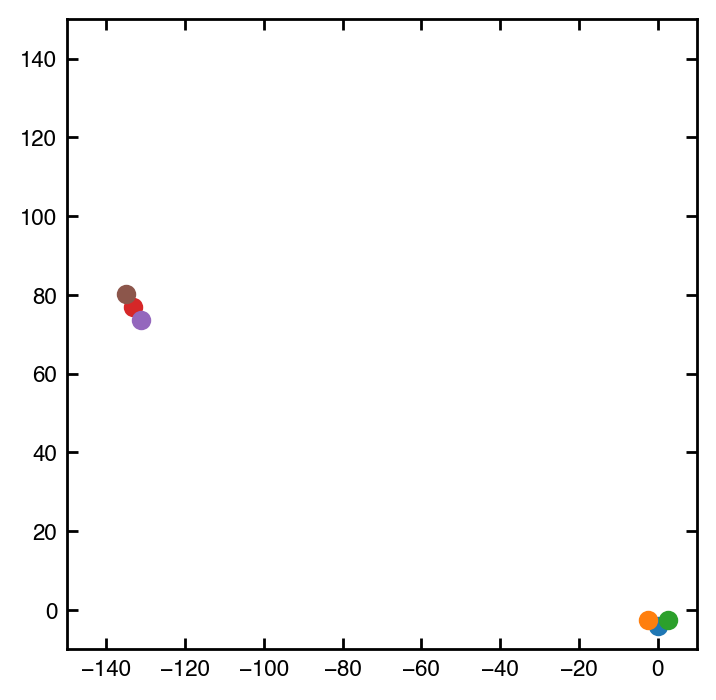

In [55]:
fig = fig_pre_def(8,8) #定義圖片大小 default 8*6
ax =fig.add_subplot(1, 1, 1) #畫一張圖的時候用 111

plt.scatter(source[0],source[1])
plt.scatter(tri_LD[0],tri_LD[1])
plt.scatter(tri_RU[0],tri_RU[1])
plt.scatter(Rec_center[0],Rec_center[1])
plt.scatter(Rec_D[0],Rec_D[1])
plt.scatter(Rec_U[0],Rec_U[1])
fig_post_def(xlim=(-150,10),ylim=(-10,150),lg_fs=9)

# 1.5 m gamma tmrigger TOF 

In [56]:
# Time to energy
def Time_to_energy_150cm(TOF):
    distance = 1.5  # m
    light_speed = 299792458 # m/s
    neutron_mass = 1.64749*10**-27 #kg
    beta= distance/(light_speed*TOF*10**-9)
    neutron_energy = neutron_mass* light_speed**2*((1-beta**2)**-0.5-1)*(1.6*10**-19)**-1*(10**-6)
    return neutron_energy

def Time_to_energy_300cm(TOF):
    distance = 3  # m
    light_speed = 299792458 # m/s
    neutron_mass = 1.64749*10**-27 #kg
    beta= distance/(light_speed*TOF*10**-9)
    neutron_energy = neutron_mass* light_speed**2*((1-beta**2)**-0.5-1)*(1.6*10**-19)**-1*(10**-6)
    return neutron_energy

def Time_to_energy_450cm(TOF):
    distance = 4.5  # m
    light_speed = 299792458 # m/s
    neutron_mass = 1.64749*10**-27 #kg
    beta= distance/(light_speed*TOF*10**-9)
    neutron_energy = neutron_mass* light_speed**2*((1-beta**2)**-0.5-1)*(1.6*10**-19)**-1*(10**-6)
    return neutron_energy

def energy_to_time_150cm(E):
    distance = 1.5381 # m
    light_speed = 299792458 # m/s
    neutron_mass = 1.64749*10**-27 #kg
    TOF = distance/((2*E*(1.6*10**-19)*(10**6)/neutron_mass)**0.5)*10**9 #ns
    return TOF

def energy_to_time_300cm(E):
    distance = 3 # m
    light_speed = 299792458 # m/s
    neutron_mass = 1.64749*10**-27 #kg
    TOF = distance/((2*E*(1.6*10**-19)*(10**6)/neutron_mass)**0.5)*10**9 #ns
    return TOF

def energy_to_time_450cm(E):
    distance = 4.5 # m
    light_speed = 299792458 # m/s
    neutron_mass = 1.64749*10**-27 #kg
    TOF = distance/((2*E*(1.6*10**-19)*(10**6)/neutron_mass)**0.5)*10**9 #ns
    return TOF

def energy_to_speed_150cm(E):
    neutron_mass = 1.64749*10**-27 #kg
    speed = ((2*E*(1.6*10**-19)*(10**6)/neutron_mass)**0.5)/10**9 #ns
    return speed #m

def E_resolution_fun_150cm(E,delta_T):
    light_speed = 299792458 # m/s
    neutron_mass = 1.64749*10**-27 #kg
    gamma = 1+(E*(1.6*10**-19)*(10**6)/(neutron_mass*light_speed**2))
    #print(gamma)
    #delta_T = 5 # ns
    TOF = energy_to_time_150cm(E)
    delta_d = 12.7
    d=153.81
    delta_E = E*gamma*(gamma+1)*((delta_T/TOF)**2+(delta_d/d)**2)**0.5
    return delta_E

def E_resolution_fun_300cm(E,delta_T):
    light_speed = 299792458 # m/s
    neutron_mass = 1.64749*10**-27 #kg
    gamma = 1+(E*(1.6*10**-19)*(10**6)/(neutron_mass*light_speed**2))
    #print(gamma)
    #delta_T = 5 # ns
    TOF = energy_to_time_300cm(E)
    delta_d = 12.7
    d=300
    delta_E = E*gamma*(gamma+1)*((delta_T/TOF)**2+(delta_d/d)**2)**0.5
    return delta_E

def E_resolution_fun_450cm(E,delta_T):
    light_speed = 299792458 # m/s
    neutron_mass = 1.64749*10**-27 #kg
    gamma = 1+(E*(1.6*10**-19)*(10**6)/(neutron_mass*light_speed**2))
    #print(gamma)
    #delta_T = 5 # ns
    TOF = energy_to_time_450cm(E)
    delta_d = 12.7
    d=450
    delta_E = E*gamma*(gamma+1)*((delta_T/TOF)**2+(delta_d/d)**2)**0.5
    return delta_E
    

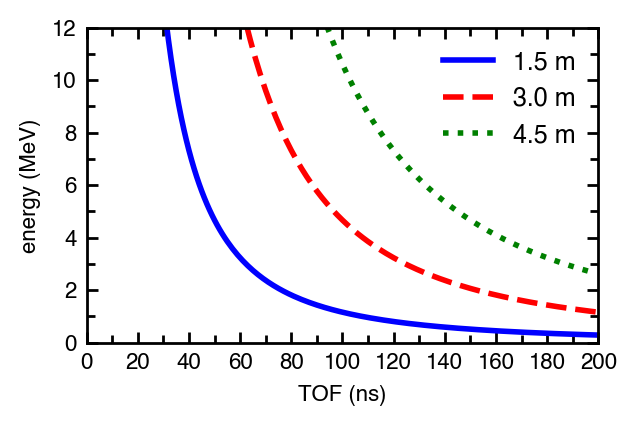

In [57]:
time_along= np.arange(20,200,1)
E_along_150cm = Time_to_energy_150cm(time_along)
E_along_300cm = Time_to_energy_300cm(time_along)
E_along_450cm = Time_to_energy_450cm(time_along)

fig = fig_pre_def(6.5,4) #定義圖片大小 default 8*6
ax =fig.add_subplot(1, 1, 1) #畫一張圖的時候用 111

#for i in time_along:
#    E_along = np.append(E_along,Time_to_energy(timealong))
ax.plot(time_along,E_along_150cm,'b',linewidth =2,label = '1.5 m')
ax.plot(time_along,E_along_300cm,'--r',linewidth =2,label = '3.0 m')
ax.plot(time_along,E_along_450cm,':g',linewidth =2,label = '4.5 m')

fig_post_def(xlim=(0,200),xticks=(20,10),ylim=(0,12),yticks=(2,1),
             lg_fs = 9,
            xlabel ='TOF (ns)',ylabel = 'energy (MeV)')#,title="TOF V.S Energy")

plt.savefig('/Users/thlin/Dropbox/PhD_thesis_博士論文/Figure/GTTOF_150cm_E.svg', format="svg")


In [58]:



def E_resolution_fun_150cm_A(E,delta_T):
    light_speed = 299792458 # m/s
    neutron_mass = 1.64749*10**-27 #kg
    gamma = 1+(E*(1.6*10**-19)*(10**6)/(neutron_mass*light_speed**2))
    #print(gamma)
    #delta_T = 5 # ns
    TOF = energy_to_time_150cm(E)
    delta_d = 12.7
    
    delta_E = E*gamma*(gamma+1)*(((delta_T)**2+((delta_d/100)/energy_to_speed_150cm(E))**2)**0.5)/TOF
    return delta_E
def E_resolution_fun_150cm_B(E,delta_T):
    light_speed = 299792458 # m/s
    neutron_mass = 1.64749*10**-27 #kg
    gamma = 1+(E*(1.6*10**-19)*(10**6)/(neutron_mass*light_speed**2))
    #print(gamma)
    #delta_T = 5 # ns
    TOF = energy_to_time_150cm(E)
    delta_d = 12.7
    d=150
    delta_E = E*gamma*(gamma+1)*((delta_T/TOF)**2+(delta_d/d)**2)**0.5
    return delta_E

/var/folders/qd/hhwc9gc95fv6tx8vycl4f3bm0000gn/T/ipykernel_34514/1337572410.py:30: RuntimeWarning: divide by zero encountered in divide
  TOF = distance/((2*E*(1.6*10**-19)*(10**6)/neutron_mass)**0.5)*10**9 #ns
/var/folders/qd/hhwc9gc95fv6tx8vycl4f3bm0000gn/T/ipykernel_34514/2357391728.py:10: RuntimeWarning: divide by zero encountered in divide
  delta_E = E*gamma*(gamma+1)*(((delta_T)**2+((delta_d/100)/energy_to_speed_150cm(E))**2)**0.5)/TOF
/var/folders/qd/hhwc9gc95fv6tx8vycl4f3bm0000gn/T/ipykernel_34514/2357391728.py:10: RuntimeWarning: invalid value encountered in multiply
  delta_E = E*gamma*(gamma+1)*(((delta_T)**2+((delta_d/100)/energy_to_speed_150cm(E))**2)**0.5)/TOF


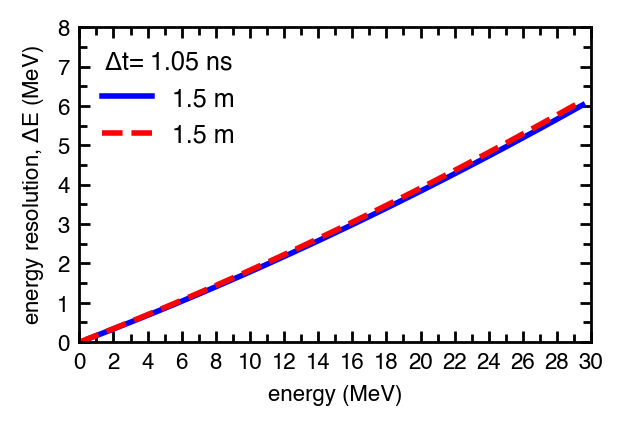

In [59]:
E_0_15MeV= np.arange(0,30,0.5)
delta_E_0_15MeV_150cm_A = E_resolution_fun_150cm_A(E_0_15MeV,1.05)
delta_E_0_15MeV_150cm_B = E_resolution_fun_150cm_B(E_0_15MeV,1.05)


fig = fig_pre_def(6.5,4) #定義圖片大小 default 8*6
ax =fig.add_subplot(1, 1, 1) #畫一張圖的時候用 111

#for i in time_along:
#    E_along = np.append(E_along,Time_to_energy(timealong))
ax.plot(E_0_15MeV,delta_E_0_15MeV_150cm_A,'b'  ,linewidth =2,label = '1.5 m')
ax.plot(E_0_15MeV,delta_E_0_15MeV_150cm_B,'--r',linewidth =2,label = '1.5 m')


fig_post_def(xlim=(0,30),yticks=(1,0.5),ylim=(0,8),xticks=(2,1),lg_fs=9, xlabel ='energy (MeV)'
              ,ylabel = 'energy resolution, $\Delta$E (MeV)'
              ,title= '$\Delta$t= 1.05 ns')
             #,title=r"energy resolution $\Delta$ E")

#plt.savefig('/Users/thlin/Dropbox/PhD_thesis_博士論文/Figure/GTTOF_150cm_deltaE_5ns.svg', format="svg")


/var/folders/qd/hhwc9gc95fv6tx8vycl4f3bm0000gn/T/ipykernel_34514/1337572410.py:30: RuntimeWarning: divide by zero encountered in divide
  TOF = distance/((2*E*(1.6*10**-19)*(10**6)/neutron_mass)**0.5)*10**9 #ns
/var/folders/qd/hhwc9gc95fv6tx8vycl4f3bm0000gn/T/ipykernel_34514/1337572410.py:37: RuntimeWarning: divide by zero encountered in divide
  TOF = distance/((2*E*(1.6*10**-19)*(10**6)/neutron_mass)**0.5)*10**9 #ns
/var/folders/qd/hhwc9gc95fv6tx8vycl4f3bm0000gn/T/ipykernel_34514/1337572410.py:44: RuntimeWarning: divide by zero encountered in divide
  TOF = distance/((2*E*(1.6*10**-19)*(10**6)/neutron_mass)**0.5)*10**9 #ns


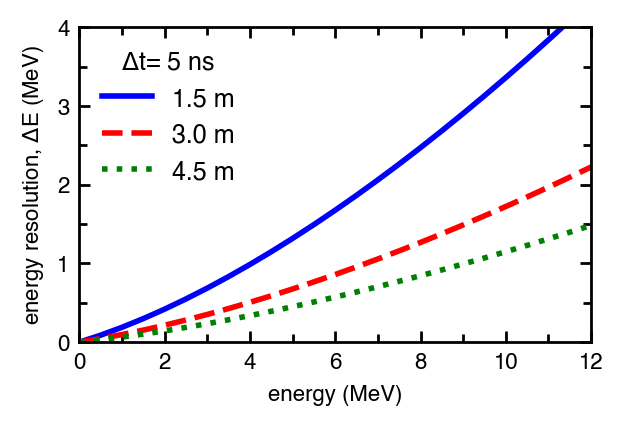

In [60]:
E_0_15MeV= np.arange(0,15,0.5)
delta_E_0_15MeV_150cm = E_resolution_fun_150cm(E_0_15MeV,5)
delta_E_0_15MeV_300cm = E_resolution_fun_300cm(E_0_15MeV,5)
delta_E_0_15MeV_450cm = E_resolution_fun_450cm(E_0_15MeV,5)

fig = fig_pre_def(6.5,4) #定義圖片大小 default 8*6
ax =fig.add_subplot(1, 1, 1) #畫一張圖的時候用 111

#for i in time_along:
#    E_along = np.append(E_along,Time_to_energy(timealong))
ax.plot(E_0_15MeV,delta_E_0_15MeV_150cm,'b',linewidth =2,label = '1.5 m')
ax.plot(E_0_15MeV,delta_E_0_15MeV_300cm,'--r',linewidth =2,label = '3.0 m')
ax.plot(E_0_15MeV,delta_E_0_15MeV_450cm,':g',linewidth =2,label = '4.5 m')


fig_post_def(xlim=(0,12),yticks=(1,0.5),ylim=(0,4),xticks=(2,1),lg_fs=9, xlabel ='energy (MeV)'
              ,ylabel = 'energy resolution, $\Delta$E (MeV)'
              ,title= '$\Delta$t= 5 ns')
             #,title=r"energy resolution $\Delta$ E")

#plt.savefig('/Users/thlin/Dropbox/PhD_thesis_博士論文/Figure/GTTOF_150cm_deltaE_5ns.svg', format="svg")


/var/folders/qd/hhwc9gc95fv6tx8vycl4f3bm0000gn/T/ipykernel_34514/1337572410.py:30: RuntimeWarning: divide by zero encountered in divide
  TOF = distance/((2*E*(1.6*10**-19)*(10**6)/neutron_mass)**0.5)*10**9 #ns
/var/folders/qd/hhwc9gc95fv6tx8vycl4f3bm0000gn/T/ipykernel_34514/1337572410.py:37: RuntimeWarning: divide by zero encountered in divide
  TOF = distance/((2*E*(1.6*10**-19)*(10**6)/neutron_mass)**0.5)*10**9 #ns
/var/folders/qd/hhwc9gc95fv6tx8vycl4f3bm0000gn/T/ipykernel_34514/1337572410.py:44: RuntimeWarning: divide by zero encountered in divide
  TOF = distance/((2*E*(1.6*10**-19)*(10**6)/neutron_mass)**0.5)*10**9 #ns


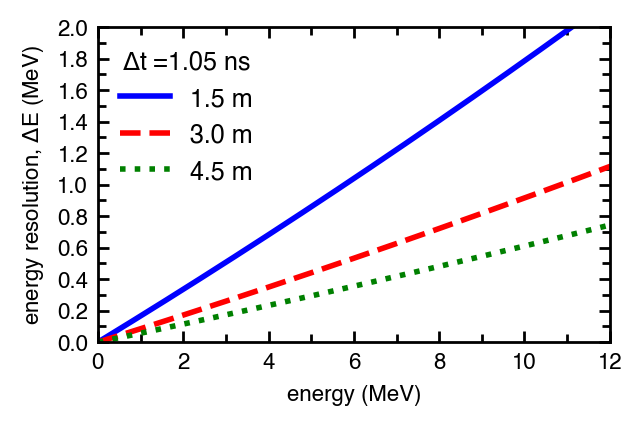

In [61]:
E_0_15MeV= np.arange(0,15,0.1)
delta_E_0_15MeV_150cm = E_resolution_fun_150cm(E_0_15MeV,1.05)
delta_E_0_15MeV_300cm = E_resolution_fun_300cm(E_0_15MeV,1.05)
delta_E_0_15MeV_450cm = E_resolution_fun_450cm(E_0_15MeV,1.05)

fig = fig_pre_def(6.5,4) #定義圖片大小 default 8*6
ax =fig.add_subplot(1, 1, 1) #畫一張圖的時候用 111

#for i in time_along:
#    E_along = np.append(E_along,Time_to_energy(timealong))
ax.plot(E_0_15MeV,delta_E_0_15MeV_150cm,'b',linewidth =2,label = '1.5 m')
ax.plot(E_0_15MeV,delta_E_0_15MeV_300cm,'--r',linewidth =2,label = '3.0 m')
ax.plot(E_0_15MeV,delta_E_0_15MeV_450cm,':g',linewidth =2,label = '4.5 m')


fig_post_def(xlim=(0,12),yticks=(0.2,0.1),ylim=(0,2),xticks=(2,1),lg_fs=9, xlabel ='energy (MeV)'
             ,ylabel = 'energy resolution, $\Delta$E (MeV)'#,title=r"energy resolution $\Delta$ E")
            ,title= '$\Delta$t =1.05 ns')
#plt.savefig('/Users/thlin/Dropbox/PhD_thesis_博士論文/Figure/GTTOF_150cm_deltaE_1.5ns.svg', format="svg")


In [62]:
def energy_to_time_294cm(E):
    distance = 2.94 # m
    light_speed = 299792458 # m/s
    neutron_mass = 1.64749*10**-27 #kg
    TOF = distance/((2*E*(1.6*10**-19)*(10**6)/neutron_mass)**0.5)*10**9 #ns
    return TOF
def Time_to_energy_294cm(TOF):
    distance = 2.94  # m
    light_speed = 299792458 # m/s
    neutron_mass = 1.64749*10**-27 #kg
    beta= distance/(light_speed*TOF*10**-9)
    neutron_energy = neutron_mass* light_speed**2*((1-beta**2)**-0.5-1)*(1.6*10**-19)**-1*(10**-6)
    return neutron_energy

def E_resolution_fun_294cm(E,delta_T):
    light_speed = 299792458 # m/s
    neutron_mass = 1.64749*10**-27 #kg
    gamma = 1+(E*(1.6*10**-19)*(10**6)/(neutron_mass*light_speed**2))
    #print(gamma)
    #delta_T = 5 # ns
    TOF = energy_to_time_294cm(E)
    delta_E = E*gamma*(gamma+1)*(delta_T/TOF)
    return delta_E


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


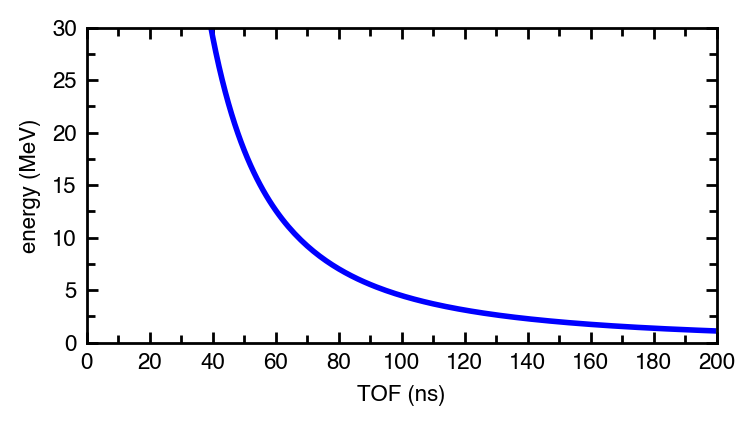

In [63]:
time_along= np.arange(20,200,1)
#E_along_150cm = Time_to_energy_150cm(time_along)
E_along_300cm = Time_to_energy_294cm(time_along)
#E_along_450cm = Time_to_energy_450cm(time_along)

fig = fig_pre_def(8,4) #定義圖片大小 default 8*6
ax =fig.add_subplot(1, 1, 1) #畫一張圖的時候用 111

#for i in time_along:
#    E_along = np.append(E_along,Time_to_energy(timealong))
#ax.plot(time_along,E_along_150cm,'b',linewidth =2,label = '1.5 m')
ax.plot(time_along,E_along_300cm,'b',linewidth =2)#,label = '294 cm')
#ax.plot(time_along,E_along_450cm,':g',linewidth =2,label = '4.5 m')

fig_post_def(xlim=(0,200),xticks=(20,10),ylim=(0,30),yticks=(5,2.5),
             lg_fs = 9,
            xlabel ='TOF (ns)',ylabel = 'energy (MeV)')#,title="TOF V.S Energy")

#plt.savefig('/Users/thlin/Dropbox/PhD_thesis_博士論文/Figure/INER_TOF_294cm_E.svg', format="svg")


/var/folders/qd/hhwc9gc95fv6tx8vycl4f3bm0000gn/T/ipykernel_34514/1337572410.py:30: RuntimeWarning: divide by zero encountered in divide
  TOF = distance/((2*E*(1.6*10**-19)*(10**6)/neutron_mass)**0.5)*10**9 #ns
/var/folders/qd/hhwc9gc95fv6tx8vycl4f3bm0000gn/T/ipykernel_34514/1557636381.py:5: RuntimeWarning: divide by zero encountered in divide
  TOF = distance/((2*E*(1.6*10**-19)*(10**6)/neutron_mass)**0.5)*10**9 #ns
/var/folders/qd/hhwc9gc95fv6tx8vycl4f3bm0000gn/T/ipykernel_34514/1337572410.py:37: RuntimeWarning: divide by zero encountered in divide
  TOF = distance/((2*E*(1.6*10**-19)*(10**6)/neutron_mass)**0.5)*10**9 #ns
/var/folders/qd/hhwc9gc95fv6tx8vycl4f3bm0000gn/T/ipykernel_34514/1337572410.py:44: RuntimeWarning: divide by zero encountered in divide
  TOF = distance/((2*E*(1.6*10**-19)*(10**6)/neutron_mass)**0.5)*10**9 #ns
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


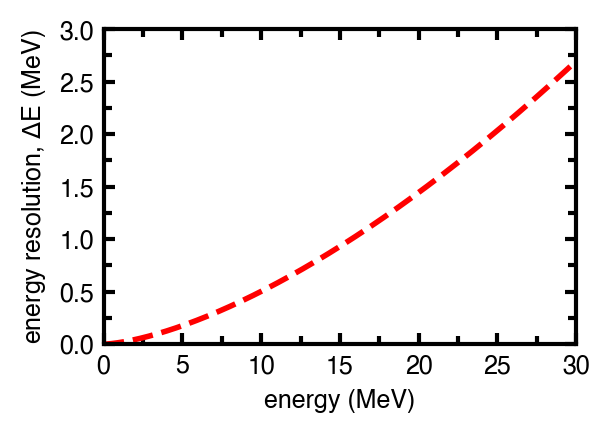

In [64]:
E_0_15MeV= np.arange(0,80,0.05)
delta_E_0_15MeV_150cm = E_resolution_fun_150cm(E_0_15MeV,1.05)
delta_E_0_15MeV_294cm = E_resolution_fun_294cm(E_0_15MeV,1.65)
delta_E_0_15MeV_300cm = E_resolution_fun_300cm(E_0_15MeV,1.5)
delta_E_0_15MeV_450cm = E_resolution_fun_450cm(E_0_15MeV,1.5)

fig = fig_pre_def(6,4,lw=1.5) #定義圖片大小 default 8*6
ax =fig.add_subplot(1, 1, 1) #畫一張圖的時候用 111

#for i in time_along:
#    E_along = np.append(E_along,Time_to_energy(timealong))
#ax.plot(E_0_15MeV,delta_E_0_15MeV_150cm,'b',linewidth =2,label = '1.5 m')
ax.plot(E_0_15MeV,delta_E_0_15MeV_294cm,'--r',linewidth =2)#,label = '3.0 m')
#ax.plot(E_0_15MeV,delta_E_0_15MeV_450cm,':g',linewidth =2,label = '4.5 m')



fig_post_def(xlim=(0,30),yticks=(0.5,0.25),ylim=(0,3),xticks=(5,2.5),lg_fs=11, xlabel ='energy (MeV)',lw=1.5,lb_fs=9
             ,ylabel = 'energy resolution, $\Delta$E (MeV)'#,title=r"energy resolution $\Delta$ E")
)#,title= '$\Delta$t =1.5 ns')
#plt.savefig('/Users/thlin/Dropbox/PhD_thesis_博士論文/Figure/INER_TOF_294cm_deltaE_1.5ns.svg', format="svg")


# NSTOF resolution calcualtion


In [15]:
def Light_output_exponential_method(E):
    A=0.62  #0.817
    B=1.3   #2.63
    C=0.39  #0.297
    D=0.97  #1
    LO =A*E-B*(1-np.exp(-1*C*E**D))
    return LO
def interpolation_function(data_x,data_y,new_x):
    new_y = interp1d(data_x, data_y,fill_value="extrapolate")(new_x)
    return new_y

from scipy.optimize import curve_fit,fmin

def gauss_wo_baseline(x,  A, x0, sigma):
    return A * np.exp(-(x - x0) ** 2 / (2 * sigma ** 2))

def gaussian_fit(x,y) :  
    mean = sum(x * y) / sum(y)
    sigma = np.sqrt(sum(y * (x - mean) ** 2) / sum(y))  
    popt, pcov = curve_fit(gauss_wo_baseline, x, y, p0=[1, mean, sigma], maxfev=1000)
    return popt
    print('Fitting Finished')

def gaussian(x, A,x0,sigma):
    return A * np.exp(-(x - x0) ** 2 / (2 * sigma ** 2))

def LR(L,a,b,c):
    Delta_L = ((a**2)*(L**2)+((b**2)*L)+c**2)**0.5
    return Delta_L
def ER_function_improve(x,LO,A,a,b,c):
    Gaussian_distribution = np.zeros(len(x))
    for LO_i, A_i in zip(LO,A):
        delta_E = ((a**2)*(LO_i**2)+((b**2)*LO_i)+c**2)**0.5
        sigma_ER = delta_E/2.355
        Gaussian_distribution_temp = gaussian(x,1,LO_i,sigma_ER)
        G_sum =sum(Gaussian_distribution_temp)
        #if (G_sum <= 1):
        #    G_sum =1
        Gaussian_distribution  += A_i*Gaussian_distribution_temp/G_sum
        #plt.plot(x,A_i*Gaussian_distribution_temp/G_sum)
    return Gaussian_distribution

In [16]:
Ep = np.arange(0,30,0.05) # 0.05 MeV 
LO_Ep = Light_output_exponential_method(Ep)
LO_Resolution  = LR(LO_Ep,0.046    ,  0.026    ,  0.039 )
#print(LO_Resolution) 
#np.arange(0,30,0.1)

/var/folders/qd/hhwc9gc95fv6tx8vycl4f3bm0000gn/T/ipykernel_34514/2689661892.py:3: RuntimeWarning: divide by zero encountered in divide
  plt.plot(LO_Ep,LO_Resolution/LO_Ep,'-')
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


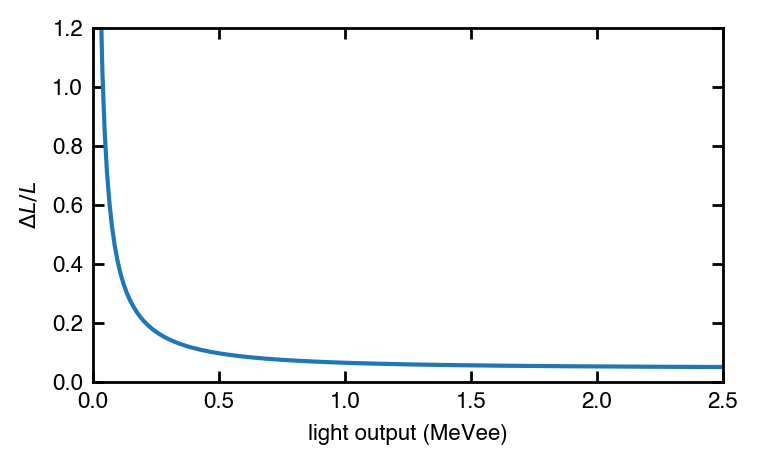

In [17]:
fig = fig_pre_def(8,4.5,1)# 圖片大小
ax = fig.add_subplot(1, 1, 1) 
plt.plot(LO_Ep,LO_Resolution/LO_Ep,'-')
fig_post_def(xlim=(0,2.5),ylim=(0,1.2),lg_fs =10,xlabel = 'light output (MeVee)', ylabel = r'$\Delta L/L$')

0.545570937474092 0.20017393684761403


(0.0, 0.5)

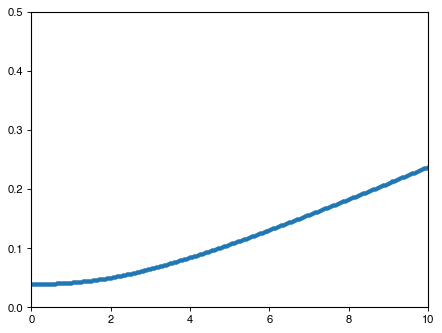

In [18]:
print(LO_Ep[40], LO_Ep[20])
plt.plot(Ep,LO_Resolution,'.')
plt.xlim(0,10)
plt.ylim(0,0.5)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


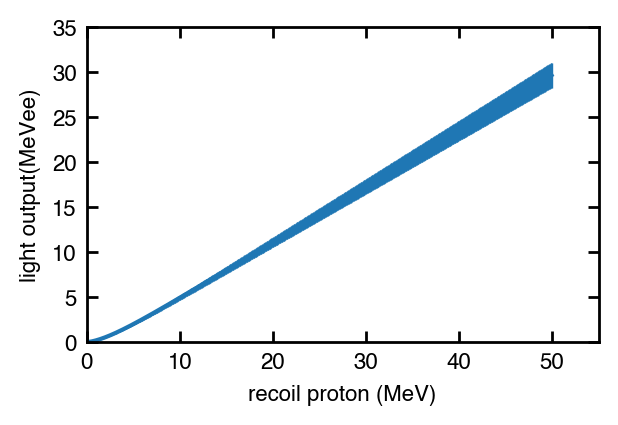

In [265]:
fig = fig_pre_def(6.5,4) #定義圖片大小 default 8*6
ax =fig.add_subplot(1, 1, 1) #畫一張圖的時候用 111

array_show = np.arange(0,len(Ep),5)
#ax.plot(Ep,LO_Ep)
plt.errorbar(Ep[array_show],LO_Ep[array_show]
             ,yerr=LO_Resolution[array_show],elinewidth=0.5)

fig_post_def(xlim=(0,55)#,xticks=(5,2.5)
             ,ylim=(0,35)#,yticks=(0.5,0.25),lg_fs=9
             , xlabel ='recoil proton (MeV)'
             ,ylabel = 'light output(MeVee)'#,title=r"energy resolution $\Delta$ E")
)



In [167]:
Ep = np.arange(0,50,0.01)# 0.02 MeV 
LO_Ep = Light_output_exponential_method(Ep)
#LO_Resolution  = LR(LO_Ep,0.131,0.08,0.062) # reference

LO_Resolution  = LR(LO_Ep,0.046,0.026,0.039 ) # My work #Ep會對應到一個light output

#LO_Resolution  = LR(LO_Ep,1.084e-01 , 1.069e-03 , 2.153e-01)

LO=np.arange(0,30,0.01) # 0.02 MeV 

In [247]:
Ep_LO_2D=[]

for i in np.arange(0,len(Ep),1):
    gaussian_temp = gaussian(LO,1,LO_Ep[i],LO_Resolution[i]/2.355)#把每一個lihgtout 會有resolution
    gaussian_norm = (gaussian_temp/sum(gaussian_temp))[:,np.newaxis]#轉直
    if (i == 0):
        Ep_LO_2D = gaussian_norm.copy()
    else:
        Ep_LO_2D = np.hstack((Ep_LO_2D,gaussian_norm))#合併
print(Ep_LO_2D.shape)


(3000, 5000)


TypeError: tuple indices must be integers or slices, not tuple

(3000, 5000)


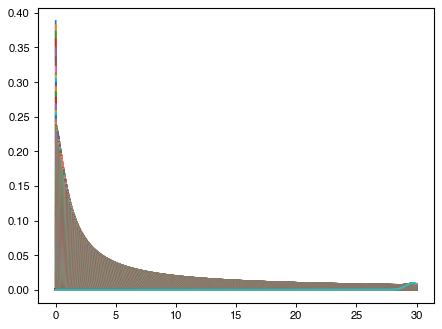

In [262]:
print(Ep_LO_2D.shape)
for i in np.arange(0,len(Ep),1):
    plt.plot(LO,Ep_LO_2D[:,i])

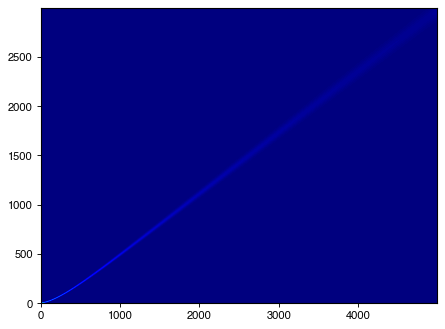

In [246]:
plt.imshow(Ep_LO_2D*100 ,cmap='jet', origin='lower',aspect='auto')

In [170]:
Ep_LO_2D_display = Ep_LO_2D.copy()
Ep_LO_2D_display[Ep_LO_2D_display<=0.00001]=np.nan

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


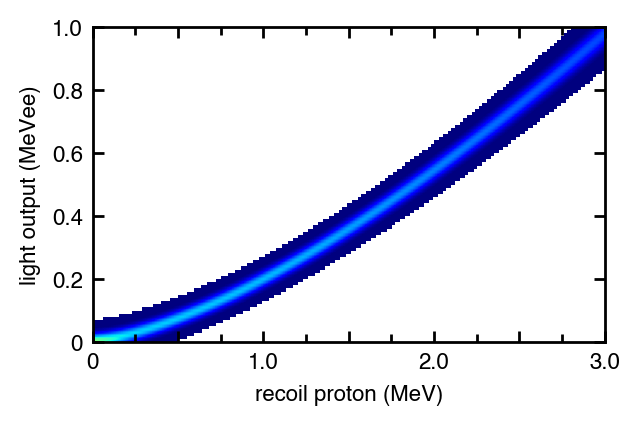

In [171]:
#Ep_LO_2D[Ep_LO_2D<0.0001] = np.NAN
fig = fig_pre_def(6.5,4) #定義圖片大小 default 8*6
ax =fig.add_subplot(1, 1, 1) #畫一張圖的時候用 111

plt.imshow(Ep_LO_2D_display*100 ,cmap='jet', vmin=1,vmax =70,origin='lower',aspect='auto')
#plt.colorbar()
#plt.title('Density Distribution')
ticks = np.arange(0,420,20)
plt.xticks(ticks, [0,0.2,0.4,0.6,0.8,1.0,1.2,1.4,1.6,1.8,2.0,2.2,2.4,2.6,2.8,3.0,3.2,3.4,3.6,3.8,4.0],fontsize=12)
yticks = np.arange(0,120,20)
plt.yticks(yticks, [0,0.2,0.4,0.6,0.8,1.0],fontsize=12)

fig_post_def(xlim=(0,300),xticks=(50,25)
             ,ylim=(0,100)#,yticks=(0.5,0.25),lg_fs=9
             ,xlabel ='recoil proton (MeV)'
             ,ylabel = 'light output (MeVee)'
             #,title=r"recoil proto resolution"
             )

plt.show()

(0.0, 1.0)

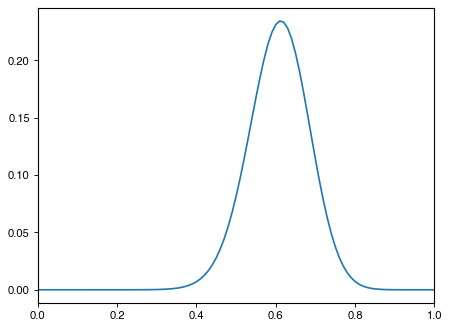

In [266]:
plt.plot(Ep, Ep_LO_2D[10,:])

plt.xlim(0,1)

In [173]:
Ep_LO_parematers = []
for i in np.arange(0,len(Ep_LO_2D[:,0]),1):
    fitting_temp = gaussian_fit(Ep, Ep_LO_2D[i,:]/sum(Ep_LO_2D[i,:]))
    fitting_temp2 = np.array((fitting_temp[0],fitting_temp[1],fitting_temp[2]))
    #print(fitting_temp2)
    if (i==0 ):
        Ep_LO_parematers =[0,0,0]
    #elif i==1 or i==2 or i==3 or i==4 or i ==5:
    #    Ep_LO_parematers =np.vstack((Ep_LO_parematers,np.array([0,0,0])))
    else:
        Ep_LO_parematers = np.vstack((Ep_LO_parematers,fitting_temp2))
    #print(Ep_LO_parematers)
print(Ep_LO_parematers)

[[0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [4.39885679e-02 5.24343977e-02 1.39253212e-01]
 [3.51619774e-02 1.41335921e-01 1.33696992e-01]
 ...
 [2.32844754e-02 5.10007832e+01 1.03623041e+00]
 [2.40121291e-02 5.10222929e+01 1.03645110e+00]
 [2.47709861e-02 5.10438007e+01 1.03666372e+00]]


In [174]:
print(Ep)
print(Ep_LO_parematers.shape)

[0.000e+00 1.000e-02 2.000e-02 ... 4.997e+01 4.998e+01 4.999e+01]
(3000, 3)


[0.03633133 6.76247638 0.10975317]


(6.0, 7.5)

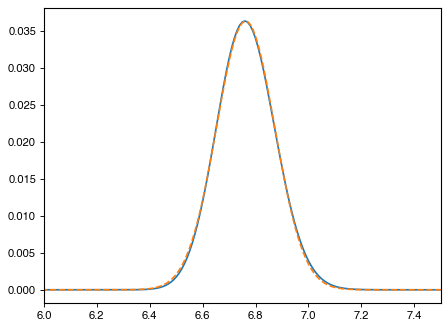

In [175]:
n=300
print(Ep_LO_parematers[n])
Ep_gaussian = gaussian(Ep,Ep_LO_parematers[n,0],Ep_LO_parematers[n,1],Ep_LO_parematers[n,2])
plt.plot(Ep,Ep_LO_2D[n,:]/sum(Ep_LO_2D[n,:]))
plt.plot(Ep,Ep_gaussian,'--',label="Gaussian fitting")
plt.xlim(6,7.5)

[0. 0. 0.]
[0.04398857 0.0524344  0.13925321]
[0.03516198 0.14133592 0.13369699]
[0.03438249 0.22733019 0.12032763]
[0.0377923  0.30101331 0.10467357]
[0.04174443 0.36287074 0.09436033]
[0.0449057  0.41810418 0.08813134]
[0.04741432 0.46955107 0.08373133]
[0.0495309  0.51835132 0.08027892]
[0.05140235 0.56505868 0.07742079]
(3000, 3)
[0.         0.0524344  0.14133592 0.22733019 0.30101331 0.36287074
 0.41810418 0.46955107 0.51835132 0.56505868]
[0.         0.13925321 0.13369699 0.12032763 0.10467357 0.09436033
 0.08813134 0.08373133 0.08027892 0.07742079]


/var/folders/qd/hhwc9gc95fv6tx8vycl4f3bm0000gn/T/ipykernel_34514/2968298775.py:25: RuntimeWarning: divide by zero encountered in divide
  return A * np.exp(-(x - x0) ** 2 / (2 * sigma ** 2))
/var/folders/qd/hhwc9gc95fv6tx8vycl4f3bm0000gn/T/ipykernel_34514/2968298775.py:25: RuntimeWarning: invalid value encountered in divide
  return A * np.exp(-(x - x0) ** 2 / (2 * sigma ** 2))


(0.0, 1.0)

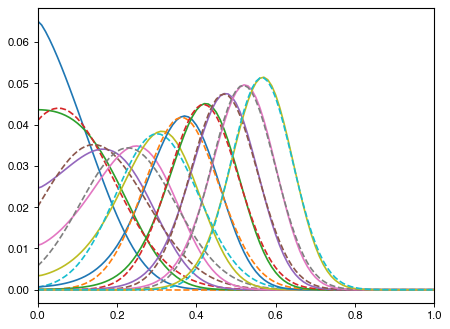

In [261]:
for n in range(0,10,1):
    Ep_gaussian = gaussian(Ep,Ep_LO_parematers[n,0],Ep_LO_parematers[n,1],Ep_LO_parematers[n,2])
    print(Ep_LO_parematers[n,:])
    plt.plot(Ep,Ep_LO_2D[n,:]/sum(Ep_LO_2D[n,:]))
    plt.plot(Ep,Ep_gaussian,'--',label="Gaussian fitting")
    
print(Ep_LO_parematers.shape)
print(Ep_LO_parematers[0:10,1])
print(Ep_LO_parematers[0:10,2])
plt.xlim(0,1)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


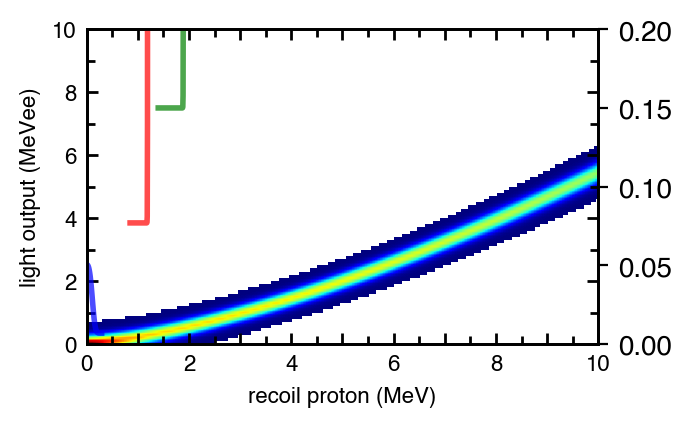

In [177]:
#Ep_LO_2D[Ep_LO_2D<0.0001] = np.NAN
fig = fig_pre_def(6.5,4) #定義圖片大小 default 8*6
ax =fig.add_subplot(1, 1, 1) #畫一張圖的時候用 111



plt.imshow(Ep_LO_2D_display*200 ,cmap='jet', vmin=0,vmax =70,origin='lower',aspect='auto')
ticks = np.arange(0,420,40)#### when change bin this value should be modified.
plt.xticks(ticks, [0,2,4,6,8,10,12,14,16,18,20],fontsize=12)
yticks = np.arange(0,120,20)
plt.yticks(yticks, [0,2,4,6,8,10],fontsize=12)
ax2=ax.twinx()
n=1
show_range_1 = np.arange(0,60,1)
Ep_gaussian = gaussian(Ep,Ep_LO_parematers[n,0],Ep_LO_parematers[n,1],Ep_LO_parematers[n,2])
ax2.plot(10*Ep[show_range_1],0.007+Ep_LO_2D[n,show_range_1]/sum(Ep_LO_2D[n,show_range_1]),'b',alpha = 0.7,linewidth = 2)
#ax2.plot(Ep,Ep_gaussian)
ax2.set_ylim(0,0.2)

n=100
show_range_2 = np.arange(170,240,1)
Ep_gaussian = gaussian(Ep,Ep_LO_parematers[n,0],Ep_LO_parematers[n,1],Ep_LO_parematers[n,2])
ax2.plot(10*Ep[show_range_2],0.077+Ep_LO_2D[n,show_range_2]/sum(Ep_LO_2D[n,show_range_2]),'r',alpha = 0.7,linewidth = 2)

n=180
show_range_3 = np.arange(280,380,1)
Ep_gaussian = gaussian(Ep,Ep_LO_parematers[n,0],Ep_LO_parematers[n,1],Ep_LO_parematers[n,2])
ax2.plot(10*Ep[show_range_3],0.15+Ep_LO_2D[n,show_range_3]/sum(Ep_LO_2D[n,show_range_3]),'g',alpha = 0.7,linewidth = 2)

fig_post_def(xlim=(0,200),xticks=(20,10)
             ,ylim=(0,100),yticks=(20,10),lg_fs=9
             ,xlabel ='recoil proton (MeV)'
             ,ylabel = 'light output (MeVee)'
             #,title=r"recoil proto resolution"
             )


plt.show()

(3000, 5000)
(3000,)
4.0
[0.02882844 8.45433786 0.13831317]
0.32572750409380574


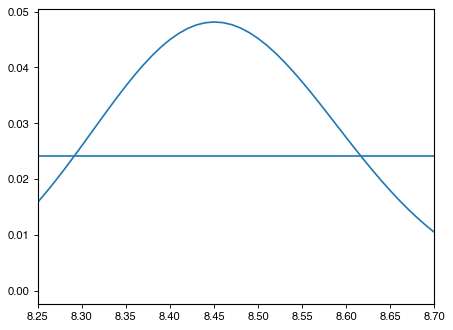

In [178]:
print(Ep_LO_2D.shape)
print(LO.shape)
print(LO[400])
print(Ep_LO_parematers[400])
plt.plot(Ep,Ep_LO_2D[400,:])

plt.xlim(8.25,8.7)
plt.axhline(Ep_LO_2D[400,:].max()/2)
print(Ep_LO_parematers[400,2]*2.355)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


(3000, 5000)


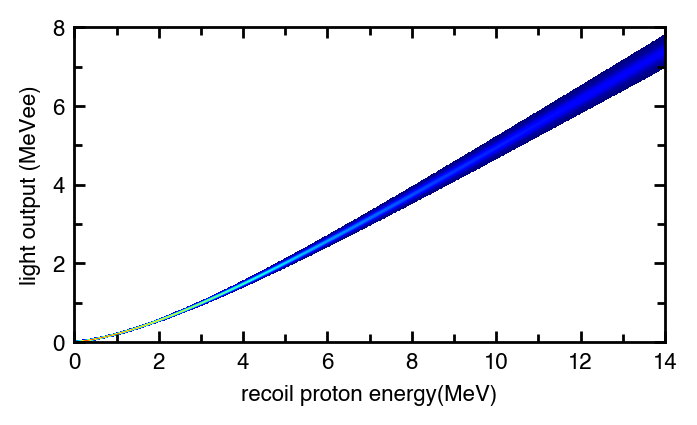

In [179]:
Ep_LO_2D_display = Ep_LO_2D.copy()
Ep_LO_2D_display[Ep_LO_2D_display<=0.0002]=np.nan
print(Ep_LO_2D_display.shape)
fig = fig_pre_def(7.5,4) #定義圖片大小 default 8*6
ax =fig.add_subplot(1, 1, 1) #畫一張圖的時候用 111

LO_Ep = Light_output_exponential_method(Ep)
#plt.plot(Ep*100,100*LO_Ep,'--r',linewidth =0.5 )
plt.imshow(Ep_LO_2D_display ,cmap='jet', 
           #norm='linear',
           #interpolation = 'nearest',
           vmin=0,vmax =0.25,
           origin='lower',aspect='auto')
xticks = np.arange(0,1450,100)
plt.xticks(xticks, [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14],fontsize=12)
yticks = np.arange(0,1450,100)
plt.yticks(yticks, [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14],fontsize=12)
fig_post_def(xlim=(0,1400),xticks=(200,100)
             ,ylim=(0,800),yticks=(200,100),lg_fs=9
             ,xlabel ='recoil proton energy(MeV)'
             ,ylabel = 'light output (MeVee)'
             #,title=r"recoil proto resolution"
             )
#plt.colorbar()
plt.savefig('/Users/thlin/Dropbox/Research/Publication/2023 NSTOF/Figure/Python_export/Fig5_matrix.svg', format="svg")

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


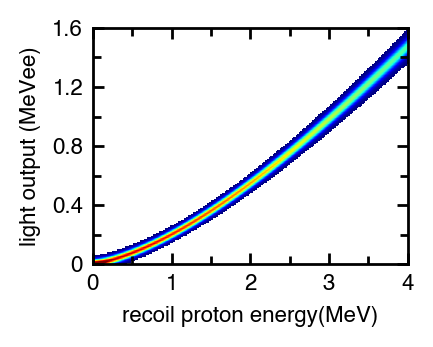

In [180]:
fig = fig_pre_def(4,3) #定義圖片大小 default 8*6
ax =fig.add_subplot(1, 1, 1) #畫一張圖的時候用 111

LO_Ep = Light_output_exponential_method(Ep)
#plt.plot(Ep*100,100*LO_Ep,'--r',linewidth =0.5 )
plt.imshow(Ep_LO_2D_display ,cmap='jet', 
           #norm='linear',
           #interpolation = 'nearest',
           vmin=0,vmax =0.25,
           origin='lower',aspect='auto')
xticks = np.arange(0,1450,100)
plt.xticks(xticks, [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14],fontsize=12)
#yticks = np.arange(0,1450,100)
#plt.yticks(yticks, [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14],fontsize=12)

yticks = np.arange(0,165,10)
plt.yticks(yticks, [0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0,1.1,1.2,1.3,1.4,1.5,1.6],fontsize=12)
fig_post_def(xlim=(0,400),xticks=(100,50)
             ,ylim=(0,160),yticks=(40,20),lg_fs=9
             ,xlabel ='recoil proton energy(MeV)'
             ,ylabel = 'light output (MeVee)'
             #,title=r"recoil proto resolution"
             )
#plt.axhline(10)
#plt.axhline(60)
plt.savefig('/Users/thlin/Dropbox/Research/Publication/2023 NSTOF/Figure/Python_export/Fig5_matrix_small.svg', format="svg")

Ep_LO_2D_display = Ep_LO_2D.copy()
Ep_LO_2D_display[Ep_LO_2D_display<=0.01]=np.nan

fig = fig_pre_def(7.5,4) #定義圖片大小 default 8*6
ax =fig.add_subplot(1, 1, 1) #畫一張圖的時候用 111


plt.imshow(Ep_LO_2D_display ,cmap='jet', 
           norm='linear',
           interpolation = 'nearest',
           vmin=0,#vmax =0.3,
           origin='lower',aspect='auto')
ticks = np.arange(0,420,40)#### when change bin this value should be modified.
plt.xticks(ticks, [0,2,4,6,8,10,12,14,16,18,20],fontsize=12)
yticks = np.arange(0,120,20)
plt.yticks(yticks, [0,2,4,6,8,10],fontsize=12)
fig_post_def(xlim=(0,280),xticks=(40,20)
             ,ylim=(0,100),yticks=(20,10),lg_fs=9
             ,xlabel ='recoil proton energy(MeV)'
             ,ylabel = 'light output (MeVee)'
             #,title=r"recoil proto resolution"
             )
#plt.colorbar()
plt.axhline(40)
plt.savefig('/Users/thlin/Dropbox/Research/Publication/2023 NSTOF/Figure/Python_export/Fig5_matrix.svg', format="svg")

3000


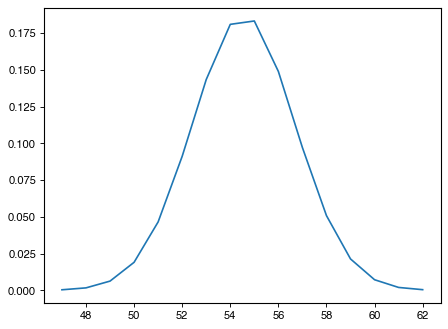

In [241]:
print(len(Ep_LO_2D_display[:,200]))
plt.plot(Ep_LO_2D_display[:,200])

/var/folders/qd/hhwc9gc95fv6tx8vycl4f3bm0000gn/T/ipykernel_34514/1337572410.py:30: RuntimeWarning: divide by zero encountered in divide
  TOF = distance/((2*E*(1.6*10**-19)*(10**6)/neutron_mass)**0.5)*10**9 #ns
/var/folders/qd/hhwc9gc95fv6tx8vycl4f3bm0000gn/T/ipykernel_34514/2357391728.py:10: RuntimeWarning: divide by zero encountered in divide
  delta_E = E*gamma*(gamma+1)*(((delta_T)**2+((delta_d/100)/energy_to_speed_150cm(E))**2)**0.5)/TOF
/var/folders/qd/hhwc9gc95fv6tx8vycl4f3bm0000gn/T/ipykernel_34514/2357391728.py:10: RuntimeWarning: invalid value encountered in multiply
  delta_E = E*gamma*(gamma+1)*(((delta_T)**2+((delta_d/100)/energy_to_speed_150cm(E))**2)**0.5)/TOF


def E_resolution_fun_153cm_0(E,delta_T):
    light_speed = 299792458 # m/s
    neutron_mass = 1.64749*10**-27 #kg
    gamma = 1+(E*(1.6*10**-19)*(10**6)/(neutron_mass*light_speed**2))
    #print(gamma)
    #delta_T = 5 # ns
    TOF = energy_to_time_150cm(E)
    delta_d = 12.7
    
    delta_E = E*gamma*(gamma+1)*(((delta_T)**2+((0/100)/energy_to_speed_150cm(E))**2)**0.5)/TOF
    return delta_E
def E_resolution_fun_153cm_d(E,delta_T):
    light_speed = 299792458 # m/s
    neutron_mass = 1.64749*10**-27 #kg
    gamma = 1+(E*(1.6*10**-19)*(10**6)/(neutron_mass*light_speed**2))
    #print(gamma)
    #delta_T = 5 # ns
    TOF = energy_to_time_150cm(E)
    delta_d = 12.7
    d=153.81
    delta_E = E*gamma*(gamma+1)*((delta_T/TOF)**2+(delta_d/d)**2)**0.5
    return delta_E
def E_resolution_fun_153cm_dd(E,delta_T,dd):
    light_speed = 299792458 # m/s
    neutron_mass = 1.64749*10**-27 #kg
    gamma = 1+(E*(1.6*10**-19)*(10**6)/(neutron_mass*light_speed**2))
    #print(gamma)
    #delta_T = 5 # ns
    TOF = energy_to_time_150cm(E)
    
    d=153.81
    delta_E = E*gamma*(gamma+1)*((delta_T/TOF)**2+(dd/d)**2)**0.5
    return delta_E

35.362520403195326

In [401]:
def energy_to_time_DSTOF(E):
    distance = 1.5381 # m
    light_speed = 299792458 # m/s
    neutron_mass = 1.64749*10**-27 #kg
    core = (1+(E*10**6*1.6*10**-19/(neutron_mass*light_speed**2)))
    speed = ((1-core**-2)*light_speed**2)**0.5
    TOF= (distance/speed)*10**9
    return TOF
def energy_to_time_gTOF(E):
    distance = 1.5585 # m
    light_speed = 299792458 # m/s
    neutron_mass = 1.64749*10**-27 #kg
    core = (1+(E*10**6*1.6*10**-19/(neutron_mass*light_speed**2)))
    speed = ((1-core**-2)*light_speed**2)**0.5
    TOF= (distance/speed)*10**9
    return TOF

def E_resolution_DSTOF(E,delta_T,dd):
    light_speed = 299792458 # m/s
    neutron_mass = 1.64749*10**-27 #kg
    gamma = 1+(E*(1.6*10**-19)*(10**6)/(neutron_mass*light_speed**2))
    #print(gamma)
    #delta_T = 5 # ns
    TOF = energy_to_time_DSTOF(E)
    
    d=153.81
    delta_E = E*gamma*(gamma+1)*((delta_T/TOF)**2+(dd/d)**2)**0.5
    return delta_E

def E_resolution_gTOF(E,delta_T,dd):
    light_speed = 299792458 # m/s
    neutron_mass = 1.64749*10**-27 #kg
    gamma = 1+(E*(1.6*10**-19)*(10**6)/(neutron_mass*light_speed**2))
    #print(gamma)
    #delta_T = 5 # ns
    TOF = energy_to_time_gTOF(E)
    d=155.85
    delta_E = E*gamma*(gamma+1)*(((0.0847**2)**0.5/TOF)**2+((delta_T**2)**0.5/TOF)**2+(dd/d)**2)**0.5
    return delta_E

In [402]:
ret_Ep = Ep_LO_parematers[:,1]
ret_sigmaE = Ep_LO_parematers[:,2]
#E_0_15MeV = np.arange(0,30,0.1)
Delta_E_recoil_P = interpolation_function(ret_Ep,2.355*ret_sigmaE,Ep)
#Delta_E_TOF    = E_resolution_DSTOF(E_0_15MeV,1.05)

/var/folders/qd/hhwc9gc95fv6tx8vycl4f3bm0000gn/T/ipykernel_34514/1535866700.py:7: RuntimeWarning: divide by zero encountered in divide
  TOF= (distance/speed)*10**9


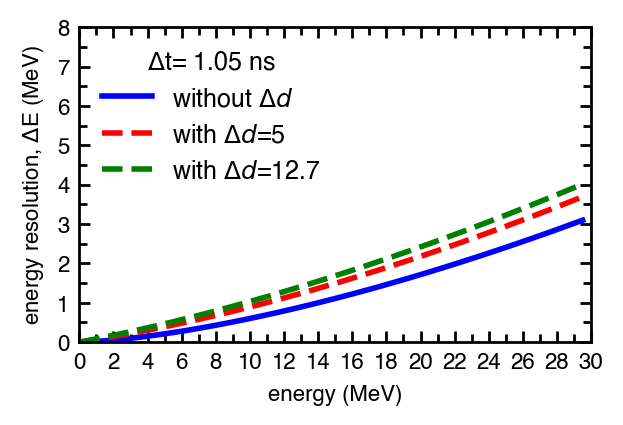

In [403]:
E_0_15MeV= np.arange(0,30,0.5)
Delta_E_DSTOF_0 = E_resolution_DSTOF(E_0_15MeV,1.042,0)
Delta_E_DSTOF_5 = E_resolution_DSTOF(E_0_15MeV,1.042,5)
Delta_E_DSTOF   = E_resolution_DSTOF(E_0_15MeV,1.042,12.7/2)

fig = fig_pre_def(6.5,4) #定義圖片大小 default 8*6
ax =fig.add_subplot(1, 1, 1) #畫一張圖的時候用 111

#for i in time_along:
#    E_along = np.append(E_along,Time_to_energy(timealong))
ax.plot(E_0_15MeV,Delta_E_DSTOF_0,'b'  ,linewidth =2,label = r'without $\Delta d$')
ax.plot(E_0_15MeV,Delta_E_DSTOF_5,'--r',linewidth =2,label = r'with $\Delta d$=5')
ax.plot(E_0_15MeV,Delta_E_DSTOF  ,'--g',linewidth =2,label = r'with $\Delta d$=12.7')

fig_post_def(xlim=(0,30),yticks=(1,0.5),ylim=(0,8),xticks=(2,1),lg_fs=9, xlabel ='energy (MeV)'
              ,ylabel = 'energy resolution, $\Delta$E (MeV)'
              ,title= '$\Delta$t= 1.05 ns')
             #,title=r"energy resolution $\Delta$ E")

#plt.savefig('/Users/thlin/Dropbox/PhD_thesis_博士論文/Figure/GTTOF_150cm_deltaE_5ns.svg', format="svg")

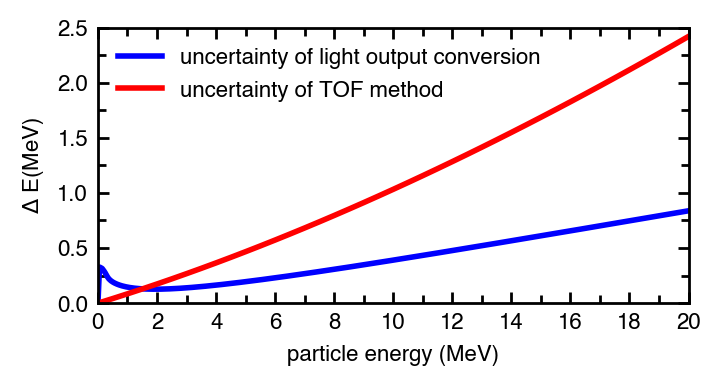

In [404]:
fig = fig_pre_def(7.5,3.5) #定義圖片大小 default 8*6
ax =fig.add_subplot(1, 1, 1) #畫一張圖的時候用 111

#array_show = np.arange(0,len(Ep),5)
ax.plot(Ep       , Delta_E_recoil_P,'b',linewidth =2,label = 'uncertainty of light output conversion')
ax.plot(E_0_15MeV, Delta_E_DSTOF,'r',linewidth =2,label = 'uncertainty of TOF method')#,label = '3.0 m')


fig_post_def(xlim=(0,20),xticks=(2,1)
             ,ylim=(0,2.5),yticks=(0.5,0.25),lg_fs=8
             ,xlabel ='particle energy (MeV)'
             ,ylabel = r'$\Delta$ E(MeV)')#,title=r"recoil proto resolution")

plt.savefig('/Users/thlin/Dropbox/Research/Publication/2023 NSTOF/Figure/Python_export/Fig9_uncertainty.svg', format="svg")


/var/folders/qd/hhwc9gc95fv6tx8vycl4f3bm0000gn/T/ipykernel_34514/2339393456.py:5: RuntimeWarning: invalid value encountered in divide
  ax.plot(Ep       , 100*Delta_E_recoil_P/Ep,'b',linewidth =2,label = 'uncertainty of light output conversion')
/var/folders/qd/hhwc9gc95fv6tx8vycl4f3bm0000gn/T/ipykernel_34514/2339393456.py:6: RuntimeWarning: invalid value encountered in divide
  ax.plot(E_0_15MeV, 100*Delta_E_DSTOF/E_0_15MeV,'r',linewidth =2,label = 'uncertainty of TOF method')#,label = '3.0 m')


(1, 100)

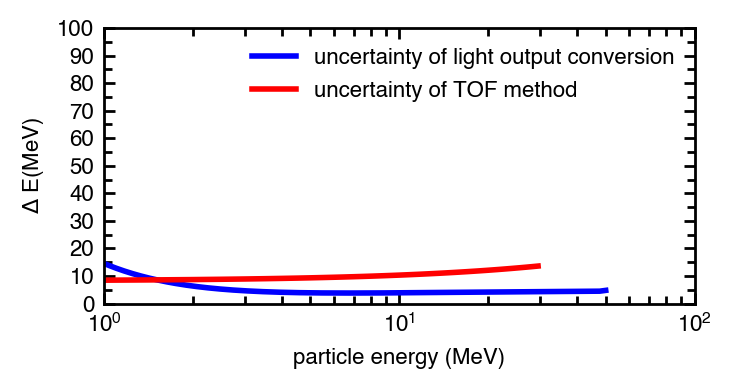

In [405]:
fig = fig_pre_def(7.5,3.5) #定義圖片大小 default 8*6
ax =fig.add_subplot(1, 1, 1) #畫一張圖的時候用 111

#array_show = np.arange(0,len(Ep),5)
ax.plot(Ep       , 100*Delta_E_recoil_P/Ep,'b',linewidth =2,label = 'uncertainty of light output conversion')
ax.plot(E_0_15MeV, 100*Delta_E_DSTOF/E_0_15MeV,'r',linewidth =2,label = 'uncertainty of TOF method')#,label = '3.0 m')


fig_post_def(xlim=(0,20),xticks=(2,1)
             ,ylim=(0,100),yticks=(10,5),lg_fs=8
             ,xlabel ='particle energy (MeV)'
             ,ylabel = r'$\Delta$ E(MeV)')#,title=r"recoil proto resolution")
plt.xscale('log')
plt.xlim(1,100)

In [406]:
def linear_fit(x, a, b):
    return a * x + b
LO_linear, _ = curve_fit(linear_fit, Ep[3000:4500],Delta_E_recoil_P[3000:4500])
print(LO_linear)

Ret_DeltaE_40MeV_x =np.arange(40,150,0.01)
Ret_DeltaE_40MeV_y = Ret_DeltaE_40MeV_x*LO_linear[0]+LO_linear[1]
print(Ret_DeltaE_40MeV_y.shape)
print(Delta_E_recoil_P[0:4000].shape)


Ret_DeltaE_150MeV_x = np.arange(0,150,0.01)
Delta_E_recoil_P_150MeV    = np.hstack((Delta_E_recoil_P[0:4000],Ret_DeltaE_40MeV_y))
print(Ret_DeltaE_150MeV_x.shape)

[ 0.04595198 -0.0820815 ]
(11000,)
(4000,)
(15000,)


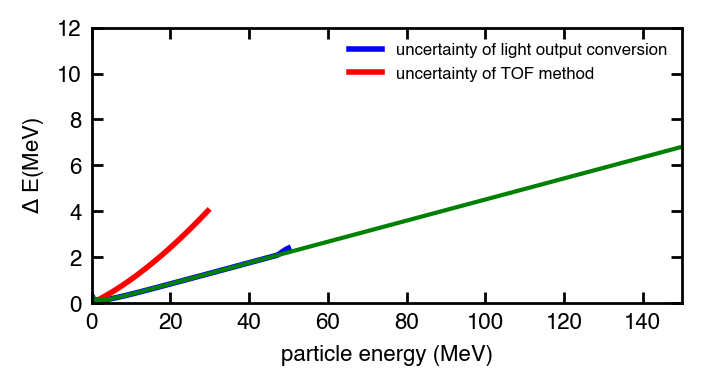

In [407]:
fig = fig_pre_def(7.5,3.5) #定義圖片大小 default 8*6
ax =fig.add_subplot(1, 1, 1) #畫一張圖的時候用 111

#array_show = np.arange(0,len(Ep),5)
ax.plot(Ep                 ,Delta_E_recoil_P,'b',linewidth =2,label = 'uncertainty of light output conversion')
ax.plot(E_0_15MeV          ,Delta_E_DSTOF,'r',linewidth =2,label = 'uncertainty of TOF method')#,label = '3.0 m')
ax.plot(Ret_DeltaE_150MeV_x,Delta_E_recoil_P_150MeV,'g')
#ax.set_ylabel("gdpPercap",color="blue",fontsize=14)

fig_post_def(xlim=(0,150)#,xticks=(2,1)
             ,ylim=(0,12)#,yticks=(0.5,0.25),lg_fs=8
             ,xlabel ='particle energy (MeV)'
             ,ylabel = r'$\Delta$ E(MeV)')#,title=r"recoil proto resolution")

In [551]:
def E_resolution_DSTOF(E,delta_T,dd):
    light_speed = 299792458 # m/s
    neutron_mass = 1.64749*10**-27 #kg
    gamma = 1+(E*(1.6*10**-19)*(10**6)/(neutron_mass*light_speed**2))
    #print(gamma)
    #delta_T = 5 # ns
    TOF = energy_to_time_DSTOF(E)
    
    d=153.81
    delta_E = E*gamma*(gamma+1)*((delta_T/TOF)**2+(dd/d)**2)**0.5
    return delta_E

def E_resolution_gTOF(E,delta_T,dd):
    light_speed = 299792458 # m/s
    neutron_mass = 1.64749*10**-27 #kg
    gamma = 1+(E*(1.6*10**-19)*(10**6)/(neutron_mass*light_speed**2))
    #print(gamma)
    #delta_T = 5 # ns
    TOF = energy_to_time_gTOF(E)
    d=155.85
    delta_E = E*gamma*(gamma+1)*(((0.0847**2)**0.5/TOF)**2+((delta_T**2)**0.5/TOF)**2+(dd/d)**2)**0.5
    return delta_E



In [552]:
E_0_150MeV= np.arange(0,150,0.01)
Delta_E_DSTOF   = E_resolution_DSTOF(E_0_150MeV,1.02,12.7/2)
Delta_E_gTOF    = E_resolution_gTOF (E_0_150MeV,1.02,3*2.54/2) 


/var/folders/qd/hhwc9gc95fv6tx8vycl4f3bm0000gn/T/ipykernel_34514/1535866700.py:7: RuntimeWarning: divide by zero encountered in divide
  TOF= (distance/speed)*10**9
/var/folders/qd/hhwc9gc95fv6tx8vycl4f3bm0000gn/T/ipykernel_34514/1535866700.py:15: RuntimeWarning: divide by zero encountered in divide
  TOF= (distance/speed)*10**9


"\nax2.set_xlim(0,30)\nax2.set_ylim(0,6)\nax2.xaxis.set_major_locator(mpl.ticker.MultipleLocator(5))    \nax2.xaxis.set_minor_locator(mpl.ticker.MultipleLocator(2.5))    \nax2.yaxis.set_major_locator(mpl.ticker.MultipleLocator(1))\nax2.yaxis.set_minor_locator(mpl.ticker.MultipleLocator(0.5))\n\nplt.legend(#title = ' cm',\n           loc='lower right',title_fontsize=8,fontsize=8,frameon=False)\n           "

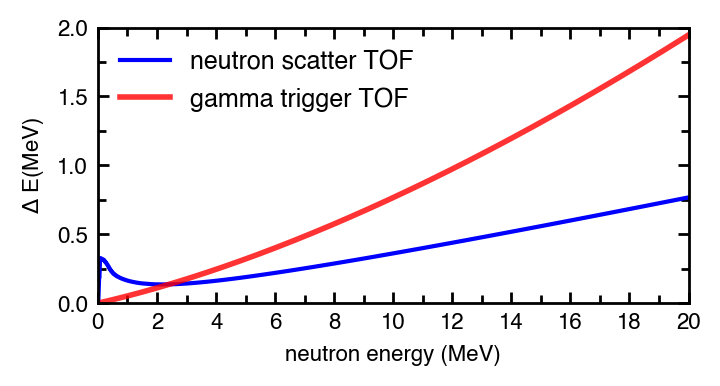

In [553]:
fig = fig_pre_def(7.5,3.5) #定義圖片大小 default 8*6
ax =fig.add_subplot(1, 1, 1) #畫一張圖的時候用 111


Ratio_to_recoil_proton = 0.75
Ratio_to_scattered_neutron = 0.25

scatter_DeltaE=[]
plot_Ep = np.arange(0,30,0.01)
for t in np.arange(0,len(plot_Ep),1):
    scatter_DeltaE_temp = ((Delta_E_recoil_P_150MeV[int(t*Ratio_to_recoil_proton)])**2+(Delta_E_DSTOF[int(t*Ratio_to_scattered_neutron)])**2)**0.5
    scatter_DeltaE      = np.append(scatter_DeltaE,scatter_DeltaE_temp)
    
plt.plot(plot_Ep,scatter_DeltaE,'b',label ='neutron scatter TOF')
#plt.plot(Ep,ret_DeltaE_interploation,'b',linewidth =2,label = 'recoil proton')
#ax2= ax.twinx()
#ax.plot(E_0_15MeV,delta_E_0_15MeV_cm,'--g',linewidth =2,label ='gamma trigger TOF')

ax.plot(E_0_150MeV,Delta_E_gTOF,'-r',linewidth =2,alpha = 0.8,label ='gamma trigger TOF')#,label = '3.0 m')


fig_post_def(xlim=(0,30),xticks=(5,2.5)
             ,ylim=(0,6),yticks=(0.5,0.25)
             ,lg_fs=8
             ,title=r'150 cm $\Delta t = 1.5 ns$'
             ,xlabel ='neutron energy (MeV)'
             ,ylabel = r'$\Delta$ E(MeV)'#,title=r"energy resolution $\Delta$ E")
)

#ax2= ax.twinx()
#ax2.plot(E_0_15MeV,delta_E_0_15MeV_153cm,'--g',linewidth =2,label ='gamma trigger TOF')
#ax2.xaxis.tick_top()
#ax2.yaxis.tick_right()
#ax2.set_xlabel(r'recoil proton energy $E_p$ (MeV)', color="blue") 
#ax2.set_ylabel(r"$\Delta E_p$ (MeV)", color="blue")       
#ax2.xaxis.set_label_position('top') 
#ax2.yaxis.set_label_position('right') 
#ax2.tick_params(axis='x',which = 'both', colors="blue",length=0)
#ax2.tick_params(axis='y',which = 'both', colors="white",length=0)

fig_post_def(xlim=(0,20),xticks=(2,1)
             ,ylim=(0,2.0),yticks=(0.5,0.25)
             ,lg_fs=9
             #,title=r'150 cm $\Delta t = 1.5 ns$'
             ,xlabel ='neutron energy (MeV)'
             ,ylabel = r'$\Delta$ E(MeV)'#,title=r"energy resolution $\Delta$ E")
)

plt.savefig('/Users/thlin/Dropbox/Research/Publication/2023 NSTOF/Figure/Python_export/Fig9_Result_comparison.svg', format="svg")


'''
ax2.set_xlim(0,30)
ax2.set_ylim(0,6)
ax2.xaxis.set_major_locator(mpl.ticker.MultipleLocator(5))    
ax2.xaxis.set_minor_locator(mpl.ticker.MultipleLocator(2.5))    
ax2.yaxis.set_major_locator(mpl.ticker.MultipleLocator(1))
ax2.yaxis.set_minor_locator(mpl.ticker.MultipleLocator(0.5))

plt.legend(#title = ' cm',
           loc='lower right',title_fontsize=8,fontsize=8,frameon=False)
           '''
#plt.savefig('/Users/thlin/Dropbox/NSTOF_para.svg', format="svg")

In [554]:
print(Delta_E_gTOF[240:250])
print(scatter_DeltaE[240:250])
print(Delta_E_gTOF[2000])
print(scatter_DeltaE[2000])

[0.13611482 0.13675535 0.13739646 0.13803813 0.13868038 0.1393232
 0.13996659 0.14061054 0.14125507 0.14190017]
[0.13670912 0.13670912 0.13667328 0.13664108 0.13692509 0.13692509
 0.13690012 0.13687582 0.13717484 0.13717484]
1.9463357230766667
0.7677335766570796


6.0 0.22992310829932652
2.0    0.17375371296237005
0.28819262394834727
0.28819262394834727


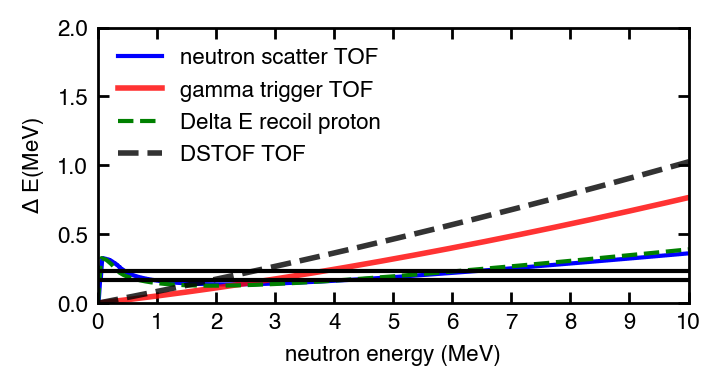

In [555]:
# 150 MeV

fig = fig_pre_def(7.5,3.5) #定義圖片大小 default 8*6
ax =fig.add_subplot(1, 1, 1) #畫一張圖的時候用 111

scatter_DeltaE=[]
plot_Ep = np.arange(0,150,0.01)
for t in np.arange(0,len(plot_Ep),1):
    scatter_DeltaE_temp = ((Delta_E_recoil_P_150MeV[int(t*Ratio_to_recoil_proton)])**2+(Delta_E_DSTOF[int(t*Ratio_to_scattered_neutron)])**2)**0.5
    scatter_DeltaE      = np.append(scatter_DeltaE,scatter_DeltaE_temp)
    
plt.plot(plot_Ep,scatter_DeltaE,'b',label ='neutron scatter TOF')
ax.plot(E_0_150MeV,Delta_E_gTOF,'-r',linewidth =2,alpha = 0.8,label ='gamma trigger TOF')#,label = '3.0 m')

ax.plot(E_0_150MeV,Delta_E_recoil_P_150MeV,'--g',label ='Delta E recoil proton')
ax.plot(E_0_150MeV,Delta_E_DSTOF,'--k',linewidth =2,alpha = 0.8,label ='DSTOF TOF')#,label = '3.0 m')

fig_post_def(xlim=(0,10),xticks=(1,12.5)
             ,ylim=(0,2),yticks=(0.5,5)
             ,lg_fs=8
             #,title=r'150 cm $\Delta t = 1.5 ns$'
             ,xlabel ='neutron energy (MeV)'
             ,ylabel = r'$\Delta$ E(MeV)'#,title=r"energy resolution $\Delta$ E")
)
plt.axhline(0.17,color='black')
plt.axhline(0.23,color='black')
intial_value =800
Ep_divide_value = 600
En_divide_value = 200
#print(E_0_15MeV[intial_value],'  ',delta_E_0_15MeV_153cm[intial_value])
print(E_0_150MeV[Ep_divide_value],Delta_E_recoil_P_150MeV[Ep_divide_value])
print(E_0_150MeV[En_divide_value],'  ',Delta_E_DSTOF[En_divide_value])
print((Delta_E_recoil_P_150MeV[Ep_divide_value]**2+Delta_E_DSTOF[En_divide_value]**2)**0.5)
print(scatter_DeltaE[intial_value])


4.636082934488239
20.615436954383526


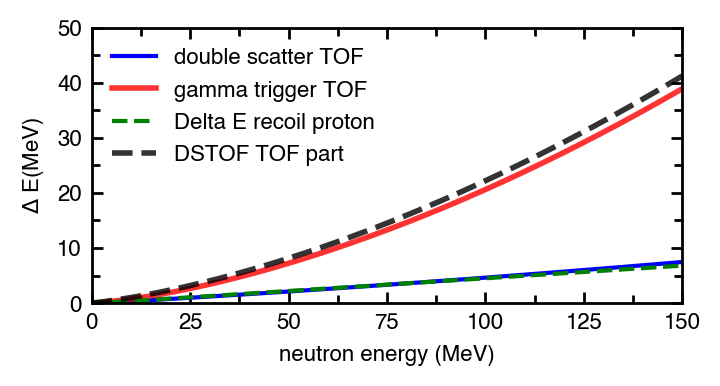

In [556]:
# 150 MeV

fig = fig_pre_def(7.5,3.5) #定義圖片大小 default 8*6
ax =fig.add_subplot(1, 1, 1) #畫一張圖的時候用 111

scatter_DeltaE=[]
modified_scatter_DeltaE=[]

plot_Ep = np.arange(0,150,0.01)
for t in np.arange(0,len(plot_Ep),1):
    scatter_DeltaE_temp = ((Delta_E_recoil_P_150MeV[int(t*Ratio_to_recoil_proton)])**2+(Delta_E_DSTOF[int(t*Ratio_to_scattered_neutron)])**2)**0.5
    scatter_DeltaE      = np.append(scatter_DeltaE,scatter_DeltaE_temp)
    #modified_scatter_DeltaE_temp = ((Delta_E_recoil_P_150MeV[int(t*Ratio_to_recoil_proton)])**2+(Delta_E_DSTOF_modified[int(t*Ratio_to_scattered_neutron)])**2)**0.5
    #modified_scatter_DeltaE = np.append(modified_scatter_DeltaE,modified_scatter_DeltaE_temp)
ax.plot(plot_Ep,scatter_DeltaE,'b',label ='double scatter TOF')
ax.plot(E_0_150MeV,Delta_E_gTOF,'-r',linewidth =2,alpha = 0.8,label ='gamma trigger TOF')#,label = '3.0 m')

ax.plot(E_0_150MeV,Delta_E_recoil_P_150MeV,'--g',label ='Delta E recoil proton')
ax.plot(E_0_150MeV,Delta_E_DSTOF,'--k',linewidth =2,alpha = 0.8,label ='DSTOF TOF part')#,label = '3.0 m')

#ax.plot(E_0_150MeV,Delta_E_DSTOF_modified,'--c',linewidth =2,alpha = 0.8,label ='modified DSTOF TOF part')#,label = '3.0 m')
#ax.plot(E_0_150MeV,modified_scatter_DeltaE,'c',linewidth =2,alpha = 0.8,label ='modified DSTOF 500 cm')#,label = '3.0 m')

fig_post_def(xlim=(0,150),xticks=(25,12.5)
             ,ylim=(0,50),yticks=(10,5)
             ,lg_fs=8
             #,title=r'150 cm $\Delta t = 1.5 ns$'
             ,xlabel ='neutron energy (MeV)'
             ,ylabel = r'$\Delta$ E(MeV)'#,title=r"energy resolution $\Delta$ E")
)
print(scatter_DeltaE[10000])
#print(modified_scatter_DeltaE[10000])
print(Delta_E_gTOF[10000])

/var/folders/qd/hhwc9gc95fv6tx8vycl4f3bm0000gn/T/ipykernel_34514/2414028518.py:12: RuntimeWarning: invalid value encountered in divide
  plt.plot(plot_Ep,100*scatter_DeltaE/plot_Ep,'b',label ='neutron scatter TOF')
/var/folders/qd/hhwc9gc95fv6tx8vycl4f3bm0000gn/T/ipykernel_34514/2414028518.py:15: RuntimeWarning: invalid value encountered in divide
  ax.plot(E_0_150MeV,100*Delta_E_gTOF/E_0_150MeV,'-r',linewidth =2,alpha = 0.8,label ='gamma trigger TOF')#,label = '3.0 m')
/var/folders/qd/hhwc9gc95fv6tx8vycl4f3bm0000gn/T/ipykernel_34514/2414028518.py:17: RuntimeWarning: invalid value encountered in divide
  ax.plot(E_0_150MeV,100*Delta_E_recoil_P_150MeV/E_0_150MeV,'--g',label ='Delta E recoil proton')
/var/folders/qd/hhwc9gc95fv6tx8vycl4f3bm0000gn/T/ipykernel_34514/2414028518.py:18: RuntimeWarning: invalid value encountered in divide
  ax.plot(E_0_150MeV,100*Delta_E_DSTOF/E_0_150MeV,'--k',linewidth =2,alpha = 0.8,label ='DSTOF TOF')#,label = '3.0 m')


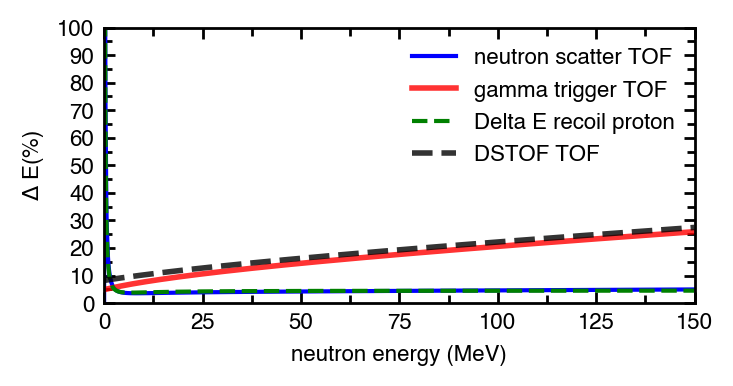

In [557]:
# 150 MeV

fig = fig_pre_def(7.5,3.5) #定義圖片大小 default 8*6
ax =fig.add_subplot(1, 1, 1) #畫一張圖的時候用 111

scatter_DeltaE=[]
plot_Ep = np.arange(0,150,0.01)
for t in np.arange(0,len(plot_Ep),1):
    scatter_DeltaE_temp = ((Delta_E_recoil_P_150MeV[int(t*Ratio_to_recoil_proton)])**2+(Delta_E_DSTOF[int(t*Ratio_to_scattered_neutron)])**2)**0.5
    scatter_DeltaE      = np.append(scatter_DeltaE,scatter_DeltaE_temp)
    
plt.plot(plot_Ep,100*scatter_DeltaE/plot_Ep,'b',label ='neutron scatter TOF')


ax.plot(E_0_150MeV,100*Delta_E_gTOF/E_0_150MeV,'-r',linewidth =2,alpha = 0.8,label ='gamma trigger TOF')#,label = '3.0 m')

ax.plot(E_0_150MeV,100*Delta_E_recoil_P_150MeV/E_0_150MeV,'--g',label ='Delta E recoil proton')
ax.plot(E_0_150MeV,100*Delta_E_DSTOF/E_0_150MeV,'--k',linewidth =2,alpha = 0.8,label ='DSTOF TOF')#,label = '3.0 m')


fig_post_def(xlim=(0,150),xticks=(25,12.5)
             ,ylim=(0,100),yticks=(10,5)
             ,lg_fs=8
             #,title=r'150 cm $\Delta t = 1.5 ns$'
             ,xlabel ='neutron energy (MeV)'
             ,ylabel = r'$\Delta$ E(%)'#,title=r"energy resolution $\Delta$ E")
)

#plt.xscale('log')
#plt.xlim(1,1000)

13.5 0.5436028082872427
4.5    0.41406076294101
0.6833376387885187


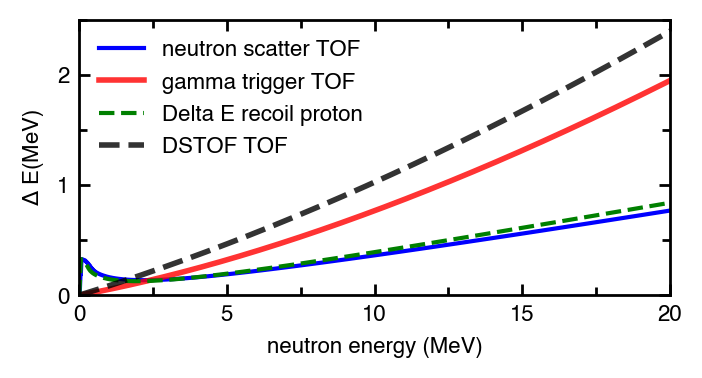

In [558]:
# 150 MeV

fig = fig_pre_def(7.5,3.5) #定義圖片大小 default 8*6
ax =fig.add_subplot(1, 1, 1) #畫一張圖的時候用 111

scatter_DeltaE=[]
plot_Ep = np.arange(0,150,0.01)
for t in np.arange(0,len(plot_Ep),1):
    scatter_DeltaE_temp = ((Delta_E_recoil_P_150MeV[int(t*3/4)])**2+(Delta_E_DSTOF[int(t*1/4)])**2)**0.5
    scatter_DeltaE      = np.append(scatter_DeltaE,scatter_DeltaE_temp)
    
ax.plot(plot_Ep,scatter_DeltaE,'b',label ='neutron scatter TOF')
ax.plot(E_0_150MeV,Delta_E_gTOF,'-r',linewidth =2,alpha = 0.8,label ='gamma trigger TOF')#,label = '3.0 m')

ax.plot(E_0_150MeV,Delta_E_recoil_P_150MeV,'--g',label ='Delta E recoil proton')
ax.plot(E_0_150MeV,Delta_E_DSTOF,'--k',linewidth =2,alpha = 0.8,label ='DSTOF TOF')#,label = '3.0 m')


fig_post_def(xlim=(0,20),xticks=(5,2.5)
             ,ylim=(0,2.5),yticks=(1,0.5)
             ,lg_fs=8
             #,title=r'150 cm $\Delta t = 1.5 ns$'
             ,xlabel ='neutron energy (MeV)'
             ,ylabel = r'$\Delta$ E(MeV)'#,title=r"energy resolution $\Delta$ E")
)

intial_value =1800
Ep_divide_value = 1350
En_divide_value = 450
#print(E_0_15MeV[intial_value],'  ',delta_E_0_15MeV_153cm[intial_value])
print(E_0_150MeV[Ep_divide_value],Delta_E_recoil_P_150MeV[Ep_divide_value])
print(E_0_150MeV[En_divide_value],'  ',Delta_E_DSTOF[En_divide_value])
print((Delta_E_recoil_P_150MeV[Ep_divide_value]**2+Delta_E_DSTOF[En_divide_value]**2)**0.5)


In [559]:
def energy_to_time_DSTOF_modified(E,d):
    distance = d/100 #1.5381 # m
    light_speed = 299792458 # m/s
    neutron_mass = 1.64749*10**-27 #kg
    core = (1+(E*10**6*1.6*10**-19/(neutron_mass*light_speed**2)))
    speed = ((1-core**-2)*light_speed**2)**0.5
    TOF= (distance/speed)*10**9
    return TOF

def E_resolution_DSTOF_modified(E,delta_T,d,dd):
    light_speed = 299792458 # m/s
    neutron_mass = 1.64749*10**-27 #kg
    gamma = 1+(E*(1.6*10**-19)*(10**6)/(neutron_mass*light_speed**2))
    #print(gamma)
    #delta_T = 5 # ns

    TOF = energy_to_time_DSTOF_modified(E,d)
    
    delta_E = E*gamma*(gamma+1)*((delta_T/TOF)**2+(dd/d)**2)**0.5
    return delta_E


def energy_to_time_gTOF_modified(E,d):
    distance = d/100 # m
    light_speed = 299792458 # m/s
    neutron_mass = 1.64749*10**-27 #kg
    core = (1+(E*10**6*1.6*10**-19/(neutron_mass*light_speed**2)))
    speed = ((1-core**-2)*light_speed**2)**0.5
    TOF= (distance/speed)*10**9
    return TOF

def E_resolution_gTOF_modified(E,delta_T,d,dd):
    light_speed = 299792458 # m/s
    neutron_mass = 1.64749*10**-27 #kg
    gamma = 1+(E*(1.6*10**-19)*(10**6)/(neutron_mass*light_speed**2))
    #print(gamma)
    #delta_T = 5 # ns

    TOF = energy_to_time_gTOF_modified(E,d)
    delta_E = E*gamma*(gamma+1)*(((0.0847**2)**0.5/TOF)**2+((delta_T**2)**0.5/TOF)**2+(dd/d)**2)**0.5
    return delta_E
distance =900
Delta_E_DSTOF_modified = E_resolution_DSTOF_modified(E_0_150MeV,1.02,distance,12.7/2)
Delta_E_gTOF_modified    = E_resolution_gTOF_modified (E_0_150MeV,1.02,distance, 3*2.54/2) 

/var/folders/qd/hhwc9gc95fv6tx8vycl4f3bm0000gn/T/ipykernel_34514/3266595847.py:7: RuntimeWarning: divide by zero encountered in divide
  TOF= (distance/speed)*10**9
/var/folders/qd/hhwc9gc95fv6tx8vycl4f3bm0000gn/T/ipykernel_34514/3266595847.py:29: RuntimeWarning: divide by zero encountered in divide
  TOF= (distance/speed)*10**9


3.408195745625878
3.569906499267414


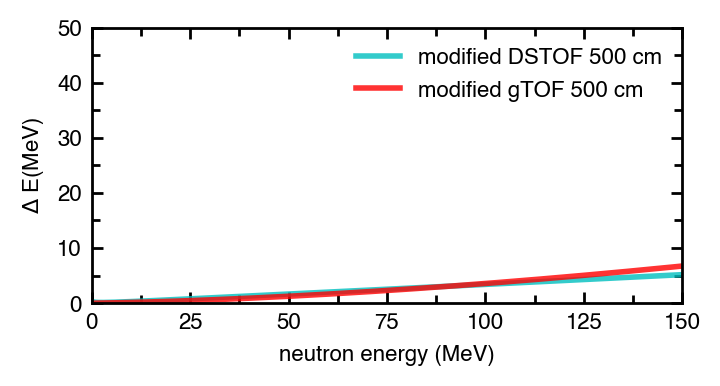

In [560]:
# 150 MeV

fig = fig_pre_def(7.5,3.5) #定義圖片大小 default 8*6
ax =fig.add_subplot(1, 1, 1) #畫一張圖的時候用 111

scatter_DeltaE=[]
modified_scatter_DeltaE=[]

plot_Ep = np.arange(0,150,0.01)
for t in np.arange(0,len(plot_Ep),1):
    #scatter_DeltaE_temp = ((Delta_E_recoil_P_150MeV[int(t*Ratio_to_recoil_proton)])**2+(Delta_E_DSTOF[int(t*Ratio_to_scattered_neutron)])**2)**0.5
    #scatter_DeltaE      = np.append(scatter_DeltaE,scatter_DeltaE_temp)
    modified_scatter_DeltaE_temp = ((Delta_E_recoil_P_150MeV[int(t*Ratio_to_recoil_proton)])**2+(Delta_E_DSTOF_modified[int(t*Ratio_to_scattered_neutron)])**2)**0.5
    modified_scatter_DeltaE = np.append(modified_scatter_DeltaE,modified_scatter_DeltaE_temp)
#ax.plot(plot_Ep,scatter_DeltaE,'b',label ='double scatter TOF')
#ax.plot(E_0_150MeV,Delta_E_gTOF,'-r',linewidth =2,alpha = 0.8,label ='gamma trigger TOF')#,label = '3.0 m')

#ax.plot(E_0_150MeV,Delta_E_recoil_P_150MeV,'--g',label ='Delta E recoil proton')
#ax.plot(E_0_150MeV,Delta_E_DSTOF,'--k',linewidth =2,alpha = 0.8,label ='DSTOF TOF part')#,label = '3.0 m')

#ax.plot(E_0_150MeV,Delta_E_DSTOF_modified,'--c',linewidth =2,alpha = 0.8,label ='modified DSTOF TOF part')#,label = '3.0 m')
ax.plot(E_0_150MeV,modified_scatter_DeltaE,'c',linewidth =2,alpha = 0.8,label ='modified DSTOF 500 cm')#,label = '3.0 m')
ax.plot(E_0_150MeV,Delta_E_gTOF_modified,'r',linewidth =2,alpha = 0.8,label ='modified gTOF 500 cm')#,label = '3.0 m')



fig_post_def(xlim=(0,150),xticks=(25,12.5)
             ,ylim=(0,50),yticks=(10,5)
             ,lg_fs=8
             #,title=r'150 cm $\Delta t = 1.5 ns$'
             ,xlabel ='neutron energy (MeV)'
             ,ylabel = r'$\Delta$ E(MeV)'#,title=r"energy resolution $\Delta$ E")
)

print(modified_scatter_DeltaE[10000])
print(Delta_E_gTOF_modified[10000])

5.831598002931506


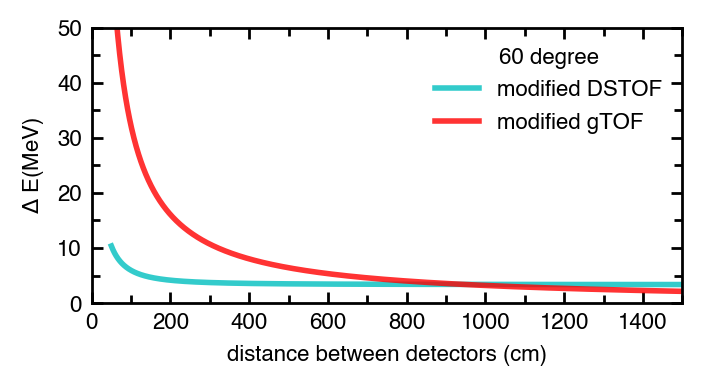

In [561]:
distance = np.arange(50,1500,1)
Delta_E_DSTOF_modified_d   = E_resolution_DSTOF_modified(25,1.02,distance,12.7/2)
Delta_E_gTOF_modified_d    = E_resolution_gTOF_modified (100,1.02,distance, 3*2.54/2) 
modified_scatter_DeltaE_d  = ((Delta_E_recoil_P_150MeV[int(100*75)])**2+(Delta_E_DSTOF_modified_d)**2)**0.5

# 150 MeV

fig = fig_pre_def(7.5,3.5) #定義圖片大小 default 8*6
ax =fig.add_subplot(1, 1, 1) #畫一張圖的時候用 111

scatter_DeltaE=[]
modified_scatter_DeltaE=[]

#plot_Ep = np.arange(0,150,0.01)
#for t in np.arange(0,len(plot_Ep),1):
    #scatter_DeltaE_temp = ((Delta_E_recoil_P_150MeV[int(t*Ratio_to_recoil_proton)])**2+(Delta_E_DSTOF[int(t*Ratio_to_scattered_neutron)])**2)**0.5
    #scatter_DeltaE      = np.append(scatter_DeltaE,scatter_DeltaE_temp)
    #modified_scatter_DeltaE_temp = ((Delta_E_recoil_P_150MeV[int(t*Ratio_to_recoil_proton)])**2+(Delta_E_DSTOF_modified[int(t*Ratio_to_scattered_neutron)])**2)**0.5
    #modified_scatter_DeltaE = np.append(modified_scatter_DeltaE,modified_scatter_DeltaE_temp)
#ax.plot(plot_Ep,scatter_DeltaE,'b',label ='double scatter TOF')
#ax.plot(E_0_150MeV,Delta_E_gTOF,'-r',linewidth =2,alpha = 0.8,label ='gamma trigger TOF')#,label = '3.0 m')

#ax.plot(E_0_150MeV,Delta_E_recoil_P_150MeV,'--g',label ='Delta E recoil proton')
#ax.plot(E_0_150MeV,Delta_E_DSTOF,'--k',linewidth =2,alpha = 0.8,label ='DSTOF TOF part')#,label = '3.0 m')

#ax.plot(E_0_150MeV,Delta_E_DSTOF_modified,'--c',linewidth =2,alpha = 0.8,label ='modified DSTOF TOF part')#,label = '3.0 m')
ax.plot(distance,modified_scatter_DeltaE_d,'c',linewidth =2,alpha = 0.8,label ='modified DSTOF')#,label = '3.0 m')
ax.plot(distance,Delta_E_gTOF_modified_d,'r',linewidth =2,alpha = 0.8,label ='modified gTOF')#,label = '3.0 m')



fig_post_def(xlim=(0,1500),xticks=(200,100)
             ,ylim=(0,50),yticks=(10,5)
             ,lg_fs=8
             ,title=r'60 degree'
             ,xlabel ='distance between detectors (cm)'
             ,ylabel = r'$\Delta$ E(MeV)'#,title=r"energy resolution $\Delta$ E")
)

print(modified_scatter_DeltaE_d[53])
#print(Delta_E_gTOF_modified[10000])


21.713147080638734


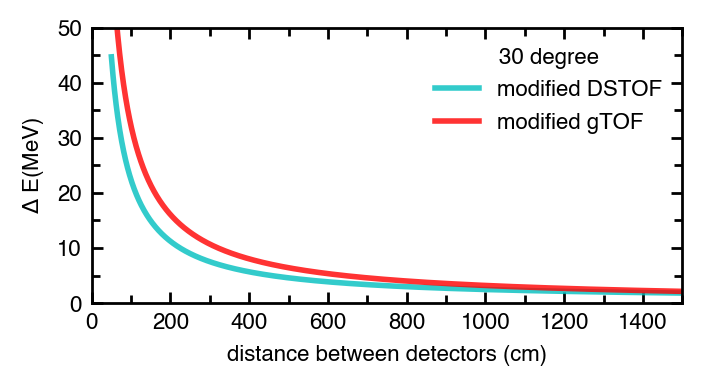

In [562]:
distance = np.arange(50,1500,1)
Delta_E_DSTOF_modified_d   = E_resolution_DSTOF_modified(75,1.02,distance,12.7/2)
Delta_E_gTOF_modified_d    = E_resolution_gTOF_modified (100,1.02,distance, 3*2.54/2) 
modified_scatter_DeltaE_d  = ((Delta_E_recoil_P_150MeV[int(100*25)])**2+(Delta_E_DSTOF_modified_d)**2)**0.5

# 150 MeV

fig = fig_pre_def(7.5,3.5) #定義圖片大小 default 8*6
ax =fig.add_subplot(1, 1, 1) #畫一張圖的時候用 111

scatter_DeltaE=[]
modified_scatter_DeltaE=[]

#plot_Ep = np.arange(0,150,0.01)
#for t in np.arange(0,len(plot_Ep),1):
    #scatter_DeltaE_temp = ((Delta_E_recoil_P_150MeV[int(t*Ratio_to_recoil_proton)])**2+(Delta_E_DSTOF[int(t*Ratio_to_scattered_neutron)])**2)**0.5
    #scatter_DeltaE      = np.append(scatter_DeltaE,scatter_DeltaE_temp)
    #modified_scatter_DeltaE_temp = ((Delta_E_recoil_P_150MeV[int(t*Ratio_to_recoil_proton)])**2+(Delta_E_DSTOF_modified[int(t*Ratio_to_scattered_neutron)])**2)**0.5
    #modified_scatter_DeltaE = np.append(modified_scatter_DeltaE,modified_scatter_DeltaE_temp)
#ax.plot(plot_Ep,scatter_DeltaE,'b',label ='double scatter TOF')
#ax.plot(E_0_150MeV,Delta_E_gTOF,'-r',linewidth =2,alpha = 0.8,label ='gamma trigger TOF')#,label = '3.0 m')

#ax.plot(E_0_150MeV,Delta_E_recoil_P_150MeV,'--g',label ='Delta E recoil proton')
#ax.plot(E_0_150MeV,Delta_E_DSTOF,'--k',linewidth =2,alpha = 0.8,label ='DSTOF TOF part')#,label = '3.0 m')

#ax.plot(E_0_150MeV,Delta_E_DSTOF_modified,'--c',linewidth =2,alpha = 0.8,label ='modified DSTOF TOF part')#,label = '3.0 m')
ax.plot(distance,modified_scatter_DeltaE_d,'c',linewidth =2,alpha = 0.8,label ='modified DSTOF')#,label = '3.0 m')
ax.plot(distance,Delta_E_gTOF_modified_d,'r',linewidth =2,alpha = 0.8,label ='modified gTOF')#,label = '3.0 m')



fig_post_def(xlim=(0,1500),xticks=(200,100)
             ,ylim=(0,50),yticks=(10,5)
             ,lg_fs=8
             ,title=r'30 degree'
             ,xlabel ='distance between detectors (cm)'
             ,ylabel = r'$\Delta$ E(MeV)'#,title=r"energy resolution $\Delta$ E")
)

print(modified_scatter_DeltaE_d[53])
#print(Delta_E_gTOF_modified[10000])


In [563]:
def energy_to_time_DSTOF_modified(E,d):
    distance = d/100 #1.5381 # m
    light_speed = 299792458 # m/s
    neutron_mass = 1.64749*10**-27 #kg
    core = (1+(E*10**6*1.6*10**-19/(neutron_mass*light_speed**2)))
    speed = ((1-core**-2)*light_speed**2)**0.5
    TOF= (distance/speed)*10**9
    return TOF

def E_resolution_DSTOF_accelerator(E,delta_T,d,dd):
    light_speed = 299792458 # m/s
    neutron_mass = 1.64749*10**-27 #kg
    gamma = 1+(E*(1.6*10**-19)*(10**6)/(neutron_mass*light_speed**2))
    #print(gamma)
    #delta_T = 5 # ns
    TOF = energy_to_time_DSTOF_modified(E,d)
    delta_E = E*gamma*(gamma+1)*((delta_T/TOF)**2+(1/TOF)**2+(0.1/d)**2+(dd/d)**2)**0.5
    return delta_E

/var/folders/qd/hhwc9gc95fv6tx8vycl4f3bm0000gn/T/ipykernel_34514/964644227.py:7: RuntimeWarning: divide by zero encountered in divide
  TOF= (distance/speed)*10**9


1.2524187756858332
5.141303791573627
4.636082934488239


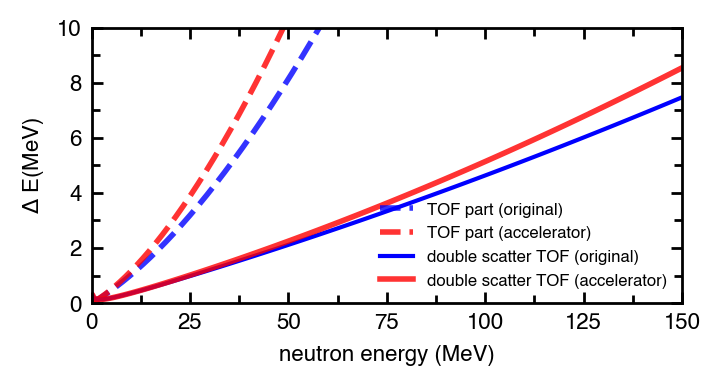

In [579]:
# 150 MeV

fig = fig_pre_def(7.5,3.5) #定義圖片大小 default 8*6
ax =fig.add_subplot(1, 1, 1) #畫一張圖的時候用 111

scatter_DeltaE=[]
modified_scatter_DeltaE=[]
Delta_E_DSTOF_accelerator = E_resolution_DSTOF_accelerator(E_0_150MeV,1.02,155.85,12.7/2)
Delta_E_DSTOF   = E_resolution_DSTOF(E_0_150MeV,1.02,12.7/2)
plot_Ep = np.arange(0,150,0.01)
for t in np.arange(0,len(plot_Ep),1):
    scatter_DeltaE_temp = ((Delta_E_recoil_P_150MeV[int(t*Ratio_to_recoil_proton)])**2+(Delta_E_DSTOF[int(t*Ratio_to_scattered_neutron)])**2)**0.5
    scatter_DeltaE      = np.append(scatter_DeltaE,scatter_DeltaE_temp)
    modified_scatter_DeltaE_temp = ((Delta_E_recoil_P_150MeV[int(t*Ratio_to_recoil_proton)])**2+(Delta_E_DSTOF_accelerator[int(t*Ratio_to_scattered_neutron)])**2)**0.5
    modified_scatter_DeltaE = np.append(modified_scatter_DeltaE,modified_scatter_DeltaE_temp)

#ax.plot(E_0_150MeV,Delta_E_gTOF,'-r',linewidth =2,alpha = 0.8,label ='gamma trigger TOF')#,label = '3.0 m')

#ax.plot(E_0_150MeV,Delta_E_recoil_P_150MeV,'--g',label ='Delta E recoil proton')

ax.plot(E_0_150MeV,Delta_E_DSTOF,'--b',linewidth =2,alpha = 0.8,label ='TOF part (original)')#,label = '3.0 m')
ax.plot(E_0_150MeV,Delta_E_DSTOF_accelerator,'--r',linewidth =2,alpha = 0.8,label ='TOF part (accelerator)')#,label = '3.0 m')

ax.plot(plot_Ep,scatter_DeltaE,'b',label ='double scatter TOF (original)')
ax.plot(E_0_150MeV,modified_scatter_DeltaE,'r',linewidth =2,alpha = 0.8,label ='double scatter TOF (accelerator)')#,label = '3.0 m')

#ax.plot(E_0_150MeV,Delta_E_gTOF_modified,'r',linewidth =2,alpha = 0.8,label ='modified gTOF 500 cm')#,label = '3.0 m')



fig_post_def(xlim=(0,150),xticks=(25,12.5)
             ,ylim=(0,10),yticks=(2,1)
             ,lg_fs=6
             #,title=r'accelerator'
             ,xlabel ='neutron energy (MeV)'
             ,ylabel = r'$\Delta$ E(MeV)'#,title=r"energy resolution $\Delta$ E")
)
print(modified_scatter_DeltaE[3000])
print(modified_scatter_DeltaE[10000])
print(scatter_DeltaE[10000])

In [473]:
def energy_to_time_845cmXX(E):
    distance = 8.45 # m
    light_speed = 299792458 # m/s
    neutron_mass = 1.64749*10**-27 #kg
    TOF = distance/((2*E*(1.6*10**-19)*(10**6)/neutron_mass)**0.5)*10**9 #ns
    return TOF
def energy_to_time_845cm(E):
    distance = 8.45 # m
    light_speed = 299792458 # m/s
    neutron_mass = 1.64749*10**-27 #kg
    core = (1+(E*10**6*1.6*10**-19/(neutron_mass*light_speed**2)))
    speed = ((1-core**-2)*light_speed**2)**0.5
    TOF= (distance/speed)*10**9
    return TOF

def E_resolution_gTOF_845(E,delta_T,dd):
    light_speed = 299792458 # m/s
    neutron_mass = 1.64749*10**-27 #kg
    gamma = 1+(E*(1.6*10**-19)*(10**6)/(neutron_mass*light_speed**2))
    #print(gamma)
    #delta_T = 5 # ns
    TOF = energy_to_time_845cm(E)
    d=845
    delta_E = E*gamma*(gamma+1)*(((delta_T**2)**0.5/TOF)**2+(dd/d)**2)**0.5
    return delta_E


/var/folders/qd/hhwc9gc95fv6tx8vycl4f3bm0000gn/T/ipykernel_34514/2322481785.py:13: RuntimeWarning: divide by zero encountered in divide
  TOF= (distance/speed)*10**9
/var/folders/qd/hhwc9gc95fv6tx8vycl4f3bm0000gn/T/ipykernel_34514/3517400327.py:10: RuntimeWarning: invalid value encountered in divide
  plt.plot(N_E,Delta_E_845cm/N_E)
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


(1, 1000)

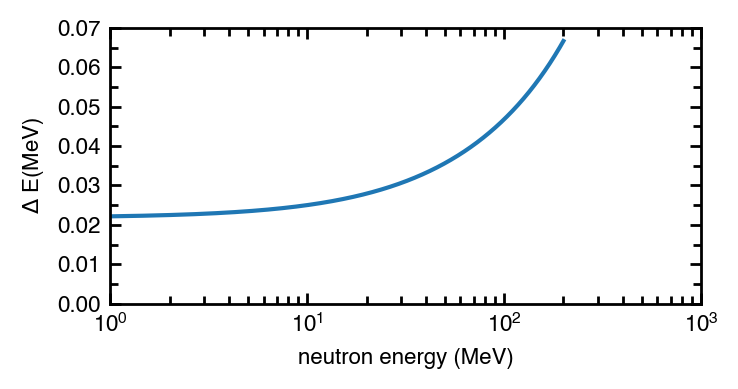

In [474]:
fig = fig_pre_def(7.5,3.5) #定義圖片大小 default 8*6
ax =fig.add_subplot(1, 1, 1) #畫一張圖的時候用 111

scatter_DeltaE=[]
plot_Ep = np.arange(0,30,0.01)

N_E= np.arange(0,200,0.01)
Delta_E_845cm = E_resolution_gTOF_845(N_E,1.1,6.35+2.87)

plt.plot(N_E,Delta_E_845cm/N_E)

# for t in np.arange(0,len(plot_Ep),1):
#    scatter_DeltaE_temp = ((Delta_E_recoil_P_150MeV[int(t*3/4)])**2+(Delta_E_DSTOF[int(t*1/4)])**2)**0.5
#    scatter_DeltaE      = np.append(scatter_DeltaE,scatter_DeltaE_temp)
    
#ax.plot(plot_Ep,scatter_DeltaE,'b',label ='neutron scatter TOF')
#ax.plot(E_0_150MeV,Delta_E_gTOF,'-r',linewidth =2,alpha = 0.8,label ='gamma trigger TOF')#,label = '3.0 m')

#ax.plot(E_0_150MeV,Delta_E_recoil_P_150MeV,'--g',label ='Delta E recoil proton')
#ax.plot(E_0_150MeV,Delta_E_DSTOF,'--k',linewidth =2,alpha = 0.8,label ='DSTOF TOF')#,label = '3.0 m')


fig_post_def(xlim=(0,20),xticks=(5,2.5)
             ,ylim=(0,0.07),yticks=(0.01,0.005)
             ,lg_fs=8
             #,title=r'150 cm $\Delta t = 1.5 ns$'
             ,xlabel ='neutron energy (MeV)'
             ,ylabel = r'$\Delta$ E(MeV)'#,title=r"energy resolution $\Delta$ E")
)
plt.xscale('log')
plt.xlim(1,1000)

ValueError: x and y must have same first dimension, but have shapes (15000,) and (12000,)

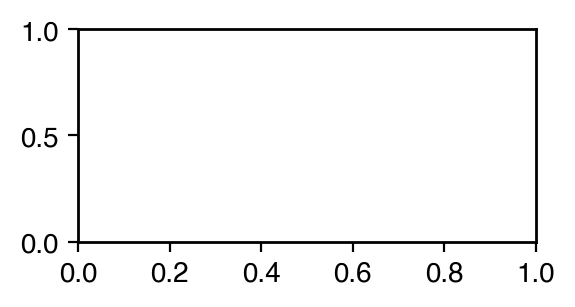

In [333]:
fig = fig_pre_def(7.5,3.5) #定義圖片大小 default 8*6
ax =fig.add_subplot(1, 1, 1) #畫一張圖的時候用 111


plt.plot(E_0_150MeV,delta_E_0_15MeV_153cm)
plt.plot(Ep,ret_DeltaE_interploation)

plt.plot(plot_Ep,scatter_DeltaE,'b',label ='neutron scatter TOF')
ax.plot(E_0_15MeV,delta_E_0_15MeV_153cm_g,'-r',linewidth =2,alpha = 0.8,label ='gamma trigger TOF')#,label = '3.0 m')

fig_post_def(xlim=(0,20),xticks=(2,1)
             ,ylim=(0,2.5),yticks=(0.5,0.25)
             ,lg_fs=9
             #,title=r'150 cm $\Delta t = 1.5 ns$'
             ,xlabel ='neutron energy (MeV)'
             ,ylabel = r'$\Delta$ E(MeV)'#,title=r"energy resolution $\Delta$ E")
)

intial_value =1800
Ep_divide_value = 1350
En_divide_value = 450
print(E_0_15MeV[intial_value],'  ',delta_E_0_15MeV_153cm[intial_value])
print(Ep[Ep_divide_value],ret_DeltaE_interploation[Ep_divide_value])
print(E_0_15MeV[En_divide_value],'  ',delta_E_0_15MeV_153cm[En_divide_value])
print((ret_DeltaE_interploation[Ep_divide_value]**2+delta_E_0_15MeV_153cm[En_divide_value]**2)**0.5)


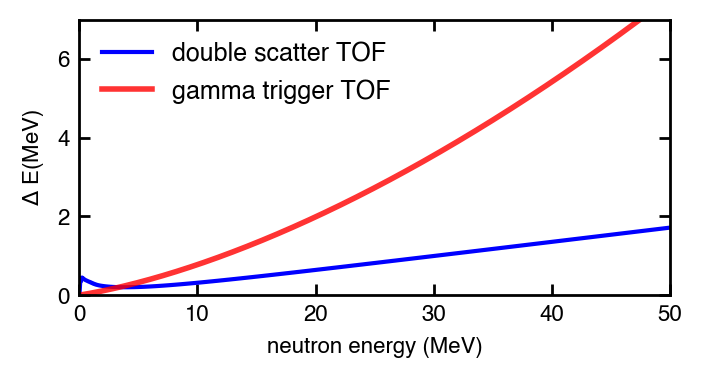

In [209]:
fig = fig_pre_def(7.5,3.5) #定義圖片大小 default 8*6
ax =fig.add_subplot(1, 1, 1) #畫一張圖的時候用 111

#E_0_15MeV= np.arange(0,100,0.01)
#delta_E_0_15MeV_230cm = E_resolution_fun_230cm(E_0_15MeV,1.042)
#delta_E_0_15MeV_153cm = E_resolution_fun_153cm_dd(E_0_15MeV,1.05,12.7)

#x.plot(E_0_15MeV,delta_E_0_15MeV_153cm,'-r',linewidth =2,label ='gamma trigger TOF')#,label = '3.0 m')

#Ret_DeltaE_150MeV_x,delta_E_0_150MeV

scatter_DeltaE=[]
plot_Ep = np.arange(0,150,0.01)
for t in np.arange(0,len(plot_Ep),1):
    scatter_DeltaE_temp= ((delta_E_0_150MeV[int(t/4)])**2+(delta_E_0_15MeV_153cm[int(t*3/4)])**2)**0.5
    scatter_DeltaE = np.append(scatter_DeltaE,scatter_DeltaE_temp)
    
plt.plot(plot_Ep,scatter_DeltaE,'b',label ='double scatter TOF')
#plt.plot(Ep,ret_DeltaE_interploation,'b',linewidth =2,label = 'recoil proton')
#ax2= ax.twinx()
#ax.plot(E_0_15MeV,delta_E_0_15MeV_cm,'--g',linewidth =2,label ='gamma trigger TOF')

ax.plot(E_0_15MeV,delta_E_0_15MeV_153cm_g,'-r',linewidth =2,alpha = 0.8,label ='gamma trigger TOF')#,label = '3.0 m')



fig_post_def(xlim=(0,50)#,xticks=(2,1)
             ,ylim=(0,7.0)#,yticks=(0.5,0.25)
             ,lg_fs=9
             #,title=r'150 cm $\Delta t = 1.5 ns$'
             ,xlabel ='neutron energy (MeV)'
             ,ylabel = r'$\Delta$ E(MeV)'#,title=r"energy resolution $\Delta$ E")
)

#plt.savefig('/Users/thlin/Dropbox/Research/Publication/2023 NSTOF/Figure/Python_export/Fig9_Result_comparison.svg', format="svg")


In [134]:
print(delta_E_0_15MeV_153cm_g[817])
print(scatter_DeltaE[817])

0.5970469184656781
0.5970542840943042


In [135]:
print(delta_E_0_15MeV_153cm_g[500])
print(scatter_DeltaE[500])

print(delta_E_0_15MeV_153cm_g[2000])
print(scatter_DeltaE[2000])

0.32317710061683885
0.36562103054263617
1.9886232455329578
1.6905930492487076


In [136]:

def energy_to_time_cm(E):
    distance = 4 # m
    light_speed = 299792458 # m/s
    neutron_mass = 1.64749*10**-27 #kg
    TOF = distance/((2*E*(1.6*10**-19)*(10**6)/neutron_mass)**0.5)*10**9 #ns
    return TOF

def E_resolution_fun_cm(E,delta_T):
    light_speed = 299792458 # m/s
    neutron_mass = 1.64749*10**-27 #kg
    gamma = 1+(E*(1.6*10**-19)*(10**6)/(neutron_mass*light_speed**2))
    #print(gamma)
    #delta_T = 5 # ns
    TOF = energy_to_time_cm(E)
    delta_E = E*gamma*(gamma+1)*(delta_T/TOF)
    return delta_E

ValueError: x and y must have same first dimension, but have shapes (8000,) and (1600,)

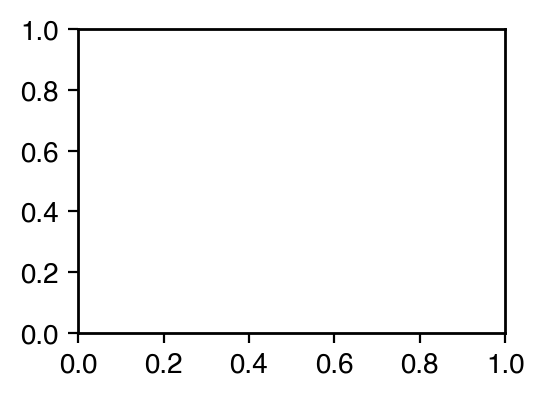

In [137]:
fig = fig_pre_def(7,5) #定義圖片大小 default 8*6
ax =fig.add_subplot(1, 1, 1) #畫一張圖的時候用 111

array_show = np.arange(0,len(Ep),5)
ax.plot(E_0_15MeV,delta_E_0_15MeV_294cm,'--r',linewidth =2,label ='gamma trigger TOF')#,label = '3.0 m')

scatter_DeltaE=[]
plot_Ep = np.arange(0,30,0.05)
for t in np.arange(0,len(plot_Ep),1):
    scatter_DeltaE_temp= ((ret_DeltaE_interploation[int(t/4)])**2+(delta_E_0_15MeV_294cm[int(t*3/4)])**2)**0.5
    scatter_DeltaE = np.append(scatter_DeltaE,scatter_DeltaE_temp)
plt.plot(plot_Ep,scatter_DeltaE,'b',label ='neutron scatter TOF')

fig_post_def(xlim=(0,30),xticks=(5,2.5)
             ,ylim=(0,3),yticks=(0.5,0.25)
             ,lg_fs=9
             ,title='294 cm'
             ,xlabel ='neutron energy (MeV)'
             ,ylabel = r'$\Delta$ E(MeV)'#,title=r"energy resolution $\Delta$ E")
)

delta_E_0_15MeV_cm = E_resolution_fun_cm(E_0_15MeV,1.5)


ax2= ax.twinx()
ax2.plot(E_0_15MeV,delta_E_0_15MeV_cm,'--g',linewidth =2,label ='gamma trigger TOF')

fig_post_def(xlim=(0,30),xticks=(5,2.5)
             ,ylim=(0,3),yticks=(0.5,0.25)
             ,lg_fs=9
             ,title=r'150 cm $\Delta t = 1.5 ns$'
             ,xlabel ='neutron energy (MeV)'
             ,ylabel = r'$\Delta$ E(MeV)'#,title=r"energy resolution $\Delta$ E")
)
ax2.set_xlim(0,30)
ax2.set_ylim(0,3)
ax2.xaxis.set_major_locator(mpl.ticker.MultipleLocator(5))    
ax2.xaxis.set_minor_locator(mpl.ticker.MultipleLocator(2.5))    
ax2.yaxis.set_major_locator(mpl.ticker.MultipleLocator(0.5))
ax2.yaxis.set_minor_locator(mpl.ticker.MultipleLocator(0.25))

plt.legend(title = '400 cm',loc='lower right',frameon=False)



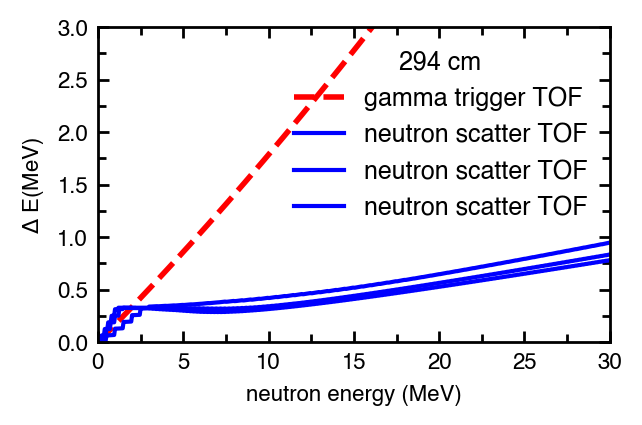

In [138]:
fig = fig_pre_def(6.5,4) #定義圖片大小 default 8*6
ax =fig.add_subplot(1, 1, 1) #畫一張圖的時候用 111

array_show = np.arange(0,len(Ep),5)
ax.plot(E_0_15MeV,delta_E_0_15MeV_150cm,'--r',linewidth =2,label ='gamma trigger TOF')#,label = '3.0 m')

scatter_DeltaE_60=[]
scatter_DeltaE_45=[]
scatter_DeltaE_30=[]
plot_Ep = np.arange(0,30,0.05)
for t in np.arange(0,len(plot_Ep),1):
    scatter_DeltaE_tem_60= ((ret_DeltaE_interploation[int(t/4)])**2+(delta_E_0_15MeV_150cm[int(t*3/4)])**2)**0.5
    scatter_DeltaE_60 = np.append(scatter_DeltaE_60,scatter_DeltaE_tem_60)
    scatter_DeltaE_tem_45= ((ret_DeltaE_interploation[int(t/5)])**2+(delta_E_0_15MeV_150cm[int(t*4/5)])**2)**0.5
    scatter_DeltaE_45 = np.append(scatter_DeltaE_45,scatter_DeltaE_tem_45)
    scatter_DeltaE_tem_30= ((ret_DeltaE_interploation[int(t/10)])**2+(delta_E_0_15MeV_150cm[int(t*9/10)])**2)**0.5
    scatter_DeltaE_30 = np.append(scatter_DeltaE_30,scatter_DeltaE_tem_30)
plt.plot(plot_Ep,scatter_DeltaE_60,'b',label ='neutron scatter TOF')
plt.plot(plot_Ep,scatter_DeltaE_45,'b',label ='neutron scatter TOF')
plt.plot(plot_Ep,scatter_DeltaE_30,'b',label ='neutron scatter TOF')
fig_post_def(xlim=(0,30),xticks=(5,2.5)
             ,ylim=(0,3),yticks=(0.5,0.25)
             ,lg_fs=9
             ,title='294 cm'
             ,xlabel ='neutron energy (MeV)'
             ,ylabel = r'$\Delta$ E(MeV)'#,title=r"energy resolution $\Delta$ E")
)



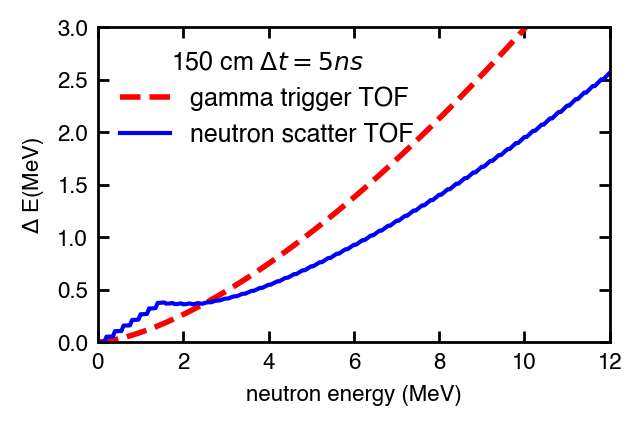

In [ ]:
fig = fig_pre_def(6.5,4) #定義圖片大小 default 8*6
ax =fig.add_subplot(1, 1, 1) #畫一張圖的時候用 111

array_show = np.arange(0,len(Ep),5)
ax.plot(E_0_15MeV,delta_E_0_15MeV_150cm,'--r',linewidth =2,label ='gamma trigger TOF')#,label = '3.0 m')

scatter_DeltaE=[]
plot_Ep = np.arange(0,30,0.05)
for t in np.arange(0,len(plot_Ep),1):
    scatter_DeltaE_temp= ((ret_DeltaE_interploation[int(t/4)])**2+(delta_E_0_15MeV_150cm[int(t*3/4)])**2)**0.5
    scatter_DeltaE = np.append(scatter_DeltaE,scatter_DeltaE_temp)
plt.plot(plot_Ep,scatter_DeltaE,'b',label ='neutron scatter TOF')

fig_post_def(xlim=(0,12)#,xticks=(5,2.5)
             ,ylim=(0,3)#,yticks=(0.5,0.25)
             ,lg_fs=9
             ,title=r'150 cm $\Delta t= 5 ns$'
             ,xlabel ='neutron energy (MeV)'
             ,ylabel = r'$\Delta$ E(MeV)'#,title=r"energy resolution $\Delta$ E")
)



IndexError: index 600 is out of bounds for axis 0 with size 600

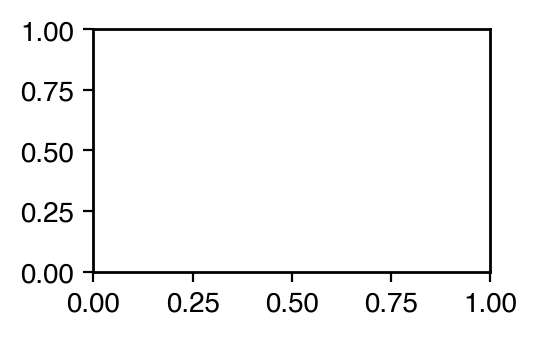

In [ ]:
fig = fig_pre_def(6.5,4) #定義圖片大小 default 8*6
ax =fig.add_subplot(1, 1, 1) #畫一張圖的時候用 111

array_show = np.arange(0,len(LO_Ep),5)
#ax.plot(Ep,LO_Ep)
plt.errorbar(Ep[array_show],LO_Ep[array_show]
             ,xerr= Ep_LO_parematers[array_show,2],elinewidth=0.5)

fig_post_def(xlim=(0,30)#,xticks=(5,2.5)
             ,ylim=(0,20)#,yticks=(0.5,0.25),lg_fs=9
             , xlabel ='recoil proton (MeV)'
             ,ylabel = 'light output(MeVee)'#,title=r"energy resolution $\Delta$ E")
)

fig = fig_pre_def(8,6) #定義圖片大小 default 8*6
ax =fig.add_subplot(1, 1, 1) #畫一張圖的時候用 111
#ax=fig.add_subplot(111, label="1")
ax2=fig.add_subplot(111, label="2", frame_on=False)
ax.plot(E_0_15MeV,delta_E_0_15MeV_153cm,'--r',linewidth =2,label = 'gamma trigger\nTOF')#,label = '3.0 m')
unit=1/2.54
ax.set_xlabel(r'TOF neutron energy $E_n$ (MeV)', color="red")
ax.set_ylabel(r"$\Delta E_n$ (MeV)", color="red")
ax.tick_params(axis='x', colors="black")
ax.tick_params(axis='y', colors="black")
ax.xaxis.set_tick_params(which='major', size=10*unit, width=1, direction='in', top='on')    # x軸主要格線
ax.xaxis.set_tick_params(which='minor', size=7*unit, width=1, direction='in', top='on')     # x軸次要格線
ax.yaxis.set_tick_params(which='major', size=10*unit, width=1, direction='in', right='on')   # y軸主要格線
ax.yaxis.set_tick_params(which='minor', size=7*unit, width=1, direction='in', right='on')   # y軸次要格線
ax.set_xlim(0,12)
ax.set_ylim(0,2.5)
ax.xaxis.set_major_locator(mpl.ticker.MultipleLocator(2))    
ax.xaxis.set_minor_locator(mpl.ticker.MultipleLocator(1))    
ax.yaxis.set_major_locator(mpl.ticker.MultipleLocator(0.5))
ax.yaxis.set_minor_locator(mpl.ticker.MultipleLocator(0.25))
ax.legend(title ='150 cm $\Delta t =1.05\ ns$',loc = 'upper left',frameon=False)

ax2.plot(Ep,ret_DeltaE_interploation,'b',linewidth =2,label = 'recoil proton')
ax2.xaxis.tick_top()
ax2.yaxis.tick_right()
ax2.set_xlabel(r'recoil proton energy $E_p$ (MeV)', color="blue") 
ax2.set_ylabel(r"$\Delta E_p$ (MeV)", color="blue")       
ax2.xaxis.set_label_position('top') 
ax2.yaxis.set_label_position('right') 
ax2.tick_params(axis='x',which = 'both', colors="blue",length=0)
ax2.tick_params(axis='y',which = 'both', colors="blue",length=0)
ax2.legend(loc = 'lower right',frameon=False)

ax2.set_xlim(0,12)
ax2.set_ylim(0,2.5)
ax2.xaxis.set_major_locator(mpl.ticker.MultipleLocator(2))    
ax2.xaxis.set_minor_locator(mpl.ticker.MultipleLocator(1))    
ax2.yaxis.set_major_locator(mpl.ticker.MultipleLocator(0.5))
ax2.yaxis.set_minor_locator(mpl.ticker.MultipleLocator(0.25))

#plt.legend(,frameon=False)
#plt.savefig('/Users/thlin/Dropbox/PhD_thesis_博士論文/Figure/energy_resolution_EpEn_150cm.svg', format="svg")



fig = fig_pre_def(8,6) #定義圖片大小 default 8*6
ax =fig.add_subplot(1, 1, 1) #畫一張圖的時候用 111
#ax=fig.add_subplot(111, label="1")
ax2=fig.add_subplot(111, label="2", frame_on=False)
ax.plot(E_0_15MeV,delta_E_0_15MeV_153cm,'--r',linewidth =2,label = 'gamma trigger\nTOF')#,label = '3.0 m')
unit=1/2.54
ax.set_xlabel(r'TOF neutron energy $E_n$ (MeV)', color="red")
ax.set_ylabel(r"$\Delta E_n$ (MeV)", color="red")
ax.tick_params(axis='x', colors="black")
ax.tick_params(axis='y', colors="black")
ax.xaxis.set_tick_params(which='major', size=10*unit, width=1, direction='in', top='on')    # x軸主要格線
ax.xaxis.set_tick_params(which='minor', size=7*unit, width=1, direction='in', top='on')     # x軸次要格線
ax.yaxis.set_tick_params(which='major', size=10*unit, width=1, direction='in', right='on')   # y軸主要格線
ax.yaxis.set_tick_params(which='minor', size=7*unit, width=1, direction='in', right='on')   # y軸次要格線
ax.set_xlim(0,30)
ax.set_ylim(0,4)
ax.xaxis.set_major_locator(mpl.ticker.MultipleLocator(5))    
ax.xaxis.set_minor_locator(mpl.ticker.MultipleLocator(2.5))    
ax.yaxis.set_major_locator(mpl.ticker.MultipleLocator(0.5))
ax.yaxis.set_minor_locator(mpl.ticker.MultipleLocator(0.25))
ax.legend(loc = 'lower right',frameon=False)

ax2.plot(Ep,ret_DeltaE_interploation,'b',linewidth =2,label = 'recoil proton')
ax2.xaxis.tick_top()
ax2.yaxis.tick_right()
ax2.set_xlabel(r'recoil proton energy $E_p$ (MeV)', color="blue") 
ax2.set_ylabel(r"$\Delta E_p$ (MeV)", color="blue")       
ax2.xaxis.set_label_position('top') 
ax2.yaxis.set_label_position('right') 
ax2.tick_params(axis='x',which = 'both', colors="blue",length=0)
ax2.tick_params(axis='y',which = 'both', colors="blue",length=0)
ax2.legend(title ='150 cm $\Delta t =1.05\ ns$',loc = 'upper left',frameon=False)

ax2.set_xlim(0,30)
ax2.set_ylim(0,4)
ax2.xaxis.set_major_locator(mpl.ticker.MultipleLocator(5))    
ax2.xaxis.set_minor_locator(mpl.ticker.MultipleLocator(2.5))    
ax2.yaxis.set_major_locator(mpl.ticker.MultipleLocator(0.5))
ax2.yaxis.set_minor_locator(mpl.ticker.MultipleLocator(0.25))
#plt.legend(,frameon=False)

#plt.savefig('/Users/thlin/Dropbox/PhD_thesis_博士論文/Figure/energy_resolution_EpEn_150cm.svg', format="svg")



fig = fig_pre_def(6*0.9,4*0.9) #定義圖片大小 default 8*6
ax =fig.add_subplot(1, 1, 1) #畫一張圖的時候用 111
#ax=fig.add_subplot(111, label="1")
ax2=fig.add_subplot(111, label="2", frame_on=False)
ax.plot(E_0_15MeV,delta_E_0_15MeV_153cm,'--r',linewidth =2,label = 'gamma trigger\nTOF')#,label = '3.0 m')
unit=1/2.54
ax.set_xlabel(r'TOF neutron energy $E_n$ (MeV)', color="black")
ax.set_ylabel(r"$\Delta E_n$ (MeV)", color="black")
ax.tick_params(axis='x', colors="black")
ax.tick_params(axis='y', colors="black")
ax.xaxis.set_tick_params(which='major', size=10*unit, width=1, direction='in', top='on')    # x軸主要格線
ax.xaxis.set_tick_params(which='minor', size=7*unit, width=1, direction='in', top='on')     # x軸次要格線
ax.yaxis.set_tick_params(which='major', size=10*unit, width=1, direction='in', right='on')   # y軸主要格線
ax.yaxis.set_tick_params(which='minor', size=7*unit, width=1, direction='in', right='on')   # y軸次要格線
ax.set_xlim(0,30)
ax.set_ylim(0,4)
ax.xaxis.set_major_locator(mpl.ticker.MultipleLocator(5))    
ax.xaxis.set_minor_locator(mpl.ticker.MultipleLocator(2.5))    
ax.yaxis.set_major_locator(mpl.ticker.MultipleLocator(1))
ax.yaxis.set_minor_locator(mpl.ticker.MultipleLocator(0.5))
ax.legend(loc = 'lower right',frameon=False,title_fontsize=7,fontsize=7)

ax2.plot(Ep,ret_DeltaE_interploation,'b',linewidth =2,label = 'recoil proton')
#ax2.xaxis.tick_top()
#ax2.yaxis.tick_right()
#ax2.set_xlabel(r'recoil proton energy $E_p$ (MeV)', color="blue") 
#ax2.set_ylabel(r"$\Delta E_p$ (MeV)", color="blue")       
#ax2.xaxis.set_label_position('top') 
#ax2.yaxis.set_label_position('right') 
ax2.tick_params(axis='x',which = 'both', colors="black",length=0)
ax2.tick_params(axis='y',which = 'both', colors="black",length=0)
ax2.legend(title ='150 cm $\Delta t =1.5\ ns$',loc = 'upper left',frameon=False,title_fontsize=7,fontsize=7)

ax2.set_xlim(0,30)
ax2.set_ylim(0,4)
#ax2.xaxis.set_major_locator(mpl.ticker.MultipleLocator(5))    
#ax2.xaxis.set_minor_locator(mpl.ticker.MultipleLocator(2.5))    
#ax2.yaxis.set_major_locator(mpl.ticker.MultipleLocator(0.5))
#ax2.yaxis.set_minor_locator(mpl.ticker.MultipleLocator(0.25))
#plt.legend(,frameon=False)

#plt.savefig('/Users/thlin/Dropbox/PhD_thesis_博士論文/Figure/energy_resolution_EpEn_150cm.svg', format="svg")



fig = fig_pre_def(7*0.8,3*0.7) #定義圖片大小 default 8*6
ax =fig.add_subplot(1, 1, 1) #畫一張圖的時候用 111

ax.plot(E_0_15MeV,delta_E_0_15MeV_153cm,'--r',linewidth =2,label = 'TOF')#,label = '3.0 m')

scatter_DeltaE=[]
plot_Ep = np.arange(0,30,0.01)
plt.plot(Ep,ret_DeltaE_interploation,'b',linewidth =2,label = 'recoil proton')

#ax2= ax.twinx()
#ax.plot(E_0_15MeV,delta_E_0_15MeV_cm,'--g',linewidth =2,label ='gamma trigger TOF')

fig_post_def(xlim=(0,30),xticks=(5,2.5)
             ,ylim=(0,4),yticks=(1,0.5)
             ,lg_fs=8
             ,title=r'150 cm $\Delta t = 1.5 ns$'
             ,xlabel ='neutron energy (MeV)'
             ,ylabel = r'$\Delta$ E(MeV)'#,title=r"energy resolution $\Delta$ E")
)
#plt.savefig('/Users/thlin/Dropbox/TOF_para.svg', format="svg")


fig = fig_pre_def(8,6) #定義圖片大小 default 8*6
ax =fig.add_subplot(1, 1, 1) #畫一張圖的時候用 111
#ax=fig.add_subplot(111, label="1")
ax2=fig.add_subplot(111, label="2", frame_on=False)
E_0_15MeV= np.arange(0,80,0.05)
delta_E_0_15MeV_300cm = E_resolution_fun_300cm(E_0_15MeV,1.5)

ax.plot(E_0_15MeV,delta_E_0_15MeV_300cm,'--r',linewidth =2,label = 'neutron TOF')#,label = '3.0 m')
unit=1/2.54
ax.set_xlabel(r'TOF neutron energy $E_n$ (MeV)', color="red")
ax.set_ylabel(r"$\Delta E_n$ (MeV)", color="red")
ax.tick_params(axis='x', colors="black")
ax.tick_params(axis='y', colors="black")
ax.xaxis.set_tick_params(which='major', size=10*unit, width=1, direction='in', top='on')    # x軸主要格線
ax.xaxis.set_tick_params(which='minor', size=7*unit, width=1, direction='in', top='on')     # x軸次要格線
ax.yaxis.set_tick_params(which='major', size=10*unit, width=1, direction='in', right='on')   # y軸主要格線
ax.yaxis.set_tick_params(which='minor', size=7*unit, width=1, direction='in', right='on')   # y軸次要格線
ax.set_xlim(0,20)
ax.set_ylim(0,2.5)
ax.xaxis.set_major_locator(mpl.ticker.MultipleLocator(5))    
ax.xaxis.set_minor_locator(mpl.ticker.MultipleLocator(2.5))    
ax.yaxis.set_major_locator(mpl.ticker.MultipleLocator(0.5))
ax.yaxis.set_minor_locator(mpl.ticker.MultipleLocator(0.25))
ax.legend(loc = 'lower right',frameon=False)

ax2.plot(Ep,ret_DeltaE_interploation,'b',linewidth =2,label = 'recoil proton')
ax2.xaxis.tick_top()
ax2.yaxis.tick_right()
ax2.set_xlabel(r'recoil proton energy $E_p$ (MeV)', color="blue") 
ax2.set_ylabel(r"$\Delta E_p$ (MeV)", color="blue")       
ax2.xaxis.set_label_position('top') 
ax2.yaxis.set_label_position('right') 
ax2.tick_params(axis='x',which = 'both', colors="blue",length=0)
ax2.tick_params(axis='y',which = 'both', colors="blue",length=0)


ax2.set_xlim(0,20)
ax2.set_ylim(0,2.5)
ax2.xaxis.set_major_locator(mpl.ticker.MultipleLocator(5))    
ax2.xaxis.set_minor_locator(mpl.ticker.MultipleLocator(2.5))    
ax2.yaxis.set_major_locator(mpl.ticker.MultipleLocator(0.5))
ax2.yaxis.set_minor_locator(mpl.ticker.MultipleLocator(0.25))
plt.legend(title ='300 cm',frameon=False)



def E_resolution_fun_150cm(E,delta_T):
    light_speed = 299792458 # m/s
    neutron_mass = 1.64749*10**-27 #kg
    gamma = 1+(E*(1.6*10**-19)*(10**6)/(neutron_mass*light_speed**2))
    #print(gamma)
    #delta_T = 5 # ns
    TOF = energy_to_time_150cm(E)
    delta_d = 12.7
    
    delta_E = E*gamma*(gamma+1)*((delta_T)**2+((delta_d/100)/energy_to_speed_150cm(E))**2)**0.5/TOF
    return delta_E
def energy_to_time_230cm(E):
    distance = 2.3 # m
    light_speed = 299792458 # m/s
    neutron_mass = 1.64749*10**-27 #kg
    TOF = distance/((2*E*(1.6*10**-19)*(10**6)/neutron_mass)**0.5)*10**9 #ns
    return TOF

def E_resolution_fun_230cm(E,delta_T):
    light_speed = 299792458 # m/s
    neutron_mass = 1.64749*10**-27 #kg
    gamma = 1+(E*(1.6*10**-19)*(10**6)/(neutron_mass*light_speed**2))
    #print(gamma)
    #delta_T = 5 # ns
    TOF = energy_to_time_230cm(E)
    delta_d = 12.7
    delta_E = E*gamma*(gamma+1)*((delta_T)**2+((delta_d/100)/energy_to_speed_150cm(E))**2)**0.5/TOF
    return delta_E

In [ ]:
#A,x0,sigma

FileNotFoundError: [Errno 2] No such file or directory: '/Users/thlin/Dropbox/PhD_thesis_博士論文/Figure/Gamma trigger TOF/test.svg'

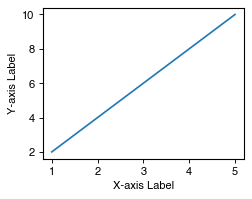

In [ ]:
fig = plt.figure(figsize=(8/2.54, 6/2.54))

# Adjust the subplot parameters to make room for labels
plt.subplots_adjust(left=0.1, right=0.9, bottom=0.1, top=0.9)

# Plot your data
x = [1, 2, 3, 4, 5]
y = [2, 4, 6, 8, 10]
plt.plot(x, y)

# Set labels for x-axis and y-axis
plt.xlabel('X-axis Label')
plt.ylabel('Y-axis Label')
plt.savefig('/Users/thlin/Dropbox/PhD_thesis_博士論文/Figure/Gamma trigger TOF/test.svg', format="svg")
# Show the plot
plt.show()

# Time to energy

In [121]:
# Time to energy
def Time_to_energy(TOF):
    distance = source_to_main_detector+0.0254*1.5 # m
    light_speed = 299792458 # m/s
    neutron_mass = 1.64749*10**-27 #kg
    if type(TOF).__module__ == np.__name__:
        #print(type(TOF))
        if TOF.any()==0:
            return 0
        else:
            beta= distance/(light_speed*TOF*10**-9)
            neutron_energy = neutron_mass* light_speed**2*((1-beta**2)**-0.5-1)*(1.6*10**-19)**-1*(10**-6)
            return neutron_energy
    else:
        beta= distance/(light_speed*TOF*10**-9)
        neutron_energy = neutron_mass* light_speed**2*((1-beta**2)**-0.5-1)*(1.6*10**-19)**-1*(10**-6)
        return neutron_energy

def energy_to_time_3m(E):
    distance = 3 # m
    light_speed = 299792458 # m/s
    neutron_mass = 1.64749*10**-27 #kg
    TOF = distance/((2*E*(1.6*10**-19)*(10**6)/neutron_mass)**0.5)*10**9 #ns
    return TOF

def energy_to_speed(E):
    neutron_mass = 1.64749*10**-27 #kg
    speed = ((2*E*(1.6*10**-19)*(10**6)/neutron_mass)**0.5)/10**9 #ns
    return speed #m

def E_resolution_fun(E):
    light_speed = 299792458 # m/s
    neutron_mass = 1.64749*10**-27 #kg
    gamma = 1+(E*(1.6*10**-19)*(10**6)/(neutron_mass*light_speed**2))
    #print(gamma)
    delta_T = 1 # ns
    TOF = energy_to_time_300(E)
    delta_E = E*gamma*(gamma+1)*(delta_T/TOF)
    return delta_E
    

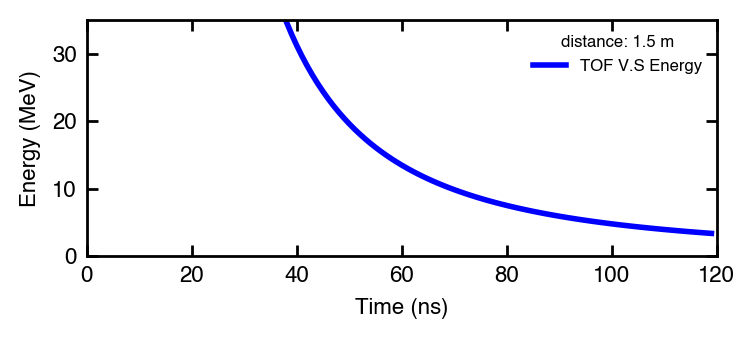

In [122]:
time_along= np.arange(20,120,1)
E_along = Time_to_energy(time_along)

fig = fig_pre_def(8,3) # 定義圖片大小 default 8*6

ax =fig.add_subplot(1, 1, 1) #畫一張圖的時候用 111

#for i in time_along:
#    E_along = np.append(E_along,Time_to_energy(timealong))
ax.plot(time_along,E_along,'b',linewidth =2,label = 'TOF V.S Energy')

fig_post_def(xlim=(0,120),ylim=(0,35), xlabel ='Time (ns)',ylabel = 'Energy (MeV)',title="distance: 1.5 m",svg =True)


In [123]:
# Time to energy
def Time_to_energy_300(TOF):
    distance = 3 # m
    light_speed = 299792458 # m/s
    neutron_mass = 1.64749*10**-27 #kg
    if type(TOF).__module__ == np.__name__:
        #print(type(TOF))
        if TOF.any()==0:
            return 0
        else:
            beta= distance/(light_speed*TOF*10**-9)
            neutron_energy = neutron_mass* light_speed**2*((1-beta**2)**-0.5-1)*(1.6*10**-19)**-1*(10**-6)
            return neutron_energy
    else:
        beta= distance/(light_speed*TOF*10**-9)
        neutron_energy = neutron_mass* light_speed**2*((1-beta**2)**-0.5-1)*(1.6*10**-19)**-1*(10**-6)
        return neutron_energy
def energy_to_time_300(E):
    distance = 3 # m
    light_speed = 299792458 # m/s
    neutron_mass = 1.64749*10**-27 #kg
    TOF = distance/((2*E*(1.6*10**-19)*(10**6)/neutron_mass)**0.5)*10**9 #ns
    return TOF


In [124]:
energy_to_time_300(30)

39.30040553225882

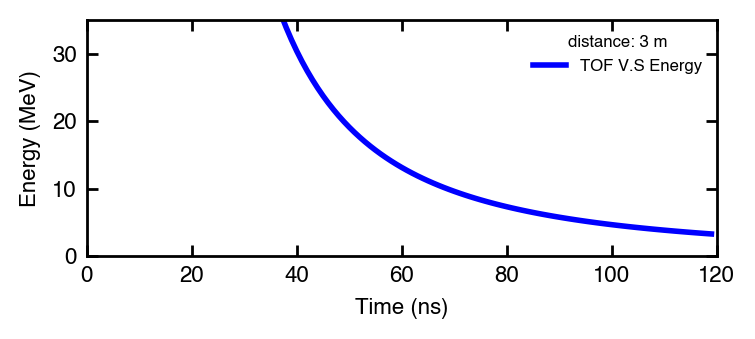

In [125]:
time_along= np.arange(20,120,1)
E_along = Time_to_energy_300(time_along)

fig = fig_pre_def(8,3) # 定義圖片大小 default 8*6

ax =fig.add_subplot(1, 1, 1) #畫一張圖的時候用 111

#for i in time_along:
#    E_along = np.append(E_along,Time_to_energy(timealong))
ax.plot(time_along,E_along,'b',linewidth =2,label = 'TOF V.S Energy')

fig_post_def(xlim=(0,120),ylim=(0,35), xlabel ='Time (ns)',ylabel = 'Energy (MeV)',title="distance: 3 m")


In [126]:
def E_resolution_fun(E):
    light_speed = 299792458 # m/s
    neutron_mass = 1.64749*10**-27 #kg
    gamma = 1+(E*(1.6*10**-19)*(10**6)/(neutron_mass*light_speed**2))
    #print(gamma)
    delta_T = 1 # ns
    TOF = energy_to_time_300(E)
    delta_E = E*gamma*(gamma+1)*(delta_T/TOF)
    return delta_E
    

In [127]:
E_resolution_fun(30)

1.6017413558258564

/var/folders/qd/hhwc9gc95fv6tx8vycl4f3bm0000gn/T/ipykernel_19450/1825154861.py:22: RuntimeWarning: divide by zero encountered in divide
  TOF = distance/((2*E*(1.6*10**-19)*(10**6)/neutron_mass)**0.5)*10**9 #ns


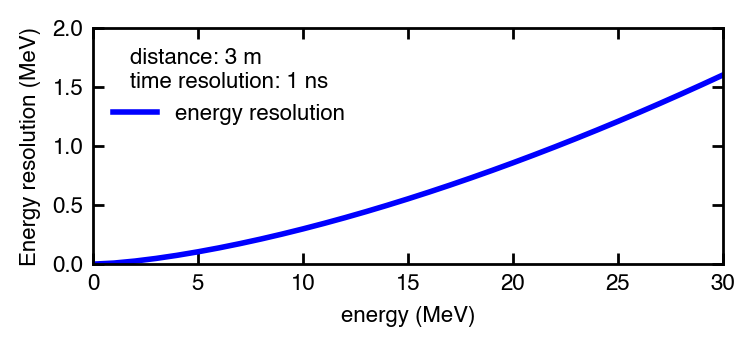

In [128]:
E_along= np.arange(0,31,1)
delta_E_along = E_resolution_fun(E_along)

fig = fig_pre_def(8,3) # 定義圖片大小 default 8*6

ax =fig.add_subplot(1, 1, 1) #畫一張圖的時候用 111

#for i in time_along:
#    E_along = np.append(E_along,Time_to_energy(timealong))
ax.plot(E_along,delta_E_along,'b',linewidth =2,label = 'energy resolution')

fig_post_def(xlim=(0,30),ylim=(0,2), xlabel ='energy (MeV)',ylabel = 'Energy resolution (MeV)'
             ,title="distance: 3 m\ntime resolution: 1 ns",lg_fs=8)


In [129]:
resolution_time =0.002 #ns

proE_data = proT_data.copy()
proE_data['Rec_E'] = Time_to_energy(np.round(proE_data['TOF']/resolution_time)*resolution_time  )

print(proE_data.head())

    time_diff   Rec_PSD   Rec_LO  Tri_Det   Tri_PSD    Tri_LO         TOF  \
4      12.374  0.416290  0.07735      6.0  0.442142  0.225112    6.090882   
11    -27.360  0.404624  0.12110      4.0  0.253653  0.635463  -33.643118   
64    243.875  0.420940  0.16380      4.0  0.393838  0.450587  237.591882   
65    -88.592  0.412088  0.12740      4.0  0.355339  0.833387  -94.875118   
77    176.219  0.401639  0.17080      4.0  0.392555  0.229462  169.935882   

        Rec_E  
4         NaN  
11  45.073265  
64   0.842959  
65   5.324759  
77   1.649933  


# Trigger LO to proton energy 
apply for all but only suitable for Trigger PSD:0.3-0.5

In [162]:
def Light_output_exponential_method(E):
    A=0.62  #0.817
    B=1.3   #2.63
    C=0.39  #0.297
    D=0.97  #1
    LO =A*E-B*(1-np.exp(-1*C*E**D))
    return LO


In [163]:
enegy_range= np.arange(0,30,0.0001)
lightoutput_2inches= Light_output_exponential_method(enegy_range)
print(lightoutput_2inches)

[ 0.00000000e+00 -4.83389860e-06 -6.91372695e-06 ...  1.72998475e+01
  1.72999095e+01  1.72999715e+01]


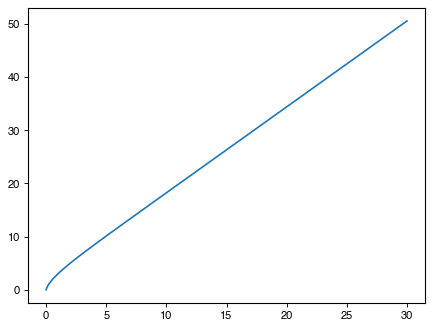

In [164]:
LO_range= np.arange(0,30,0.00001)
P_Energy_inter = interpolation_function(lightoutput_2inches,enegy_range,LO_range)
plt.plot(LO_range,P_Energy_inter)

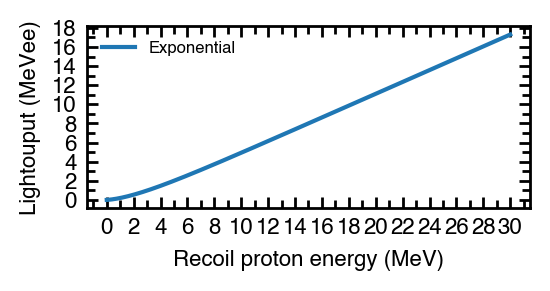

In [165]:
fig = fig_pre_def(16,3) # 定義圖片大小 default 8*6

ax =fig.add_subplot(1, 2, 1) 
ax.plot(enegy_range,lightoutput_2inches,label ='Exponential')
#ax.plot(P_Energy_inter,LO_range)
fig_post_def(xticks=(2,1),yticks=(2,1),ylabel ='Lightouput (MeVee)',xlabel = 'Recoil proton energy (MeV)',onefig=False)


#ax2 =fig.add_subplot(1, 2, 2) 
#ax2.plot(LO_range,P_Energy_inter)
#fig_post_def(xticks=(1,0.5),yticks=(1,0.5),xlabel ='Lightouput (MeVee)',ylabel = 'Recoil proton energy (MeV)',onefig=False)




In [166]:
print(proE_data.head())

    time_diff   Rec_PSD   Rec_LO  Tri_Det   Tri_PSD    Tri_LO         TOF  \
4      12.374  0.416290  0.07735      6.0  0.442142  0.225112    6.090882   
11    -27.360  0.404624  0.12110      4.0  0.253653  0.635463  -33.643118   
64    243.875  0.420940  0.16380      4.0  0.393838  0.450587  237.591882   
65    -88.592  0.412088  0.12740      4.0  0.355339  0.833387  -94.875118   
77    176.219  0.401639  0.17080      4.0  0.392555  0.229462  169.935882   

        Rec_E  
4         NaN  
11  45.073265  
64   0.842959  
65   5.324759  
77   1.649933  


In [167]:
proEE_data = proE_data.copy()
proEE_data["Recoil_p_E"] = proEE_data["Tri_LO"].apply(lambda x:P_Energy_inter[int(x*100000)])
proEE_data["Total_E"] = proEE_data["Rec_E"]+proEE_data["Recoil_p_E"]

print(proEE_data.head())

    time_diff   Rec_PSD   Rec_LO  Tri_Det   Tri_PSD    Tri_LO         TOF  \
4      12.374  0.416290  0.07735      6.0  0.442142  0.225112    6.090882   
11    -27.360  0.404624  0.12110      4.0  0.253653  0.635463  -33.643118   
64    243.875  0.420940  0.16380      4.0  0.393838  0.450587  237.591882   
65    -88.592  0.412088  0.12740      4.0  0.355339  0.833387  -94.875118   
77    176.219  0.401639  0.17080      4.0  0.392555  0.229462  169.935882   

        Rec_E  Recoil_p_E    Total_E  
4         NaN    1.085182        NaN  
11  45.073265    2.221982  47.295248  
64   0.842959    1.752990   2.595949  
65   5.324759    2.681197   8.005956  
77   1.649933    1.099716   2.749649  


In [168]:
rec_eff = np.loadtxt('20220211_efficiency.txt')
scatter_eff=np.loadtxt("Deg60_TOF_effciency_threshold.txt")
#scatter_eff=np.loadtxt("../Neutron_scatter_exp_simulation/TOF_effciency_threshold.txt")



<Figure size 629.921x472.441 with 0 Axes>

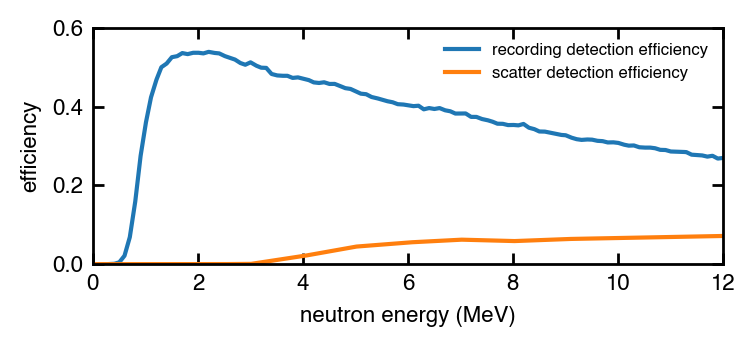

In [187]:
fig_pre_def()

fig = fig_pre_def(8,3) # 定義圖片大小 default 8*6
ax =fig.add_subplot(1, 1, 1) 

interpoplation_axis= np.arange(0,30,0.001) # unit 0.0001 # times 10000

interpolation_func  = interp1d(rec_eff[:,0],rec_eff[:,1],fill_value="extrapolate") 
rec_eff_inter = interpolation_func(interpoplation_axis)

interpolation_func  = interp1d(scatter_eff[:,0],scatter_eff[:,1]/10000,fill_value="extrapolate") 
scatter_eff_inter = interpolation_func(interpoplation_axis)
plt.plot(interpoplation_axis,rec_eff_inter,'-',label = 'recording detection efficiency')
plt.plot(interpoplation_axis,scatter_eff_inter,'-',label = 'scatter detection efficiency')

fig_post_def(xlim=(0,12),ylim=(0,0.6),xlabel='neutron energy (MeV)',ylabel='efficiency')

# Neutron scatter: set time window and trigger PSD 

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


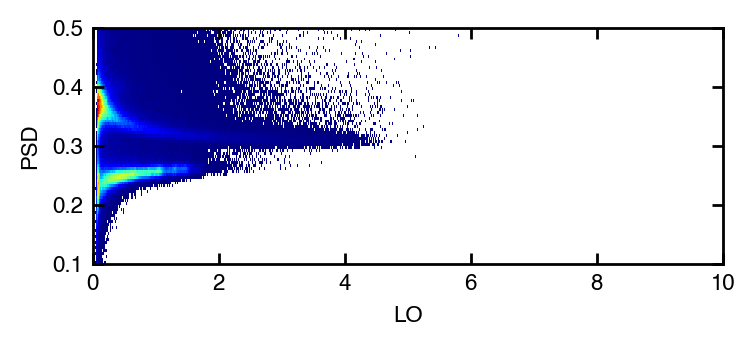

In [188]:
fig = fig_pre_def(8,3)# 圖片大小
ax = fig.add_subplot(1, 1, 1) 

plt.hist2d(proT_data_all['Tri_LO'],proT_data_all['Tri_PSD'], bins=(400, 100),cmin=1, cmap=plt.cm.jet)

fig_post_def(xlim =(0,10),ylim = (0.1,0.5),xlabel = 'LO',ylabel = 'PSD')


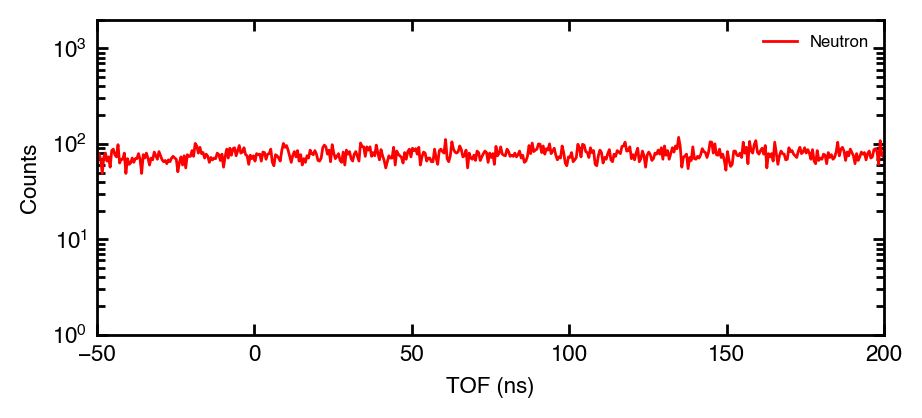

In [196]:
fig = fig_pre_def(10,4)# 圖片大小
ax = fig.add_subplot(1, 1, 1) 

plt.plot(bin_center,hist_neutron,'r' ,linewidth=1,label ='Neutron')
fig_post_def(xlim =(-50,200),ylim = (1,2000),xlabel = 'TOF (ns)',ylabel = 'Counts')
#plt.xlim(-20,200)
plt.ylim(1,)
plt.yscale('log')

In [197]:
mask_TOF_upper  = proEE_data['TOF'] < 140
mask_TOF_lower  = proEE_data['TOF'] > 35
mask_Tri_n_PSD_upper  = proEE_data['Tri_PSD'] < 0.6
mask_Tri_n_PSD_lower  = proEE_data['Tri_PSD'] > 0.3
mask_TotalE_upper  = proEE_data['Total_E'] < 30
proEEW_data = proEE_data[(mask_TOF_upper 
                        & mask_TOF_lower 
                        & mask_TotalE_upper
                        & mask_Tri_n_PSD_lower
                        & mask_Tri_n_PSD_upper)]
print(proEEW_data.head())

     time_diff   Rec_PSD   Rec_LO  Tri_Det   Tri_PSD    Tri_LO         TOF  \
86      55.719  0.404192  0.11690      4.0  0.374702  0.167112   49.435882   
146     69.571  0.409856  0.29120      6.0  0.359649  0.180525   63.287882   
233     97.305  0.432099  0.05670      4.0  0.339139  0.369025   91.021882   
279    116.672  0.407895  0.10640      6.0  0.342618  0.145362  110.388882   
282    125.929  0.402071  0.40565      4.0  0.335294  0.076850  119.645882   

         Rec_E  Recoil_p_E    Total_E  
86   20.079302    0.881407  20.960709  
146  12.097218    0.930364  13.027582  
233   5.789550    1.527636   7.317186  
279   3.924542    0.799133   4.723675  
282   3.337529    0.507356   3.844885  


In [198]:
proEEWeff_data = proEEW_data.copy()

proEEWeff_data["Rec_eff"]     = proEEW_data["Rec_E"].apply(lambda x:rec_eff_inter[int(x*1000)])
proEEWeff_data["scatter_eff"] = proEEW_data["Total_E"].apply(lambda x:scatter_eff_inter[int(x*1000)])
proEEWeff_data["angle"] = np.rad2deg(np.arctan((proEE_data["Recoil_p_E"]/proEE_data["Rec_E"])**0.5))
print(proEEWeff_data.head())

     time_diff   Rec_PSD   Rec_LO  Tri_Det   Tri_PSD    Tri_LO         TOF  \
86      55.719  0.404192  0.11690      4.0  0.374702  0.167112   49.435882   
146     69.571  0.409856  0.29120      6.0  0.359649  0.180525   63.287882   
233     97.305  0.432099  0.05670      4.0  0.339139  0.369025   91.021882   
279    116.672  0.407895  0.10640      6.0  0.342618  0.145362  110.388882   
282    125.929  0.402071  0.40565      4.0  0.335294  0.076850  119.645882   

         Rec_E  Recoil_p_E    Total_E   Rec_eff  scatter_eff      angle  
86   20.079302    0.881407  20.960709  0.157971     0.094896  11.833131  
146  12.097218    0.930364  13.027582  0.267263     0.074270  15.499847  
233   5.789550    1.527636   7.317186  0.407002     0.061095  27.188382  
279   3.924542    0.799133   4.723675  0.473815     0.037852  24.287169  
282   3.337529    0.507356   3.844885  0.492947     0.017380  21.300393  


In [199]:
ISO_spectrum = np.loadtxt('../../../../data/AmBe_Neutron_spectrum/ISO8529-2.txt')
Lorch_1973 = np.loadtxt('../../../../data/AmBe_Neutron_spectrum/Lorch_1973.txt')
Scherzinger_2017 = np.loadtxt('../../../../data/AmBe_Neutron_spectrum/Scherzinger_2017.txt')
Scherzinger_2015 = np.loadtxt('../../../../data/AmBe_Neutron_spectrum/Scherzinger_2015.txt')

FileNotFoundError: ../../../../data/AmBe_Neutron_spectrum/ISO8529-2.txt not found.

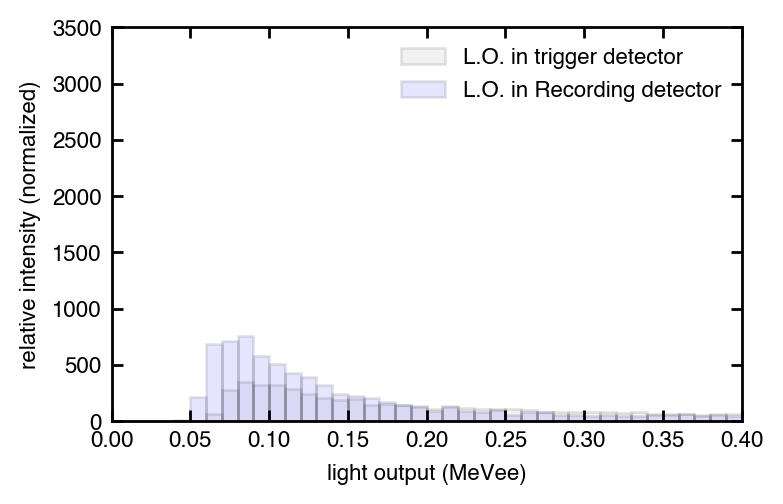

In [200]:
fig = fig_pre_def(8,5) # 定義圖片大小 default 8*6
ax =fig.add_subplot(1, 1, 1) 

y_tri = plt.hist(proEEWeff_data['Tri_LO'],1000,range=(0,10),color="gray",alpha=0.1,edgecolor = "k",label='L.O. in trigger detector')
y_rec = plt.hist(proEEWeff_data['Rec_LO'],1000,range=(0,10),color="blue",alpha=0.1,edgecolor = "k",label='L.O. in Recording detector')

#plt.xlim(0.0,0.4)

fig_post_def(xlim=(0,0.4),ylim=(0,3500)
            #,xticks=(1,0.5),yticks=(0.2,0.1)
            ,lg_fs=8
            ,lb_fs=8
            ,xlabel='light output (MeVee)'
            ,ylabel='relative intensity (normalized)'
            #,title='without effeciency calibration'
            )

In [205]:
mask_rec_threshold = proEEWeff_data["Rec_LO"]>0.1
mask_tri_threshold = proEEWeff_data["Tri_LO"]>0.1

mask_angle_lower = proEEWeff_data["angle"]>45
mask_angle_upper = proEEWeff_data["angle"]<75
proEEWeffTh_data = proEEWeff_data[(mask_rec_threshold
                                    & mask_tri_threshold
                                    #& mask_angle_lower
                                    #& mask_angle_upper
                                    )]


In [206]:
Neutron_energy_lower = 0 # 0 MeV
Neutron_energy_upper = 30 # 10 MeV
Binning = 150 # cut to 100 pieces
Neutron_E_axis, Neutron_E_y = sorting(
    proEEWeffTh_data['Total_E'], Binning , Neutron_energy_lower, Neutron_energy_upper)

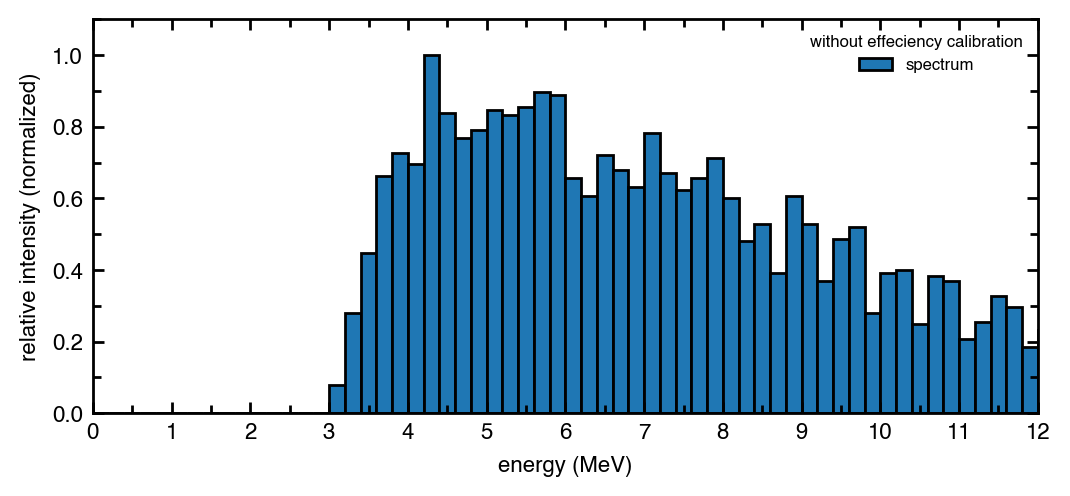

In [207]:

fig = fig_pre_def(12,5) # 定義圖片大小 default 8*6
ax =fig.add_subplot(1, 1, 1) 


ax.bar(Neutron_E_axis, Neutron_E_y/Neutron_E_y.max(),width=0.2,edgecolor = "k",label= 'spectrum')
#plt.plot(ISO_spectrum[:,0],ISO_spectrum[:,1]/ISO_spectrum[:,1].max(),'o-r',label='ISO 8529-2 (2000)')
#plt.plot(Scherzinger_2017[:,0],Scherzinger_2017[:,1]/Scherzinger_2017[:,1].max(),'o-g',label='Scherzinger (2017)')
#plt.plot(Scherzinger_2015[:,0],Scherzinger_2015[:,1]/Scherzinger_2015[:,1].max(),'o-',label='Scherzinger (2015)')
#plt.plot(Lorch_1973[:,0],Lorch_1973[:,1]/Lorch_1973[:,1].max(),'o-',label='Lorch (1973)')


ax.set_xlabel("Energy (MeV)",fontsize=18)
ax.set_ylabel("Counts",fontsize=18)
fig_post_def(xlim=(0,12),ylim=(0,1.1),xticks=(1,0.5),yticks=(0.2,0.1),xlabel='energy (MeV)',ylabel='relative intensity (normalized)'
            ,title='without effeciency calibration')
#plt.legend(fontsize=18)


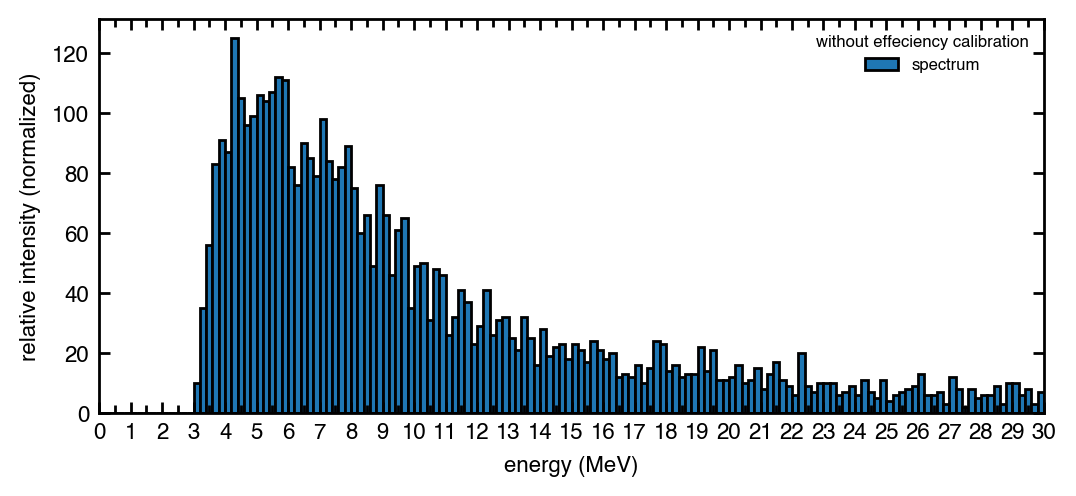

In [208]:

fig = fig_pre_def(12,5) # 定義圖片大小 default 8*6
ax =fig.add_subplot(1, 1, 1) 


ax.bar(Neutron_E_axis, Neutron_E_y,width=0.2,edgecolor = "k",label= 'spectrum')
#plt.plot(ISO_spectrum[:,0],ISO_spectrum[:,1]/ISO_spectrum[:,1].max(),'o-r',label='ISO 8529-2 (2000)')
#plt.plot(Scherzinger_2017[:,0],Scherzinger_2017[:,1]/Scherzinger_2017[:,1].max(),'o-g',label='Scherzinger (2017)')
#plt.plot(Scherzinger_2015[:,0],Scherzinger_2015[:,1]/Scherzinger_2015[:,1].max(),'o-',label='Scherzinger (2015)')
#plt.plot(Lorch_1973[:,0],Lorch_1973[:,1]/Lorch_1973[:,1].max(),'o-',label='Lorch (1973)')


ax.set_xlabel("Energy (MeV)",fontsize=18)
ax.set_ylabel("Counts",fontsize=18)
fig_post_def(xlim=(0,30),xticks=(1,0.5)
             #,ylim=(0,1.1),yticks=(0.2,0.1)
             ,xlabel='energy (MeV)',ylabel='relative intensity (normalized)'
            ,title='without effeciency calibration')
#plt.legend(fontsize=18)




In [154]:
#flat_efficiency = np.loadtxt('../Neutron_scatter_exp_simulation/flat_specturm_efficiency.txt')
Deg60_efficiency = np.loadtxt('../Neutron_scatter_exp_simulation/Deg60_TOF_effciency_threshold.txt')



FileNotFoundError: ../Neutron_scatter_exp_simulation/Deg60_TOF_effciency_threshold.txt not found.

In [155]:
Deg60_efficiency_y = interpolation_function(Deg60_efficiency[:,0],Deg60_efficiency[:,1],Neutron_E_axis)
plt.plot(Neutron_E_axis,Deg60_efficiency_y,'.')


NameError: name 'Deg60_efficiency' is not defined

In [156]:
eff_corrected_spectrum =np.zeros(len(Neutron_E_axis))
for i in np.arange(0, len(eff_corrected_spectrum),1):
    if ((Deg60_efficiency_y[i] ==0) or (Neutron_E_axis[i] <=4.5)):
        eff_corrected_spectrum[i]=0
    else:
        eff_corrected_spectrum[i] = Neutron_E_y[i]/Deg60_efficiency_y[i]
plt.plot(Neutron_E_axis,eff_corrected_spectrum)

NameError: name 'Deg60_efficiency_y' is not defined

In [49]:
calibrated_spectrum = Neutron_E_y[0:50]/flat_efficiency[0:50]

NameError: name 'flat_efficiency' is not defined

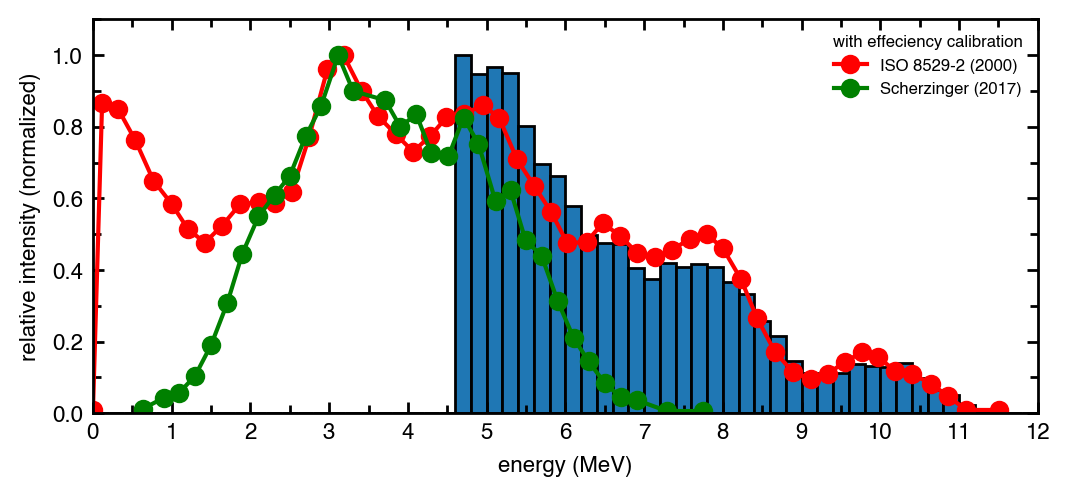

In [50]:

fig = fig_pre_def(12,5) # 定義圖片大小 default 8*6
ax =fig.add_subplot(1, 1, 1) 


#ax.bar(Neutron_E_axis[0:50], 0.85*(calibrated_spectrum)/np.max(calibrated_spectrum),width=0.2,edgecolor = "k",label= 'spectrum')
plt.plot(ISO_spectrum[:,0],ISO_spectrum[:,1]/ISO_spectrum[:,1].max(),'o-r',label='ISO 8529-2 (2000)')
plt.plot(Scherzinger_2017[:,0],Scherzinger_2017[:,1]/Scherzinger_2017[:,1].max(),'o-g',label='Scherzinger (2017)')
#plt.plot(Scherzinger_2015[:,0],Scherzinger_2015[:,1]/Scherzinger_2015[:,1].max(),'o-',label='Scherzinger (2015)')
#plt.plot(Lorch_1973[:,0],Lorch_1973[:,1]/Lorch_1973[:,1].max(),'o-',label='Lorch (1973)')

ax.bar(Neutron_E_axis,eff_corrected_spectrum/eff_corrected_spectrum.max(),width=0.2,edgecolor = "k")
ax.set_xlabel("Energy (MeV)",fontsize=18)
ax.set_ylabel("Counts",fontsize=18)
fig_post_def(xlim=(0,12),ylim=(0,1.1),xticks=(1,0.5),yticks=(0.2,0.1),xlabel='energy (MeV)',ylabel='relative intensity (normalized)'
            ,title='with effeciency calibration')
#plt.legend(fontsize=18)




In [51]:
output_N_scatter = Neutron_E_axis[:,np.newaxis]
output_N_scatter = np.column_stack((output_N_scatter,Neutron_E_y[:,np.newaxis]))
np.savetxt("Deg60_N_scatter_20221113.txt",output_N_scatter)

# consider the angle 

In [52]:
mask_rec_threshold2 = proEEWeff_data["Rec_LO"]>0.2
mask_tri_threshold2 = proEEWeff_data["Tri_LO"]>0.4
mask_angle_lower = proEEWeff_data["angle"]>0
mask_angle_upper = proEEWeff_data["angle"]<90
proEEWeffTh_data2 = proEEWeff_data[(mask_rec_threshold2
                                    & mask_tri_threshold2
                                    & mask_angle_lower
                                    & mask_angle_upper
                                    )]
proEEWeffTh2_data = proEEWeff_data[(mask_rec_threshold2&mask_tri_threshold2)]

In [53]:
#print(proEEWeffTh2_data)

In [54]:
Neutron_energy_lower = 0 # 0 MeV
Neutron_energy_upper = 12 # 10 MeV
Binning = 60 # cut to 100 pieces
Neutron_E_axis, Neutron_E_y = sorting(
    proEEWeffTh_data2['Total_E'], Binning , Neutron_energy_lower, Neutron_energy_upper)

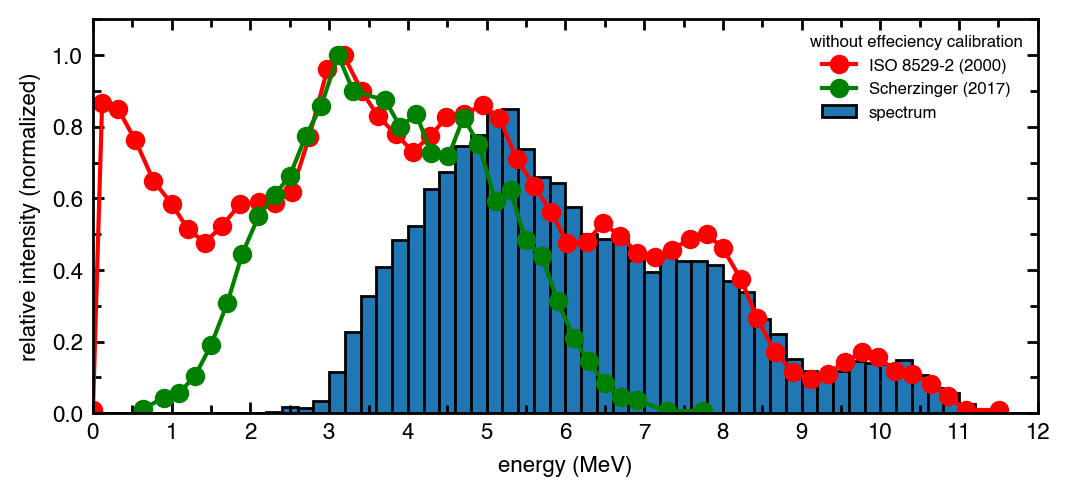

In [55]:

fig = fig_pre_def(12,5) # 定義圖片大小 default 8*6
ax =fig.add_subplot(1, 1, 1) 


ax.bar(Neutron_E_axis, 0.85*Neutron_E_y/Neutron_E_y.max(),width=0.2,edgecolor = "k",label= 'spectrum')
plt.plot(ISO_spectrum[:,0],ISO_spectrum[:,1]/ISO_spectrum[:,1].max(),'o-r',label='ISO 8529-2 (2000)')
plt.plot(Scherzinger_2017[:,0],Scherzinger_2017[:,1]/Scherzinger_2017[:,1].max(),'o-g',label='Scherzinger (2017)')
#plt.plot(Scherzinger_2015[:,0],Scherzinger_2015[:,1]/Scherzinger_2015[:,1].max(),'o-',label='Scherzinger (2015)')
#plt.plot(Lorch_1973[:,0],Lorch_1973[:,1]/Lorch_1973[:,1].max(),'o-',label='Lorch (1973)')


ax.set_xlabel("Energy (MeV)",fontsize=18)
ax.set_ylabel("Counts",fontsize=18)
fig_post_def(xlim=(0,12),ylim=(0,1.1),xticks=(1,0.5),yticks=(0.2,0.1),xlabel='energy (MeV)',ylabel='relative intensity (normalized)'
            ,title='without effeciency calibration')
#plt.legend(fontsize=18)




In [56]:
bin_width=0.2
spectrum_x_s = np.arange(0,20,bin_width)
spectrum_hist_s = np.zeros(len(spectrum_x_s))
for i in np.arange(0,len(proEEWeffTh2_data['Total_E']),1):
    if ((proEEWeffTh2_data.iloc[[i],[11]].values > 0)&(proEEWeffTh2_data.iloc[[i],[10]].values>0)):
        spectrum_hist_s[int(np.round((proEEWeffTh2_data.iloc[[i],[9]].values*(bin_width**-1)),0))] += ((proEEWeffTh2_data.iloc[[i],[11]].values)**-1)*(proEEWeffTh2_data.iloc[[i],[10]].values**-1)


Text(0, 0.5, 'Counts')

<Figure size 629.921x472.441 with 0 Axes>

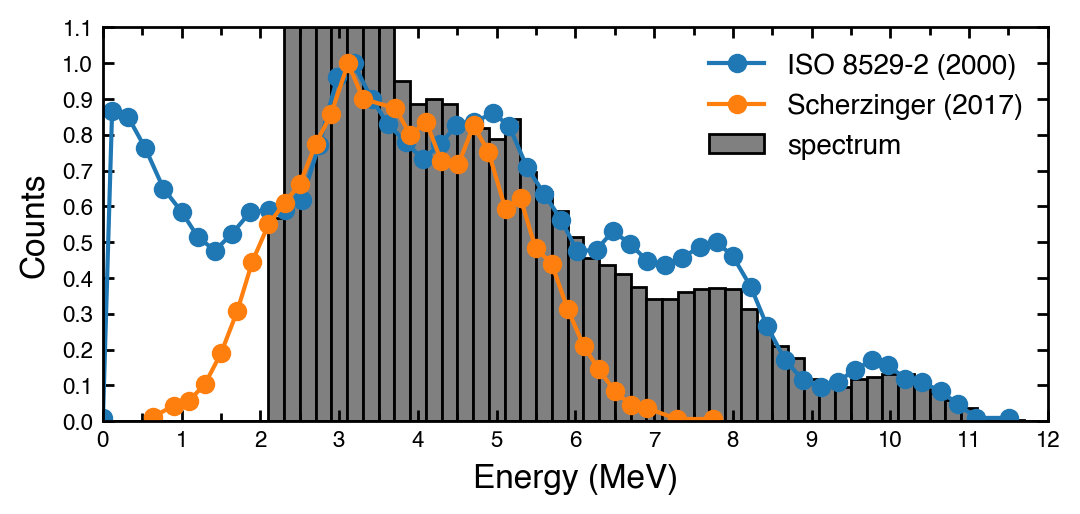

In [57]:

fig_pre_def()

fig = fig_pre_def(12,5) # 定義圖片大小 default 8*6
ax =fig.add_subplot(1, 1, 1) 


ax.bar(0+spectrum_x_s, 0.9*spectrum_hist_s/spectrum_hist_s[20:].max(),width=bin_width,color="gray",edgecolor = "k",label= 'spectrum')
plt.plot(ISO_spectrum[:,0],ISO_spectrum[:,1]/ISO_spectrum[:,1].max(),'o-',label='ISO 8529-2 (2000)')
plt.plot(Scherzinger_2017[:,0],Scherzinger_2017[:,1]/Scherzinger_2017[:,1].max(),'o-',label='Scherzinger (2017)')

fig_post_def(xlim=(0,12),ylim=(0,1.1),lg_fs=10,xticks=(1,0.5),yticks=(0.1,0.5),xlabel='energy (MeV)',ylabel='relative intensity (normalized)')
#plt.legend(fontsize=18)
ax.set_xlabel("Energy (MeV)",fontsize=12)
ax.set_ylabel("Counts",fontsize=12)



In [58]:
proEEWeff_data_high_E_LLD_mask = proEEWeff_data['Total_E']>4.8
proEEWeff_data_high_E_ULD_mask = proEEWeff_data['Total_E']<5.2
proEEWeff_data_high_E = proEEWeff_data[(proEEWeff_data_high_E_LLD_mask&proEEWeff_data_high_E_ULD_mask)]

(array([[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan,  1.,  1.],
        ...,
        [ 1.,  2.,  1., ..., nan, nan, nan],
        [nan, nan,  1., ..., nan, nan, nan],
        [ 1.,  2., nan, ..., nan, nan, nan]]),
 array([0.40793026, 0.42860028, 0.44927029, 0.46994031, 0.49061033,
        0.51128035, 0.53195037, 0.55262039, 0.57329041, 0.59396042,
        0.61463044, 0.63530046, 0.65597048, 0.6766405 , 0.69731052,
        0.71798054, 0.73865055, 0.75932057, 0.77999059, 0.80066061,
        0.82133063, 0.84200065, 0.86267067, 0.88334068, 0.9040107 ,
        0.92468072, 0.94535074, 0.96602076, 0.98669078, 1.00736079,
        1.02803081, 1.04870083, 1.06937085, 1.09004087, 1.11071089,
        1.13138091, 1.15205092, 1.17272094, 1.19339096, 1.21406098,
        1.234731  , 1.25540102, 1.27607104, 1.29674105, 1.31741107,
        1.33808109, 1.35875111, 1.37942113, 1.40009115, 1.42076117,
        1.44143118, 1.4621012 , 1.4

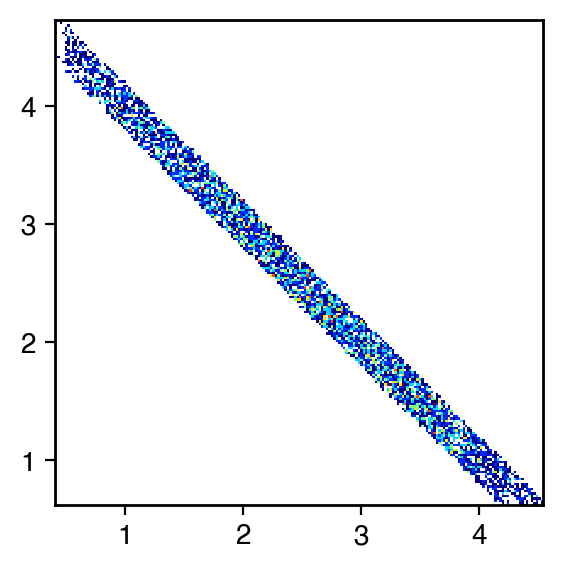

In [59]:
fig = fig_pre_def(8,8,1)# 圖片大小
ax = fig.add_subplot(1, 1, 1)  

plt.hist2d(proEEWeff_data_high_E['Recoil_p_E'],proEEWeff_data_high_E['Rec_E'], bins=(200, 200),cmin=1, cmap=plt.cm.jet)


<Figure size 629.921x472.441 with 0 Axes>

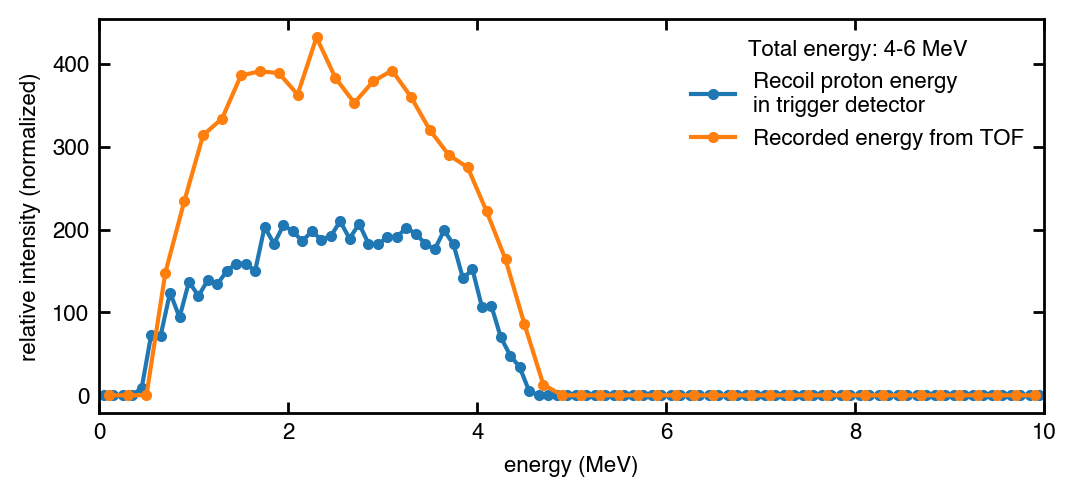

In [60]:

fig_pre_def()

fig = fig_pre_def(12,5) # 定義圖片大小 default 8*6
ax =fig.add_subplot(1, 1, 1) 


bin_high_E, hist_high_E_Recoil_p_E  = sorting(proEEWeff_data_high_E['Recoil_p_E'],100,0,10)

plt.plot(bin_high_E, hist_high_E_Recoil_p_E,'.-',label='Recoil proton energy\nin trigger detector')

bin_high_E, hist_high_E_Rec_E  = sorting(proEEWeff_data_high_E['Rec_E'],50,0,10)

plt.plot(bin_high_E, hist_high_E_Rec_E,'.-',label='Recorded energy from TOF')


fig_post_def(xlim=(0,10)
            #,ylim=(0,225)
            ,lg_fs=8
            ,title='Total energy: 4-6 MeV'
            #,xticks=(1,0.5),yticks=(0.1,0.5)
            ,xlabel='energy (MeV)',ylabel='relative intensity (normalized)')
#plt.legend(fontsize=18)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


<Figure size 629.921x472.441 with 0 Axes>

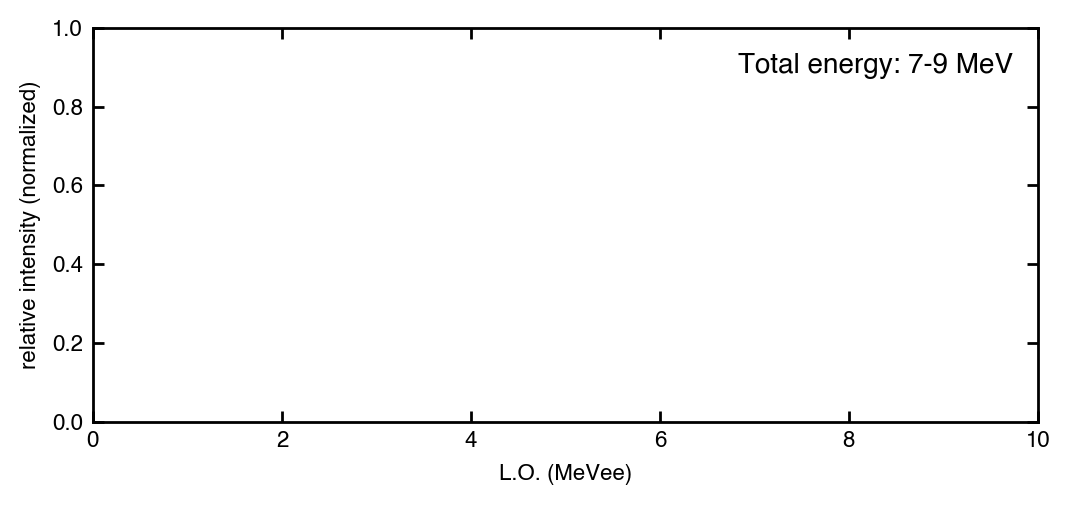

In [61]:

fig_pre_def()

fig = fig_pre_def(12,5) # 定義圖片大小 default 8*6
ax =fig.add_subplot(1, 1, 1) 




fig_post_def(xlim=(0,10)
            #,ylim=(0,225)
            ,lg_fs=10
            ,title='Total energy: 7-9 MeV'
            #,xticks=(1,0.5),yticks=(0.1,0.5)
            ,xlabel='L.O. (MeVee)',ylabel='relative intensity (normalized)')
#plt.legend(fontsize=18)

In [62]:
bin_width=0.2
spectrum_x = np.arange(0,20,bin_width)
spectrum_hist = np.zeros(len(spectrum_x))

In [63]:
spectrum_hist = np.zeros(len(spectrum_x))
for i in np.arange(0,len(proEEWeffTh2_data['Total_E']),1):
    if ((proEEWeffTh2_data.iloc[[i],[10]].values > 0) and (proEEWeffTh2_data.iloc[[i],[11]].values >0)):
        spectrum_hist[int(np.round((proEEWeffTh2_data.iloc[[i],[9]].values*(bin_width**-1)),0))] += (proEEWeffTh2_data.iloc[[i],[10]].values*proEEWeffTh2_data.iloc[[i],[11]].values)**-1


Text(0, 0.5, 'Counts')

<Figure size 629.921x472.441 with 0 Axes>

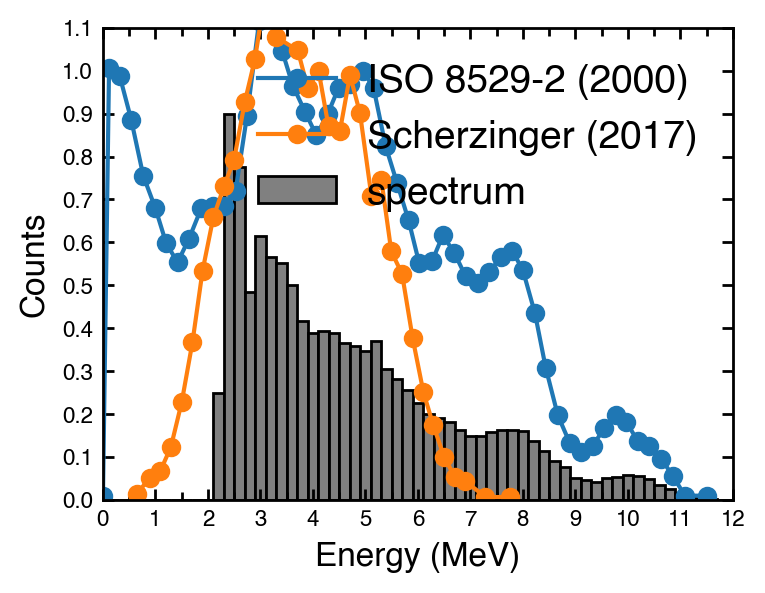

In [64]:

fig_pre_def()

fig = fig_pre_def(8,6) # 定義圖片大小 default 8*6
ax =fig.add_subplot(1, 1, 1) 

#plt.plot(spectrum_x,1*spectrum_hist/spectrum_hist.max(),'o-')
ax.bar(0+spectrum_x, 0.9*spectrum_hist/spectrum_hist.max(),width=bin_width,color="gray",edgecolor = "k",label= 'spectrum')
plt.plot(ISO_spectrum[:,0],ISO_spectrum[:,1]/ISO_spectrum[20:,1].max(),'o-',label='ISO 8529-2 (2000)')
plt.plot(Scherzinger_2017[:,0],Scherzinger_2017[:,1]/Scherzinger_2017[15:,1].max(),'o-',label='Scherzinger (2017)')
#plt.plot(Scherzinger_2015[:,0],Scherzinger_2015[:,1]/Scherzinger_2015[:,1].max(),'o-',label='Scherzinger (2015)')
#plt.plot(Lorch_1973[:,0],Lorch_1973[:,1]/Lorch_1973[:,1].max(),'o-',label='Lorch (1973)')

fig_post_def(xlim=(0,12),ylim=(0,1.1),lg_fs=14,xticks=(1,0.5),yticks=(0.1,0.5),xlabel='energy (MeV)',ylabel='relative intensity (normalized)')
#plt.legend(fontsize=18)
ax.set_xlabel("Energy (MeV)",fontsize=12)
ax.set_ylabel("Counts",fontsize=12)



In [65]:
proEEWeffTh3_data = proEEWeffTh2_data.copy()
proEEWeffTh3_data["angle"] = np.rad2deg(np.arctan((proEEWeffTh3_data["Recoil_p_E"]/proEEWeffTh3_data["Rec_E"])**0.5))
#proEEWeffTh3_data["angle2"] = np.rad2deg(np.arcsin((proEEWeffTh3_data["Recoil_p_E"]/proEEWeffTh3_data["Total_E"])**0.5))
print(proEEWeffTh3_data.head())


     time_diff   Rec_PSD   Rec_LO  Tri_Det   Tri_PSD    Tri_LO        TOF  \
14      58.798  0.410759  0.83930      4.0  0.370525  0.794963  53.706902   
49      76.139  0.408685  0.58835      4.0  0.366350  0.816712  71.047902   
80      70.736  0.400804  0.69685      4.0  0.342867  2.043050  65.644902   
118     69.203  0.449675  0.43120      4.0  0.371324  1.099825  64.111902   
303     60.063  0.425287  0.45675      4.0  0.355076  0.854413  54.971902   

        Rec_E  Recoil_p_E   Total_E   Rec_eff  scatter_eff      angle  
14   4.252841    2.594692  6.847533  0.460917     0.077613  37.993185  
49   2.425661    2.643801  5.069462  0.534012     0.063949  46.233104  
80   2.843363    5.073533  7.916895  0.509210     0.074744  53.180774  
118  2.978645    3.254887  6.233532  0.511388     0.074051  46.269964  
303  4.052866    2.728084  6.780950  0.469761     0.077224  39.366881  


# gamma trigger

In [38]:
print(pro_data_all.head())

mask_Rec_LO           = pro_data_all['Rec_LO']<16000*Rec_Ch_To_LO
mask_Rec_PSD_upper    = pro_data_all['Rec_PSD'] < 0.5
mask_Rec_PSD_lower    = pro_data_all['Rec_PSD'] > 0.3
mask_Tri_g_PSD_upper  = pro_data_all['Tri_PSD'] < 0.3
mask_Tri_g_PSD_lower  = pro_data_all['Tri_PSD'] > 0


# trigger by the gamma at the trigger detector
pro_g_data_delay = pro_data_all[(mask_Rec_LO 
                        &mask_Tri_g_PSD_upper
                        &mask_Tri_g_PSD_lower)]


   time_diff   Rec_PSD   Rec_LO  Tri_Det   Tri_PSD    Tri_LO
0      0.000  0.000000  0.00000      0.0  0.000000  0.015225
1      9.531  0.217507  0.13195      6.0  0.274565  1.682725
2     52.000  0.264673  0.31605      6.0  0.190476  0.045675
3    -19.812  0.248908  0.08015      6.0  0.253333  0.042412
4    -19.063  0.281818  0.03850      6.0  0.155172  0.036250


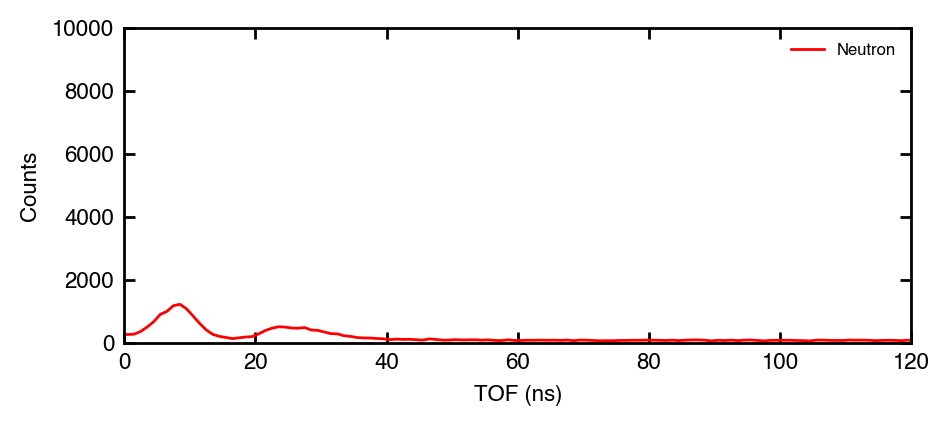

In [40]:
bin_center,hist_gamma = sorting(pro_g_data_delay['time_diff'],200,0,200)
fig = fig_pre_def(10,4)# 圖片大小
ax = fig.add_subplot(1, 1, 1) 

plt.plot(bin_center,hist_gamma,'r' ,linewidth=1,label ='Neutron')
fig_post_def(xlim =(0,120),ylim = (0,10000),xlabel = 'TOF (ns)',ylabel = 'Counts')
#plt.xlim(-20,200)
#plt.ylim(0,5500)
#plt.yscale('log')

In [41]:
g_max_position = np.argmax(hist_gamma[0:1000])
g_measured_gamma_time_diff= bin_center[g_max_position]
print('measured gamma different time: ',g_measured_gamma_time_diff,' ns')

measured gamma different time:  8.5  ns


In [42]:
light_speed = 299792468 #m/s
nano_second = 10**(-9)  #s
g_experimental_gamma_different= ((+1.5*0.0254-0.04)/light_speed)/nano_second
print(g_experimental_gamma_different)

5.158902124252167


In [43]:
g_system_delay = g_measured_gamma_time_diff - g_experimental_gamma_different
print('system_delay  ',g_system_delay, '  ns')

#g_system_delay = 4.74653

system_delay   3.341097875747833   ns


In [44]:
light_speed = 299792468 #m/s
nano_second = 10**(-9)  #s
gamma_to_trigger= ((0.04)/light_speed)/nano_second
print(gamma_to_trigger)

0.13342563362866075


In [137]:
pro_g_data = pro_data_all[(mask_Rec_LO 
                        &mask_Rec_PSD_upper
                        &mask_Rec_PSD_lower
                        &mask_Tri_g_PSD_upper
                        &mask_Tri_g_PSD_lower)]
print(pro_g_data.head())

    time_diff   Rec_PSD   Rec_LO  Tri_Det   Tri_PSD    Tri_LO
17    147.092  0.314394  0.09240      4.0  0.274725  0.081200
35    272.156  0.452308  0.11375      4.0  0.269678  1.355387
62   -110.626  0.447853  0.05705      4.0  0.268421  0.084100
74   -288.907  0.352381  0.11025      4.0  0.274593  3.954512
77     64.312  0.397772  0.87990      4.0  0.258751  2.656038


/var/folders/qd/hhwc9gc95fv6tx8vycl4f3bm0000gn/T/ipykernel_9778/936119871.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  pro_g_data = pro_data_all[(mask_Rec_LO


In [138]:
pro_gT_data = pro_g_data.copy(deep=True)
pro_gT_data["g_TOF"] = pro_gT_data["time_diff"].apply(lambda x:x-g_system_delay+gamma_to_trigger)
print(pro_gT_data.head())

    time_diff   Rec_PSD   Rec_LO  Tri_Det   Tri_PSD    Tri_LO       g_TOF
17    147.092  0.314394  0.09240      4.0  0.274725  0.081200  141.884328
35    272.156  0.452308  0.11375      4.0  0.269678  1.355387  266.948328
62   -110.626  0.447853  0.05705      4.0  0.268421  0.084100 -115.833672
74   -288.907  0.352381  0.11025      4.0  0.274593  3.954512 -294.114672
77     64.312  0.397772  0.87990      4.0  0.258751  2.656038   59.104328


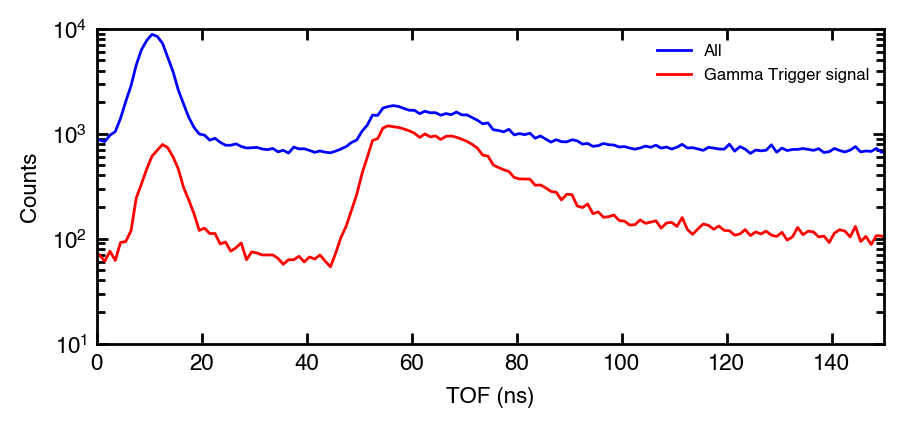

In [142]:
bin_center_g,hist_gamma_g = sorting(pro_gT_data['time_diff'],200,0,200)
fig = fig_pre_def(10,4)# 圖片大小
ax = fig.add_subplot(1, 1, 1) 

plt.plot(bin_center,hist_gamma,'b' ,linewidth=1,label ='All')
plt.plot(bin_center_g,hist_gamma_g,'r' ,linewidth=1,label ='Gamma Trigger signal')
fig_post_def(xlim =(0,150),ylim = (10,10000),xlabel = 'TOF (ns)',ylabel = 'Counts')
#plt.xlim(-20,200)
#plt.ylim(1,5500)
plt.yscale('log')

In [75]:
def g_Time_to_energy(TOF):
    distance = 1.5485+1.5*0.0254 # m
    light_speed = 299792458 # m/s
    neutron_mass = 1.64749*10**-27 #kg
    if type(TOF).__module__ == np.__name__:
        #print(type(TOF))
        if TOF.any()==0:
            return 0
        else:
            beta= distance/(light_speed*TOF*10**-9)
            neutron_energy = neutron_mass* light_speed**2*((1-beta**2)**-0.5-1)*(1.6*10**-19)**-1*(10**-6)
            return neutron_energy
    else:
        beta= distance/(light_speed*TOF*10**-9)
        neutron_energy = neutron_mass* light_speed**2*((1-beta**2)**-0.5-1)*(1.6*10**-19)**-1*(10**-6)
        return neutron_energy


In [76]:
resolution_time=0.002

mask_pro_gT_time_lower = pro_gT_data["time_diff"]>35
mask_pro_gT_time_upper = pro_gT_data["time_diff"]<110
mask_pro_gT_Threshold_Rec = pro_gT_data["Rec_LO"]>0.125
mask_pro_gT_Threshold_Tri = pro_gT_data["Tri_LO"]>0.125
pro_g_T2_data = pro_gT_data[(mask_pro_gT_time_lower&mask_pro_gT_time_upper&mask_pro_gT_Threshold_Rec&mask_pro_gT_Threshold_Tri)]
pro_g_TE_data = pro_g_T2_data.copy()
pro_g_TE_data['g_E'] = g_Time_to_energy(np.round(pro_g_TE_data['g_TOF']/resolution_time)*resolution_time  )
print(pro_g_TE_data.head())

     time_diff   Rec_PSD   Rec_LO  Tri_Det   Tri_PSD    Tri_LO      g_TOF  \
77      64.312  0.397772  0.87990      4.0  0.258751  2.656038  59.554328   
130     63.251  0.469643  0.19600      4.0  0.267152  2.604200  58.493328   
245     51.626  0.377376  1.16025      4.0  0.259016  0.125787  46.868328   
255     69.750  0.392597  0.62405      4.0  0.267770  2.095975  64.992328   
261     84.906  0.364297  0.43330      4.0  0.250912  2.498712  80.148328   

          g_E  
77   3.675932  
130  3.811198  
245  5.957068  
255  3.083574  
261  2.024163  


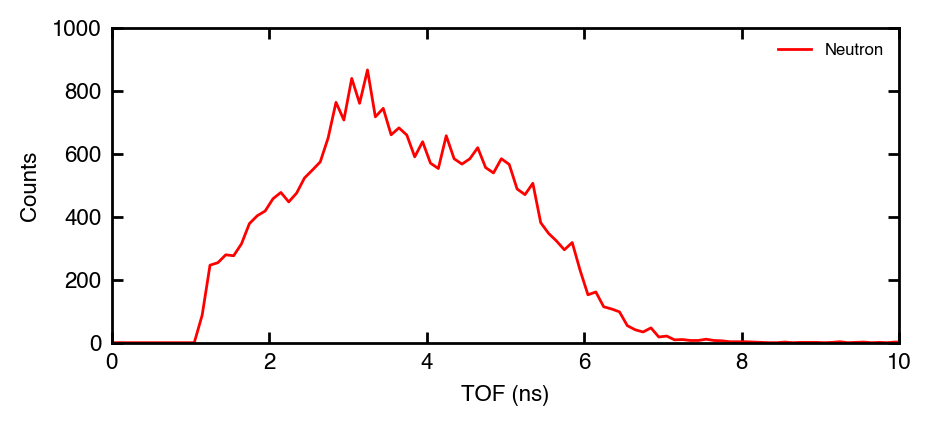

In [77]:
bin_center,hist_g_E = sorting(pro_g_TE_data['g_E'],200,0,20)
fig = fig_pre_def(10,4)# 圖片大小
ax = fig.add_subplot(1, 1, 1) 

plt.plot(bin_center,hist_g_E,'r' ,linewidth=1,label ='Neutron')
fig_post_def(xlim =(0,10),ylim = (0,1000),xlabel = 'TOF (ns)',ylabel = 'Counts')
#plt.xlim(-20,200)
#plt.yscale('log')

In [78]:
pro_gEeff_data = pro_g_TE_data.copy()

pro_gEeff_data["Rec_eff"]     = pro_g_TE_data["g_E"].apply(lambda x:rec_eff_inter[int(x*1000)])

print(pro_gEeff_data.head())

     time_diff   Rec_PSD   Rec_LO  Tri_Det   Tri_PSD    Tri_LO      g_TOF  \
77      64.312  0.397772  0.87990      4.0  0.258751  2.656038  59.554328   
130     63.251  0.469643  0.19600      4.0  0.267152  2.604200  58.493328   
245     51.626  0.377376  1.16025      4.0  0.259016  0.125787  46.868328   
255     69.750  0.392597  0.62405      4.0  0.267770  2.095975  64.992328   
261     84.906  0.364297  0.43330      4.0  0.250912  2.498712  80.148328   

          g_E   Rec_eff  
77   3.675932  0.478604  
130  3.811198  0.473190  
245  5.957068  0.404508  
255  3.083574  0.506187  
261  2.024163  0.536694  


In [79]:
bin_width=0.2
g_spectrum_x = 0.1+np.arange(0,30,bin_width)
g_spectrum_hist = np.zeros(len(g_spectrum_x))

In [80]:
print(g_spectrum_x)

[ 0.1  0.3  0.5  0.7  0.9  1.1  1.3  1.5  1.7  1.9  2.1  2.3  2.5  2.7
  2.9  3.1  3.3  3.5  3.7  3.9  4.1  4.3  4.5  4.7  4.9  5.1  5.3  5.5
  5.7  5.9  6.1  6.3  6.5  6.7  6.9  7.1  7.3  7.5  7.7  7.9  8.1  8.3
  8.5  8.7  8.9  9.1  9.3  9.5  9.7  9.9 10.1 10.3 10.5 10.7 10.9 11.1
 11.3 11.5 11.7 11.9 12.1 12.3 12.5 12.7 12.9 13.1 13.3 13.5 13.7 13.9
 14.1 14.3 14.5 14.7 14.9 15.1 15.3 15.5 15.7 15.9 16.1 16.3 16.5 16.7
 16.9 17.1 17.3 17.5 17.7 17.9 18.1 18.3 18.5 18.7 18.9 19.1 19.3 19.5
 19.7 19.9 20.1 20.3 20.5 20.7 20.9 21.1 21.3 21.5 21.7 21.9 22.1 22.3
 22.5 22.7 22.9 23.1 23.3 23.5 23.7 23.9 24.1 24.3 24.5 24.7 24.9 25.1
 25.3 25.5 25.7 25.9 26.1 26.3 26.5 26.7 26.9 27.1 27.3 27.5 27.7 27.9
 28.1 28.3 28.5 28.7 28.9 29.1 29.3 29.5 29.7 29.9]


In [81]:
g_spectrum_hist = np.zeros(len(g_spectrum_x))
for i in np.arange(0,len(pro_gEeff_data['g_E']),1):
    if ((pro_gEeff_data.iloc[[i],[7]].values > 0) and (pro_gEeff_data.iloc[[i],[8]].values >0)):
        g_spectrum_hist[int(np.round(((-0.1+pro_gEeff_data.iloc[[i],[7]].values)*(bin_width**-1)),0))] += (pro_gEeff_data.iloc[[i],[8]].values)**-1


In [82]:
print([int(+np.round(((-0.1+0.21)*(0.2**-1)),0))])

[1]


Text(0, 0.5, 'Counts')

<Figure size 629.921x472.441 with 0 Axes>

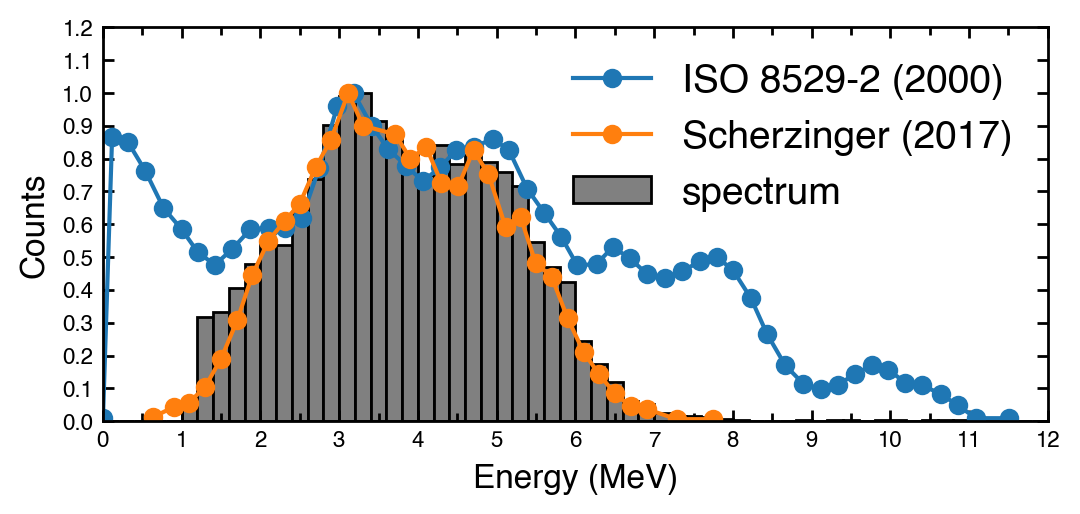

In [83]:

fig_pre_def()

fig = fig_pre_def(12,5) # 定義圖片大小 default 8*6
ax =fig.add_subplot(1, 1, 1) 

#plt.plot(spectrum_x,1*spectrum_hist/spectrum_hist.max(),'o-')
#ax.bar(0+spectrum_x, 0.9*spectrum_hist/spectrum_hist.max(),width=bin_width,color="gray",edgecolor = "k",label= 'spectrum')
ax.bar(g_spectrum_x, g_spectrum_hist/g_spectrum_hist.max(),width=bin_width,color="gray",edgecolor = "k",label= 'spectrum')

#plt.plot(bin_center,hist_g_E/hist_g_E.max())

plt.plot(ISO_spectrum[:,0],ISO_spectrum[:,1]/ISO_spectrum[:,1].max(),'o-',label='ISO 8529-2 (2000)')
plt.plot(Scherzinger_2017[:,0],Scherzinger_2017[:,1]/Scherzinger_2017[:,1].max(),'o-',label='Scherzinger (2017)')
#plt.plot(Scherzinger_2015[:,0],Scherzinger_2015[:,1]/Scherzinger_2015[:,1].max(),'o-',label='Scherzinger (2015)')
#plt.plot(Lorch_1973[:,0],Lorch_1973[:,1]/Lorch_1973[:,1].max(),'o-',label='Lorch (1973)')

fig_post_def(xlim=(0,12),ylim=(0,1.2),lg_fs=14,xticks=(1,0.5),yticks=(0.1,0.5),xlabel='energy (MeV)',ylabel='relative intensity (normalized)')
#plt.legend(fontsize=18)
ax.set_xlabel("Energy (MeV)",fontsize=12)
ax.set_ylabel("Counts",fontsize=12)



Text(0, 0.5, 'Counts')

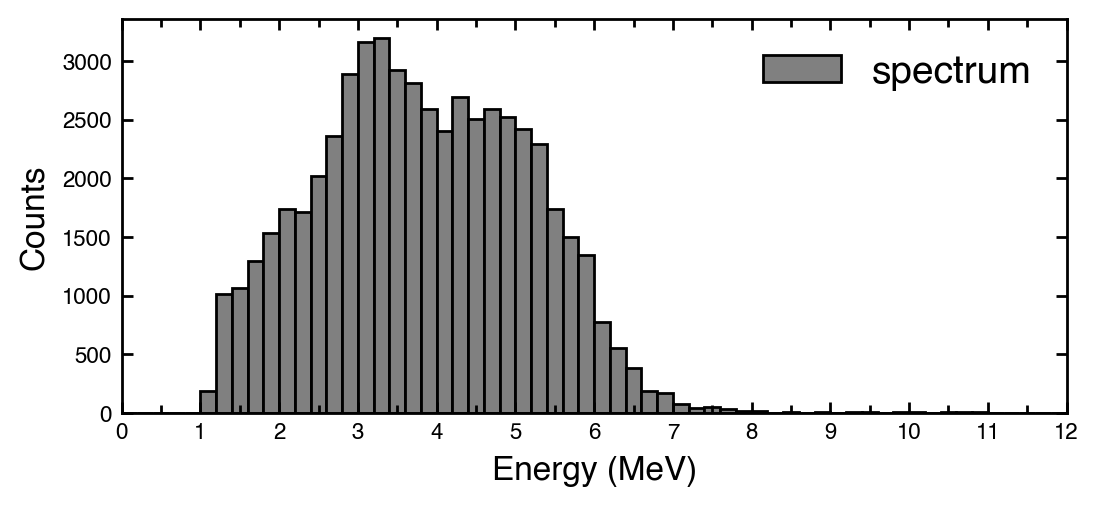

In [84]:

fig = fig_pre_def(12,5) # 定義圖片大小 default 8*6
ax =fig.add_subplot(1, 1, 1) 

ax.bar(g_spectrum_x, g_spectrum_hist,width=bin_width,color="gray",edgecolor = "k",label= 'spectrum')


fig_post_def(xlim=(0,12)
             #,ylim=(0,1.2),yticks=(0.1,0.5)
             ,lg_fs=14
             ,xticks=(1,0.5),xlabel='energy (MeV)',ylabel='relative intensity (normalized)')
#plt.legend(fontsize=18)
ax.set_xlabel("Energy (MeV)",fontsize=12)
ax.set_ylabel("Counts",fontsize=12)



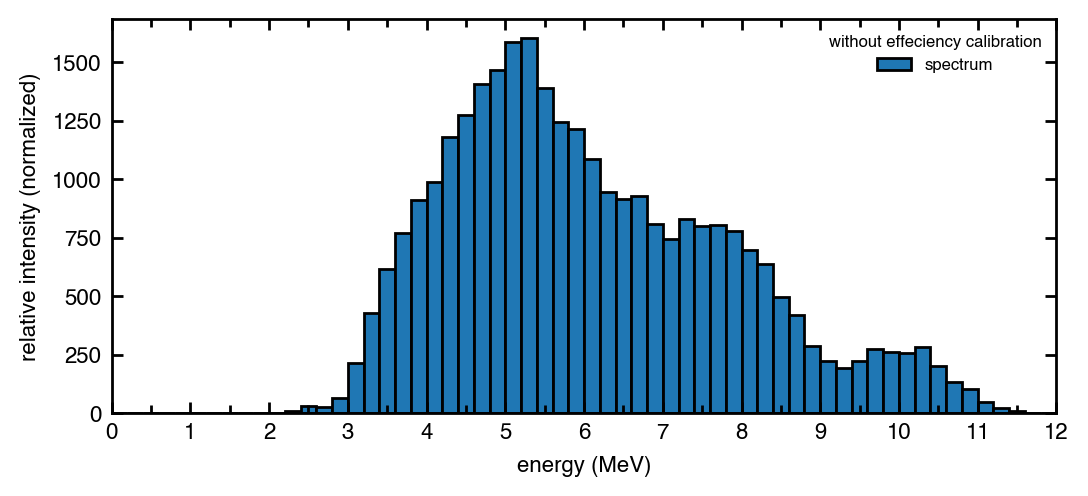

In [85]:

fig = fig_pre_def(12,5) # 定義圖片大小 default 8*6
ax =fig.add_subplot(1, 1, 1) 


ax.bar(Neutron_E_axis, Neutron_E_y,width=0.2,edgecolor = "k",label= 'spectrum')

ax.set_xlabel("Energy (MeV)",fontsize=18)
ax.set_ylabel("Counts",fontsize=18)
fig_post_def(xlim=(0,12),xticks=(1,0.5)
             #,ylim=(0,1.1),yticks=(0.2,0.1)
             ,xlabel='energy (MeV)',ylabel='relative intensity (normalized)'
            ,title='without effeciency calibration')
#plt.legend(fontsize=18)




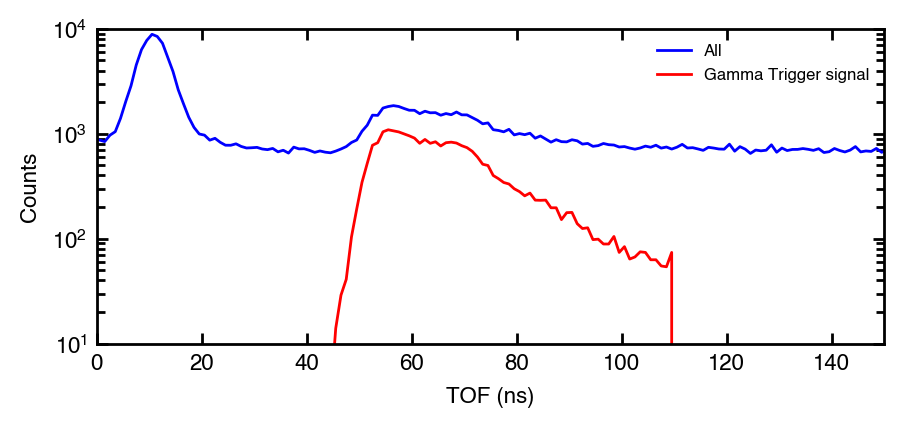

In [143]:
bin_center_g,hist_gamma_g = sorting(pro_gEeff_data['time_diff'],200,0,200)
fig = fig_pre_def(10,4)# 圖片大小
ax = fig.add_subplot(1, 1, 1) 

plt.plot(bin_center,hist_gamma,'b' ,linewidth=1,label ='All')
plt.plot(bin_center_g,hist_gamma_g,'r' ,linewidth=1,label ='Gamma Trigger signal')
fig_post_def(xlim =(0,150),ylim = (10,10000),xlabel = 'TOF (ns)',ylabel = 'Counts')
#plt.xlim(-20,200)
#plt.ylim(1,5500)
plt.yscale('log')

Text(0, 0.5, 'Counts')

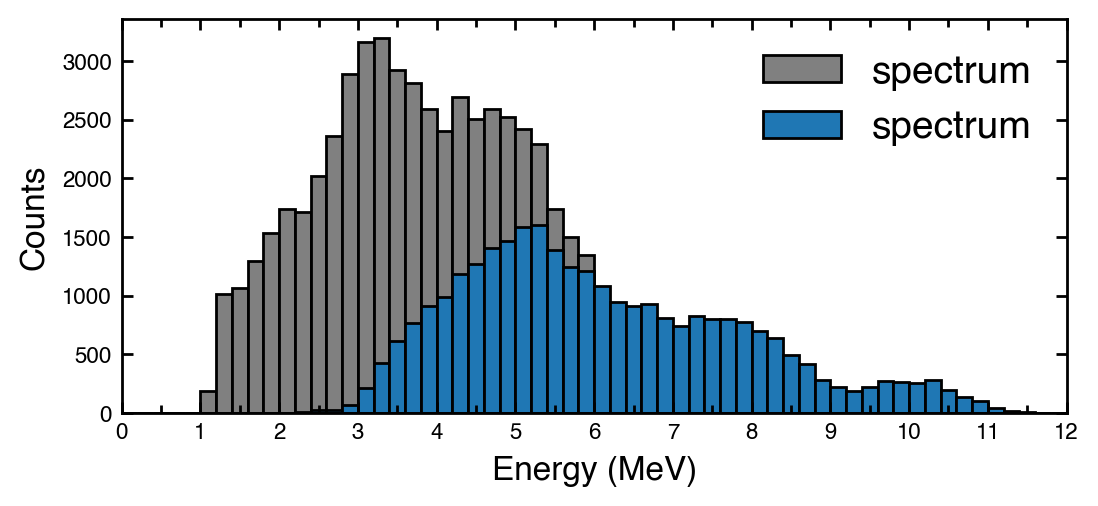

In [87]:

fig = fig_pre_def(12,5) # 定義圖片大小 default 8*6
ax =fig.add_subplot(1, 1, 1) 

ax.bar(g_spectrum_x, g_spectrum_hist,width=bin_width,color="gray",edgecolor = "k",label= 'spectrum')
ax.bar(Neutron_E_axis, Neutron_E_y,width=0.2,edgecolor = "k",label= 'spectrum')


fig_post_def(xlim=(0,12)
             #,ylim=(0,1.2),yticks=(0.1,0.5)
             ,lg_fs=14
             ,xticks=(1,0.5),xlabel='energy (MeV)',ylabel='relative intensity (normalized)')
#plt.legend(fontsize=18)
ax.set_xlabel("Energy (MeV)",fontsize=12)
ax.set_ylabel("Counts",fontsize=12)



In [120]:
output_g_trigger = g_spectrum_x[:,np.newaxis]
output_g_trigger = np.column_stack((output_g_trigger,g_spectrum_hist[:,np.newaxis]))
np.savetxt("g_trigger_20221113.txt",output_g_trigger)

In [121]:
print(g_spectrum_x)

[ 0.1  0.3  0.5  0.7  0.9  1.1  1.3  1.5  1.7  1.9  2.1  2.3  2.5  2.7
  2.9  3.1  3.3  3.5  3.7  3.9  4.1  4.3  4.5  4.7  4.9  5.1  5.3  5.5
  5.7  5.9  6.1  6.3  6.5  6.7  6.9  7.1  7.3  7.5  7.7  7.9  8.1  8.3
  8.5  8.7  8.9  9.1  9.3  9.5  9.7  9.9 10.1 10.3 10.5 10.7 10.9 11.1
 11.3 11.5 11.7 11.9 12.1 12.3 12.5 12.7 12.9 13.1 13.3 13.5 13.7 13.9
 14.1 14.3 14.5 14.7 14.9 15.1 15.3 15.5 15.7 15.9 16.1 16.3 16.5 16.7
 16.9 17.1 17.3 17.5 17.7 17.9 18.1 18.3 18.5 18.7 18.9 19.1 19.3 19.5
 19.7 19.9 20.1 20.3 20.5 20.7 20.9 21.1 21.3 21.5 21.7 21.9 22.1 22.3
 22.5 22.7 22.9 23.1 23.3 23.5 23.7 23.9 24.1 24.3 24.5 24.7 24.9 25.1
 25.3 25.5 25.7 25.9 26.1 26.3 26.5 26.7 26.9 27.1 27.3 27.5 27.7 27.9
 28.1 28.3 28.5 28.7 28.9 29.1 29.3 29.5 29.7 29.9]


In [123]:
print(g_spectrum_hist[int(4/0.2):int(5/0.2)])
print(Neutron_E_y[int(4/0.2):int(5/0.2)])

[2402.17051047 2691.83993774 2508.0064389  2593.63237469 2527.87341709]
[2477 2637 2620 2588 2610]


In [124]:
print(g_spectrum_x[int(4.5/0.2):int(5.2/0.2)])
print(Neutron_E_axis[int(4.5/0.2):int(5.2/0.2)])

[4.5 4.7 4.9 5.1]
[4.5 4.7 4.9 5.1]


In [125]:
g_normal_factor = 1/max(g_spectrum_hist)
g_spectrum_hist_average=np.average(g_spectrum_hist[int(4.5/0.2):int(5.2/0.2)])
Neutron_E_y_average=np.average(Neutron_E_y[int(4.5/0.2):int(5.2/0.2)])
conversion_factor = g_spectrum_hist_average/Neutron_E_y_average
print(conversion_factor)


0.9656874145332307


In [126]:
print(g_spectrum_x)
print(Neutron_E_axis)

[ 0.1  0.3  0.5  0.7  0.9  1.1  1.3  1.5  1.7  1.9  2.1  2.3  2.5  2.7
  2.9  3.1  3.3  3.5  3.7  3.9  4.1  4.3  4.5  4.7  4.9  5.1  5.3  5.5
  5.7  5.9  6.1  6.3  6.5  6.7  6.9  7.1  7.3  7.5  7.7  7.9  8.1  8.3
  8.5  8.7  8.9  9.1  9.3  9.5  9.7  9.9 10.1 10.3 10.5 10.7 10.9 11.1
 11.3 11.5 11.7 11.9 12.1 12.3 12.5 12.7 12.9 13.1 13.3 13.5 13.7 13.9
 14.1 14.3 14.5 14.7 14.9 15.1 15.3 15.5 15.7 15.9 16.1 16.3 16.5 16.7
 16.9 17.1 17.3 17.5 17.7 17.9 18.1 18.3 18.5 18.7 18.9 19.1 19.3 19.5
 19.7 19.9 20.1 20.3 20.5 20.7 20.9 21.1 21.3 21.5 21.7 21.9 22.1 22.3
 22.5 22.7 22.9 23.1 23.3 23.5 23.7 23.9 24.1 24.3 24.5 24.7 24.9 25.1
 25.3 25.5 25.7 25.9 26.1 26.3 26.5 26.7 26.9 27.1 27.3 27.5 27.7 27.9
 28.1 28.3 28.5 28.7 28.9 29.1 29.3 29.5 29.7 29.9]
[ 0.1  0.3  0.5  0.7  0.9  1.1  1.3  1.5  1.7  1.9  2.1  2.3  2.5  2.7
  2.9  3.1  3.3  3.5  3.7  3.9  4.1  4.3  4.5  4.7  4.9  5.1  5.3  5.5
  5.7  5.9  6.1  6.3  6.5  6.7  6.9  7.1  7.3  7.5  7.7  7.9  8.1  8.3
  8.5  8.7  8.9  9.1  9.3

Text(0, 0.5, 'Counts')

<Figure size 629.921x472.441 with 0 Axes>

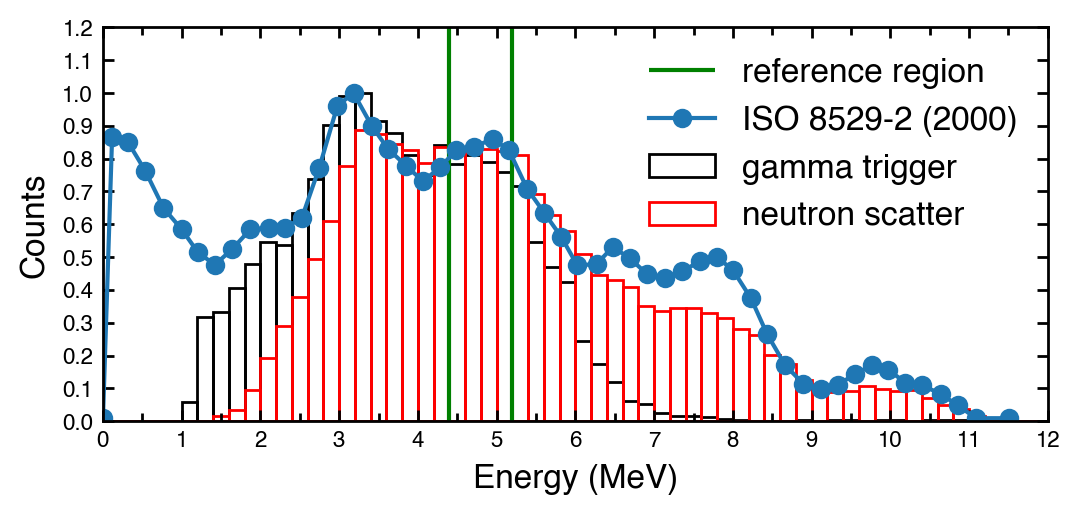

In [127]:

fig_pre_def()

fig = fig_pre_def(12,5) # 定義圖片大小 default 8*6
ax =fig.add_subplot(1, 1, 1) 


ax.bar(g_spectrum_x, g_spectrum_hist*g_normal_factor,width=bin_width,color="None",edgecolor = "k",label= 'gamma trigger')
ax.bar(Neutron_E_axis, 1.05*Neutron_E_y*g_normal_factor*conversion_factor,width=bin_width,color="None",edgecolor = "r",label= 'neutron scatter')

ax.vlines(4.4,0,5,color="green",label='reference region')
ax.vlines(5.2,0,5,color="green")



plt.plot(ISO_spectrum[:,0],ISO_spectrum[:,1]/ISO_spectrum[:,1].max(),'o-',label='ISO 8529-2 (2000)')
#plt.plot(Scherzinger_2017[:,0],Scherzinger_2017[:,1]/Scherzinger_2017[:,1].max(),'o-',label='Scherzinger (2017)')
#plt.plot(Scherzinger_2015[:,0],Scherzinger_2015[:,1]/Scherzinger_2015[:,1].max(),'o-',label='Scherzinger (2015)')
#plt.plot(Lorch_1973[:,0],Lorch_1973[:,1]/Lorch_1973[:,1].max(),'o-',label='Lorch (1973)')

fig_post_def(xlim=(0,12),ylim=(0,1.2),lg_fs=12,xticks=(1,0.5),yticks=(0.1,0.5),xlabel='energy (MeV)',ylabel='relative intensity (normalized)')
#plt.legend(fontsize=18)
ax.set_xlabel("Energy (MeV)",fontsize=12)
ax.set_ylabel("Counts",fontsize=12)



In [56]:
Neutron_energy_lower = 0 # 0 MeV
Neutron_energy_upper = 12 # 10 MeV
Binning = 60 # cut to 100 pieces
Neutron_E_axis, Neutron_E_y = sorting(
    pro_geff_data['Rec_E'], Binning , Neutron_energy_lower, Neutron_energy_upper)

<Figure size 629.921x472.441 with 0 Axes>

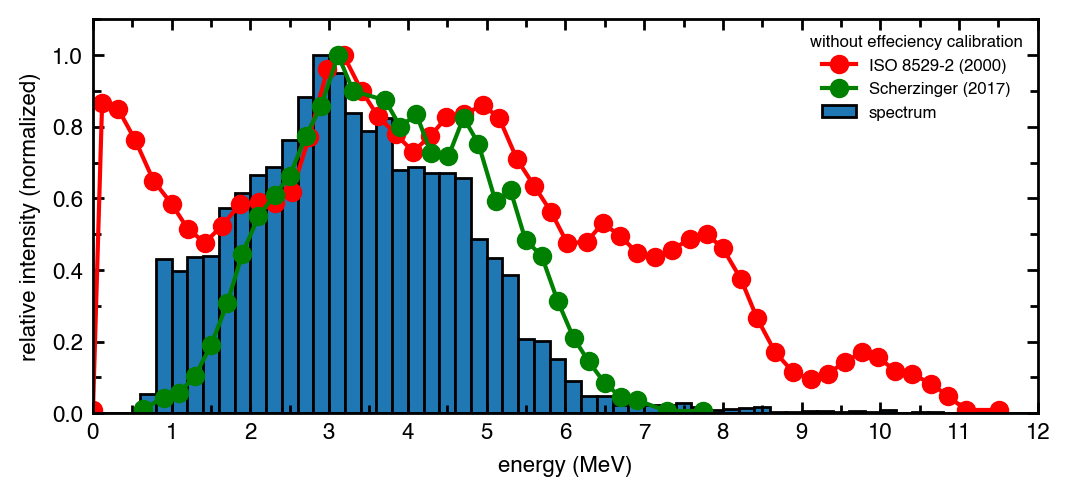

In [57]:


fig_pre_def()

fig = fig_pre_def(12,5) # 定義圖片大小 default 8*6

ax =fig.add_subplot(1, 1, 1) 


ax.bar(Neutron_E_axis, Neutron_E_y/Neutron_E_y.max(),width=0.2,edgecolor = "k",label= 'spectrum')
plt.plot(ISO_spectrum[:,0],ISO_spectrum[:,1]/ISO_spectrum[:,1].max(),'o-r',label='ISO 8529-2 (2000)')
plt.plot(Scherzinger_2017[:,0],Scherzinger_2017[:,1]/Scherzinger_2017[:,1].max(),'o-g',label='Scherzinger (2017)')
#plt.plot(Scherzinger_2015[:,0],Scherzinger_2015[:,1]/Scherzinger_2015[:,1].max(),'o-',label='Scherzinger (2015)')
#plt.plot(Lorch_1973[:,0],Lorch_1973[:,1]/Lorch_1973[:,1].max(),'o-',label='Lorch (1973)')


ax.set_xlabel("Energy (MeV)",fontsize=18)
ax.set_ylabel("Counts",fontsize=18)
fig_post_def(xlim=(0,12),ylim=(0,1.1),xticks=(1,0.5),yticks=(0.2,0.1),xlabel='energy (MeV)',ylabel='relative intensity (normalized)'
            ,title='without effeciency calibration')
#plt.legend(fontsize=18)




In [58]:
print(pro_geff_data.head())

     time_diff   Rec_PSD    Rec_LO  Tri_Det   Tri_PSD   Tri_LO        TOF  \
5       71.501  0.372385  0.147941      4.0  0.241858  2.42208  68.263467   
20      56.999  0.337968  1.602591      4.0  0.238971  0.63104  53.761467   
57      69.093  0.370920  0.208603      4.0  0.259279  2.20342  65.855467   
70      53.625  0.388858  1.111105      4.0  0.255725  0.15196  50.387467   
100     76.812  0.359712  0.602287      4.0  0.286319  0.82244  73.574467   

        Rec_E  Recoil_p_E   Total_E      g_TOF       g_E   Rec_eff  \
5    2.622064    5.754004  8.376068  68.348193  2.725803  0.523631   
20   4.236937    2.211294  6.448231  53.846193  4.405021  0.461197   
57   2.817415    5.363795  8.181210  65.940193  2.928920  0.510499   
70   4.832505    0.824504  5.657009  50.472193  5.004368  0.446647   
100  2.256694    2.656679  4.913372  73.659193  2.339536  0.537873   

     scatter_eff  
5       0.286863  
20      0.356322  
57      0.294039  
70      0.378292  
100     0.399594  


In [59]:
print(rec_eff)

[[3.00000000e-01 6.74097006e-05]
 [4.00000000e-01 6.94400176e-04]
 [5.00000000e-01 4.43399015e-03]
 [6.00000000e-01 2.09506525e-02]
 [7.00000000e-01 6.69108557e-02]
 [8.00000000e-01 1.52471372e-01]
 [9.00000000e-01 2.68564142e-01]
 [1.00000000e+00 3.53869751e-01]
 [1.10000000e+00 4.21208258e-01]
 [1.20000000e+00 4.65186021e-01]
 [1.30000000e+00 4.99969702e-01]
 [1.40000000e+00 5.08962863e-01]
 [1.50000000e+00 5.25654626e-01]
 [1.60000000e+00 5.28005146e-01]
 [1.70000000e+00 5.36222016e-01]
 [1.80000000e+00 5.33377268e-01]
 [1.90000000e+00 5.36872804e-01]
 [2.00000000e+00 5.37170651e-01]
 [2.10000000e+00 5.35183195e-01]
 [2.20000000e+00 5.39380305e-01]
 [2.30000000e+00 5.36688323e-01]
 [2.40000000e+00 5.35675636e-01]
 [2.50000000e+00 5.29022992e-01]
 [2.60000000e+00 5.24603379e-01]
 [2.70000000e+00 5.20182417e-01]
 [2.80000000e+00 5.11341207e-01]
 [2.90000000e+00 5.06385961e-01]
 [3.00000000e+00 5.12799347e-01]
 [3.10000000e+00 5.04832763e-01]
 [3.20000000e+00 4.99074938e-01]
 [3.300000

In [60]:
bin_width=0.2
spectrum_x_g = np.arange(0,20,bin_width)
spectrum_hist_g = np.zeros(len(spectrum_x_g))

In [61]:
spectrum_hist_g = np.zeros(len(spectrum_x_g))
for i in np.arange(0,len(pro_geff_data['g_E']),1):
    #print(proEEWeffTh_data.iloc[[i],[9]])
    #print(proEEWeffTh_data.iloc[[i],[10]])
    #print(proEEWeffTh_data.iloc[[i],[11]])
    spectrum_hist_g[int(np.round((pro_geff_data.iloc[[i],[11]].values*(bin_width**-1)),0))] += (pro_geff_data.iloc[[i],[12]].values)**-1


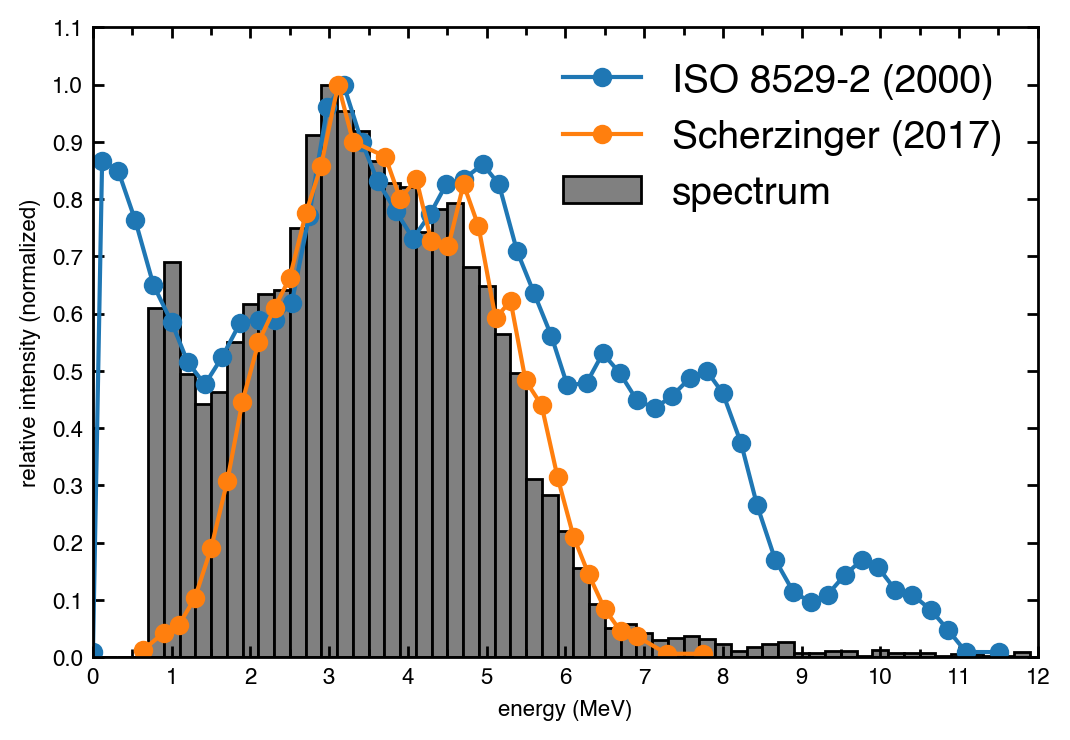

In [62]:

fig = fig_pre_def(12,8) # 定義圖片大小 default 8*6
ax =fig.add_subplot(1, 1, 1) 

#plt.plot(spectrum_x,1*spectrum_hist/spectrum_hist.max(),'o-')
ax.bar(0+spectrum_x_g, 1.0*spectrum_hist_g/spectrum_hist_g.max(),width=bin_width,color="gray",edgecolor = "k",label= 'spectrum')
ax.plot(ISO_spectrum[:,0],ISO_spectrum[:,1]/ISO_spectrum[0:,1].max(),'o-',label='ISO 8529-2 (2000)')
ax.plot(Scherzinger_2017[:,0],Scherzinger_2017[:,1]/Scherzinger_2017[:,1].max(),'o-',label='Scherzinger (2017)')
#plt.plot(Scherzinger_2015[:,0],Scherzinger_2015[:,1]/Scherzinger_2015[:,1].max(),'o-',label='Scherzinger (2015)')
#plt.plot(Lorch_1973[:,0],Lorch_1973[:,1]/Lorch_1973[:,1].max(),'o-',label='Lorch (1973)')
fig_post_def(xlim=(0,12),ylim=(0,1.1),lg_fs=14,xticks=(1,0.5),yticks=(0.1,0.5),xlabel='energy (MeV)',ylabel='relative intensity (normalized)')
#plt.legend(fontsize=18)
#ax.set_xlabel("Energy (MeV)",fontsize=12)
#ax.set_ylabel("Counts",fontsize=12)



In [63]:
output_g_trigger = spectrum_x_g[:,np.newaxis]
output_g_trigger = np.column_stack((output_g_trigger,spectrum_hist_g[:,np.newaxis]))
np.savetxt("g_trigger_20221113.txt",output_g_trigger)

In [ ]:
recoil_proton_E = []
N_Eth_PE=[]
for i in np.arange(0,len(neutron_E_threshold_selected[:,4]),1):
    index = int(neutron_E_threshold_selected[i,4]*100000)
    #print(neutron_E_threshold_selected[i,4],' ',index,' ',lightoutput_2inches_inter[index])
    N_Eth_PE_temp = np.append(neutron_E_threshold_selected[i,:],P_Energy_inter[index])
    
    if i ==0:
        N_Eth_PE = N_Eth_PE_temp.copy()
    else:
        N_Eth_PE = np.vstack((N_Eth_PE,N_Eth_PE_temp))
print('Energy/      PSD/       LO/        Channel/   LO@Trigger/porton deposited in trigger detector')
print(N_Eth_PE)